In [6]:
import matplotlib.pyplot as plt

from z3 import *
import numpy


In [10]:
# Definindo os parâmetros que podem ser editados de acordo com a necessidade
num_rows = 4       # Número de "linhas" ou grupos de coordenadas no eixo X
num_columns = 5   # Número de colunas de coordenadas no eixo Y
x_step = 2         # Distância entre as "linhas" no eixo X
x_offset = 3       # Deslocamento (offset) inicial no eixo X
y_offset = 1       # Deslocamento (offset) inicial no eixo Y

# Lista para armazenar todas as coordenadas do armazém
warehouse = []

# Criação das coordenadas do armazém
for i in range(num_rows):
    # 'i' representa cada linha de coordenadas que será criada
    for j in range(num_columns):
        # 'j' representa cada coluna na linha correspondente
        x = x_step * i + x_offset  # Cálculo da coordenada X
        y = j + y_offset           # Cálculo da coordenada Y
        warehouse.append((x, y))   # Adiciona a tupla (x, y) na lista

# Exibe a lista de coordenadas
print("Coordenadas do armazém:", warehouse)

# Definição da posição inicial do drone, pode ser alterada conforme necessidade
drone = (0, 0)
print("Posição inicial do drone:", drone)


Coordenadas do armazém: [(3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5)]
Posição inicial do drone: (0, 0)


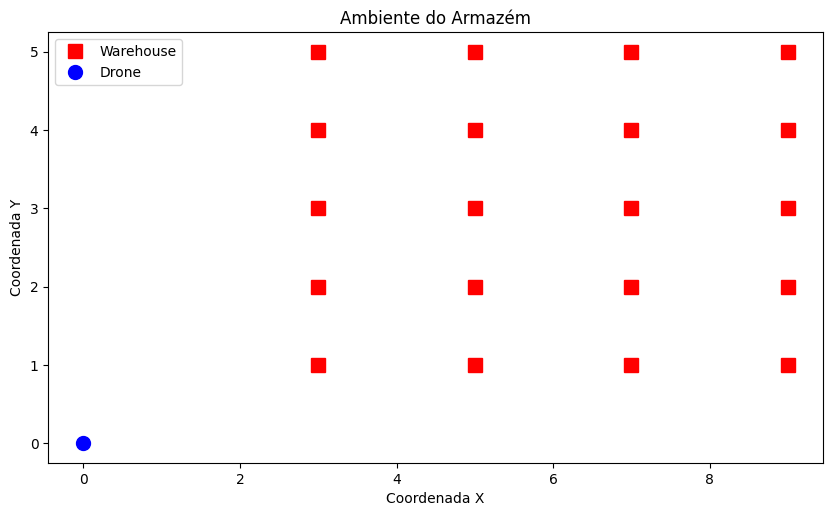

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot dos pontos do armazém
ax.plot(
    [x for x, y in warehouse],
    [y for x, y in warehouse],
    'rs',
    markersize=10,
    label='Warehouse'
)

# Plot da posição do drone
ax.plot(drone[0], drone[1], 'bo', markersize=10, label='Drone')

# Adiciona título e rótulos nos eixos
ax.set_title('Ambiente do Armazém')
ax.set_xlabel('Coordenada X')
ax.set_ylabel('Coordenada Y')

# Define a proporção igual para os eixos
ax.set_aspect('equal')

# Exibe a legenda
ax.legend()

plt.show()

Solução encontrada com 26 timesteps mínimos:

Trajetória do Drone:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 2), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 4), Bateria 80
Passo 9: Posição (5, 5), Bateria 77
Passo 10: Posição (5, 4), Bateria 75
Passo 11: Posição (5, 3), Bateria 73
Passo 12: Posição (5, 2), Bateria 71
Passo 13: Posição (5, 1), Bateria 69
Passo 14: Posição (6, 2), Bateria 66
Passo 15: Posição (7, 1), Bateria 63
Passo 16: Posição (7, 2), Bateria 61
Passo 17: Posição (7, 3), Bateria 59
Passo 18: Posição (7, 4), Bateria 57
Passo 19: Posição (7, 5), Bateria 55
Passo 20: Posição (8, 4), Bateria 52
Passo 21: Posição (9, 5), Bateria 49
Passo 22: Posição (9, 4), Bateria 47
Passo 23: Posição (9, 3), Bateria 45
Passo 24: Posição (9, 2), Bateria 43
Passo 25: Posição

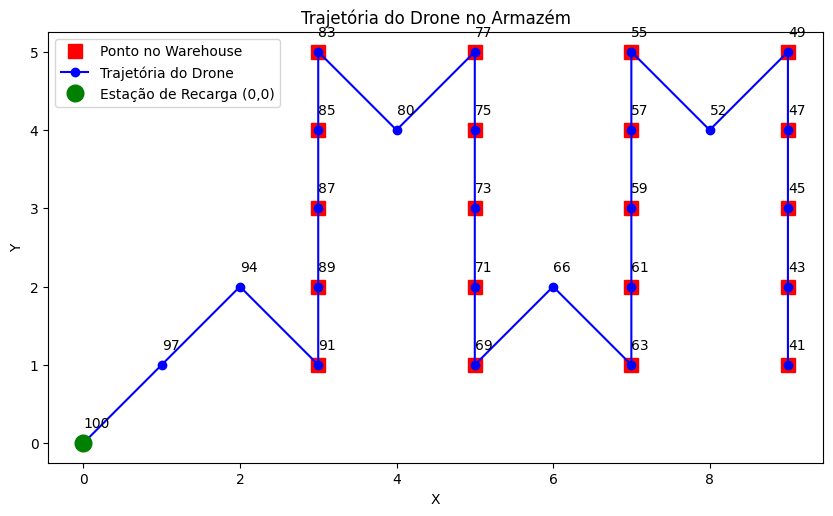

In [18]:
def solve_with_min_timesteps(max_timesteps, bmax, gridx, gridy, warehouse):
    for timesteps in range(1, max_timesteps + 1):
        s = Solver()

        # Declaração das variáveis para cada timestep
        PGx = [Int(f'pgx_{k}') for k in range(timesteps)]
        PGy = [Int(f'pgy_{k}') for k in range(timesteps)]
        Bat = [Int(f'bat_{k}') for k in range(timesteps)]

        # Restrições de limites para as variáveis
        for b in Bat:
            s.add(And(b >= 1, b <= bmax))
        for x in PGx:
            s.add(And(x >= 0, x <= gridx))
        for y in PGy:
            s.add(And(y >= 0, y <= gridy))

        # Condições iniciais
        s.add(PGx[0] == 0)
        s.add(PGy[0] == 0)
        s.add(Bat[0] == bmax)

        # Restrições de movimento e consumo de bateria
        for k in range(1, timesteps):
            s.add(Or(PGx[k] == PGx[k-1] + 1, PGx[k] == PGx[k-1] - 1, PGx[k] == PGx[k-1]))
            s.add(Or(PGy[k] == PGy[k-1] + 1, PGy[k] == PGy[k-1] - 1, PGy[k] == PGy[k-1]))

            s.add(If(
                Or(
                    And(PGx[k] == PGx[k-1] + 1, PGy[k] == PGy[k-1] + 1),
                    And(PGx[k] == PGx[k-1] - 1, PGy[k] == PGy[k-1] - 1),
                    And(PGx[k] == PGx[k-1] + 1, PGy[k] == PGy[k-1] - 1),
                    And(PGx[k] == PGx[k-1] - 1, PGy[k] == PGy[k-1] + 1)
                ),
                Bat[k] == Bat[k-1] - 3,
                If(
                    Or(
                        And(PGx[k] == PGx[k-1] + 1, PGy[k] == PGy[k-1]),
                        And(PGx[k] == PGx[k-1] - 1, PGy[k] == PGy[k-1]),
                        And(PGx[k] == PGx[k-1], PGy[k] == PGy[k-1] - 1),
                        And(PGx[k] == PGx[k-1], PGy[k] == PGy[k-1] + 1)
                    ),
                    Bat[k] == Bat[k-1] - 2,
                    If(
                        And(PGx[k] == PGx[k-1], PGy[k] == PGy[k-1]),
                        Bat[k] == Bat[k-1],
                        If(
                            And(PGx[k] == 0, PGy[k] == 0),
                            Bat[k] == bmax,
                            Bat[k] == Bat[k-1]
                        )
                    )
                )
            ))

        # Cada ponto no warehouse deve ser visitado em algum timestep
        for (x, y) in warehouse:
            s.add(Or([And(PGx[k] == x, PGy[k] == y) for k in range(timesteps)]))

        if s.check() == sat:
            m = s.model()
            print("Solução encontrada com", timesteps, "timesteps mínimos:")
            return m, timesteps, PGx, PGy, Bat

    print("Nenhuma solução encontrada até", max_timesteps, "timesteps.")
    return None, None, None, None, None

# Parâmetros do problema
max_timesteps = 100  # Limite superior para a busca de timesteps
bmax = 100
gridx = 9
gridy = 10

# Resolver o problema e obter o modelo e o número de timesteps mínimo
model, timesteps, PGx, PGy, Bat = solve_with_min_timesteps(max_timesteps, bmax, gridx, gridy, warehouse)

if model:
    # Extraindo os valores do modelo
    pgx_values = [model.evaluate(PGx[k]).as_long() for k in range(timesteps)]
    pgy_values = [model.evaluate(PGy[k]).as_long() for k in range(timesteps)]
    bat_values = [model.evaluate(Bat[k]).as_long() for k in range(timesteps)]

    # Exibindo os resultados
    print("\nTrajetória do Drone:")
    for t in range(timesteps):
        print(f"Passo {t}: Posição ({pgx_values[t]}, {pgy_values[t]}), Bateria {bat_values[t]}")

    # Visualização da trajetória
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plotando os pontos do warehouse
    for i, (x, y) in enumerate(warehouse):
        if i == 0:
            ax.plot(x, y, 'rs', markersize=10, label="Ponto no Warehouse")
        else:
            ax.plot(x, y, 'rs', markersize=10)

    # Plotando a trajetória do drone
    ax.plot(pgx_values, pgy_values, 'b-o', label="Trajetória do Drone")
    ax.plot(0, 0, 'go', markersize=12, label="Estação de Recarga (0,0)")

    # Adicionando a quantidade de bateria ao lado de cada ponto da trajetória
    for i in range(timesteps):
        ax.text(pgx_values[i], pgy_values[i] + 0.2, f'{bat_values[i]}', fontsize=10)

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Trajetória do Drone no Armazém")
    plt.legend()
    ax.set_aspect('equal')
    plt.show()


Solução encontrada com 26 timesteps mínimos.

Número de trajetórias encontradas: 135

Trajetória 1:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 2), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 6), Bateria 80
Passo 9: Posição (5, 5), Bateria 77
Passo 10: Posição (5, 4), Bateria 75
Passo 11: Posição (5, 3), Bateria 73
Passo 12: Posição (5, 2), Bateria 71
Passo 13: Posição (5, 1), Bateria 69
Passo 14: Posição (6, 2), Bateria 66
Passo 15: Posição (7, 1), Bateria 63
Passo 16: Posição (7, 2), Bateria 61
Passo 17: Posição (7, 3), Bateria 59
Passo 18: Posição (7, 4), Bateria 57
Passo 19: Posição (7, 5), Bateria 55
Passo 20: Posição (8, 4), Bateria 52
Passo 21: Posição (9, 5), Bateria 49
Passo 22: Posição (9, 4), Bateria 47
Passo 23: Posição (9, 3), Bateria 45
Passo 24: Posição (9,

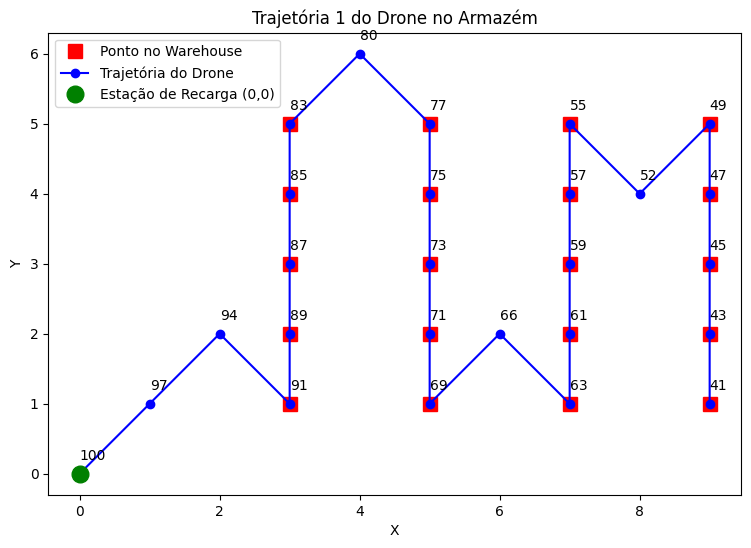


Trajetória 2:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 6), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 0), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 5), Bateria 55
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


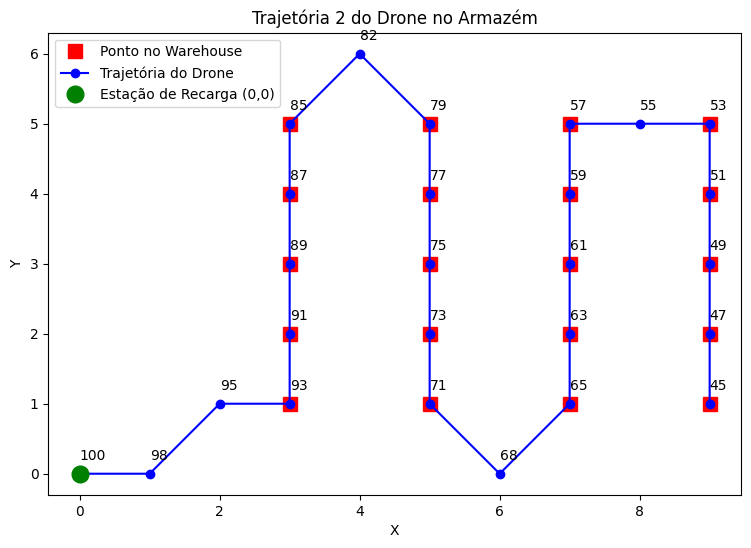


Trajetória 3:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 6), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 2), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 5), Bateria 55
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


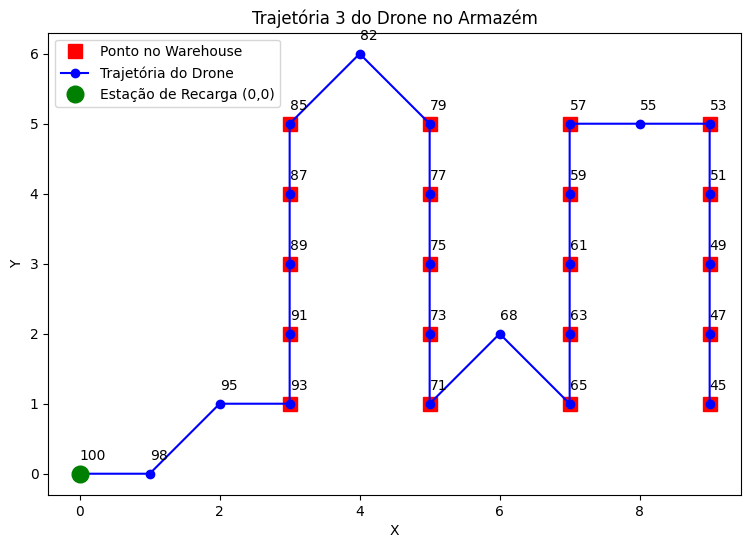


Trajetória 4:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 4), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 0), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 5), Bateria 55
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


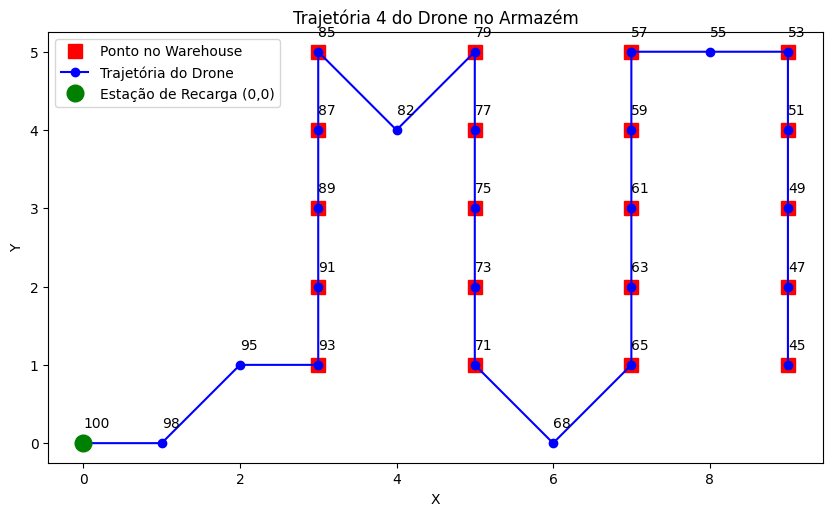


Trajetória 5:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 4), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 1), Bateria 69
Passo 15: Posição (7, 1), Bateria 67
Passo 16: Posição (7, 2), Bateria 65
Passo 17: Posição (7, 3), Bateria 63
Passo 18: Posição (7, 4), Bateria 61
Passo 19: Posição (7, 5), Bateria 59
Passo 20: Posição (8, 5), Bateria 57
Passo 21: Posição (9, 5), Bateria 55
Passo 22: Posição (9, 4), Bateria 53
Passo 23: Posição (9, 3), Bateria 51
Passo 24: Posição (9, 2), Bateria 49
Passo 25: Posição (9, 1), Bateria 47


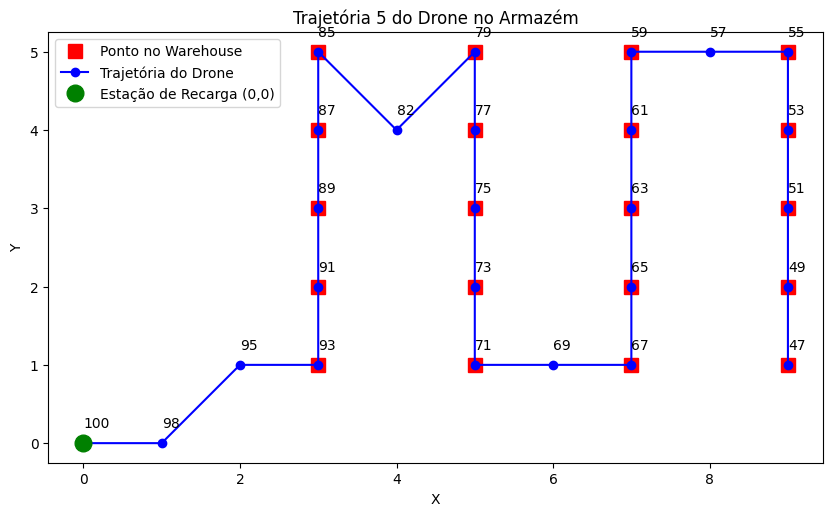


Trajetória 6:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 6), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 1), Bateria 69
Passo 15: Posição (7, 1), Bateria 67
Passo 16: Posição (7, 2), Bateria 65
Passo 17: Posição (7, 3), Bateria 63
Passo 18: Posição (7, 4), Bateria 61
Passo 19: Posição (7, 5), Bateria 59
Passo 20: Posição (8, 5), Bateria 57
Passo 21: Posição (9, 5), Bateria 55
Passo 22: Posição (9, 4), Bateria 53
Passo 23: Posição (9, 3), Bateria 51
Passo 24: Posição (9, 2), Bateria 49
Passo 25: Posição (9, 1), Bateria 47


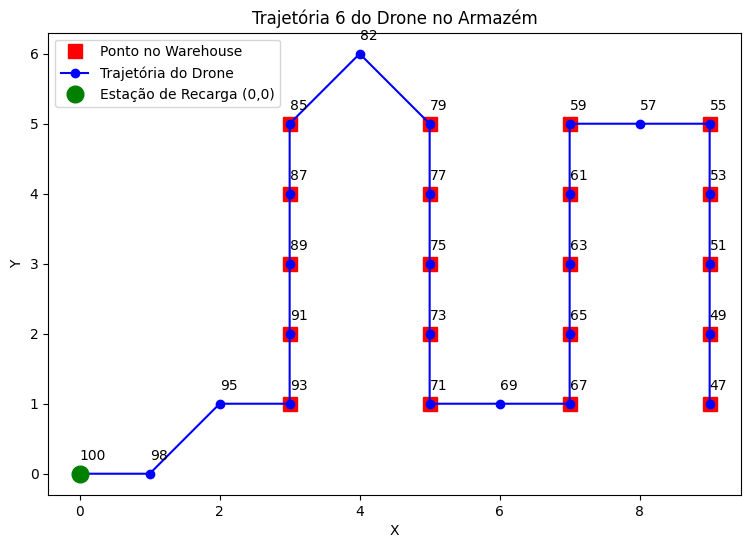


Trajetória 7:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 4), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 2), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 5), Bateria 55
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


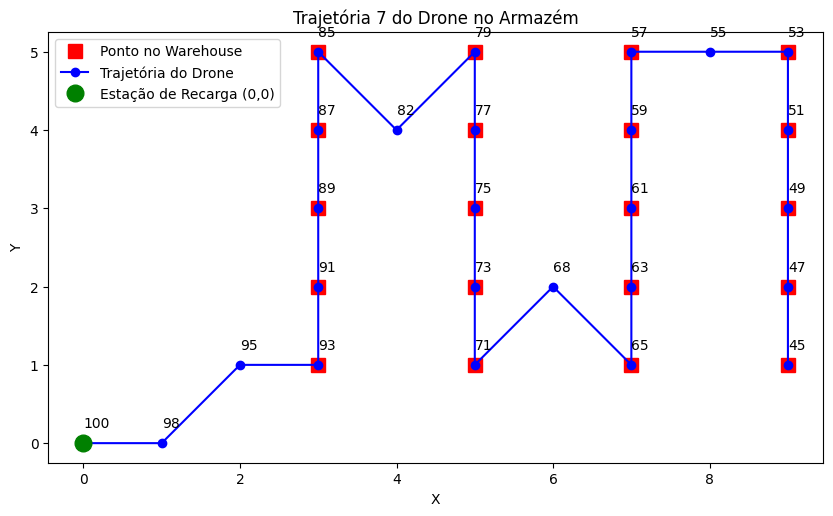


Trajetória 8:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 0), Bateria 96
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 6), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 2), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 5), Bateria 55
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


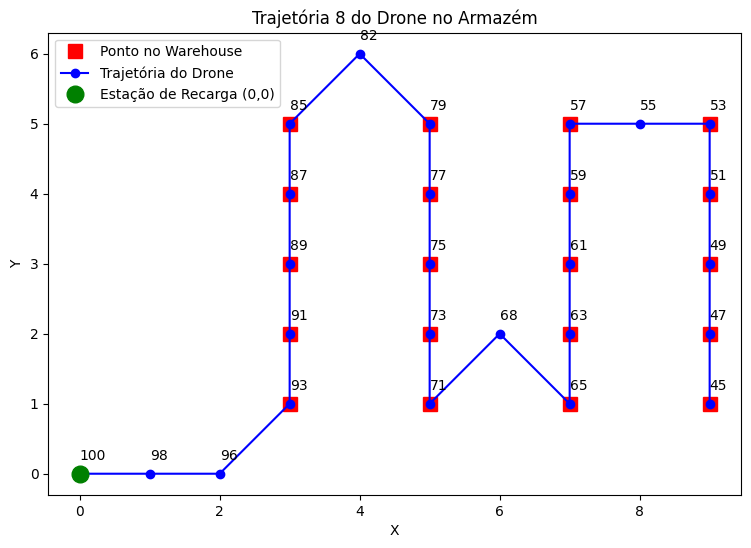


Trajetória 9:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 0), Bateria 96
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 6), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 0), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 5), Bateria 55
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


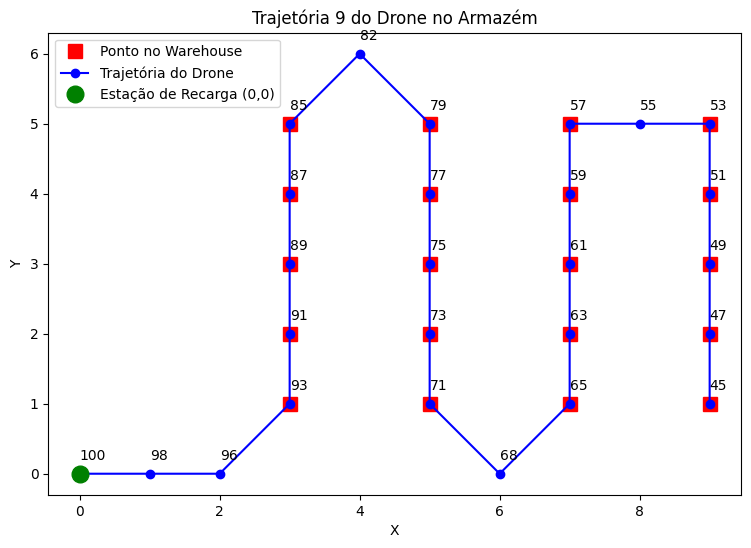


Trajetória 10:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 0), Bateria 96
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 6), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 1), Bateria 69
Passo 15: Posição (7, 1), Bateria 67
Passo 16: Posição (7, 2), Bateria 65
Passo 17: Posição (7, 3), Bateria 63
Passo 18: Posição (7, 4), Bateria 61
Passo 19: Posição (7, 5), Bateria 59
Passo 20: Posição (8, 5), Bateria 57
Passo 21: Posição (9, 5), Bateria 55
Passo 22: Posição (9, 4), Bateria 53
Passo 23: Posição (9, 3), Bateria 51
Passo 24: Posição (9, 2), Bateria 49
Passo 25: Posição (9, 1), Bateria 47


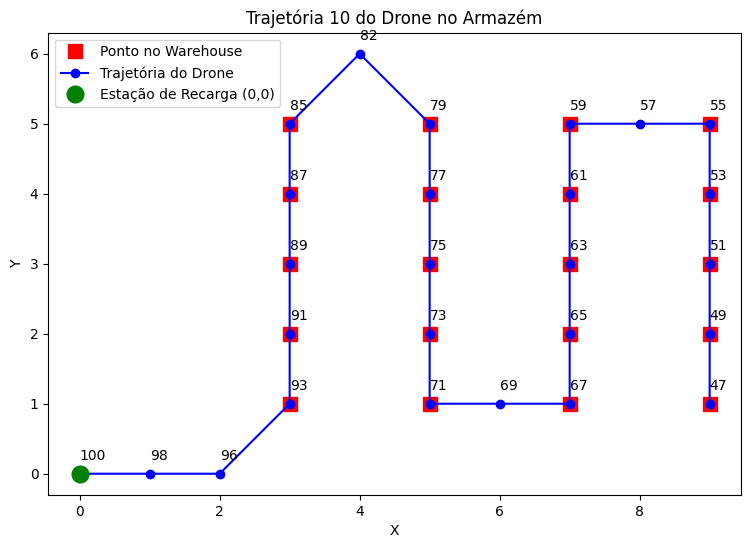


Trajetória 11:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 0), Bateria 96
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 4), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 1), Bateria 69
Passo 15: Posição (7, 1), Bateria 67
Passo 16: Posição (7, 2), Bateria 65
Passo 17: Posição (7, 3), Bateria 63
Passo 18: Posição (7, 4), Bateria 61
Passo 19: Posição (7, 5), Bateria 59
Passo 20: Posição (8, 5), Bateria 57
Passo 21: Posição (9, 5), Bateria 55
Passo 22: Posição (9, 4), Bateria 53
Passo 23: Posição (9, 3), Bateria 51
Passo 24: Posição (9, 2), Bateria 49
Passo 25: Posição (9, 1), Bateria 47


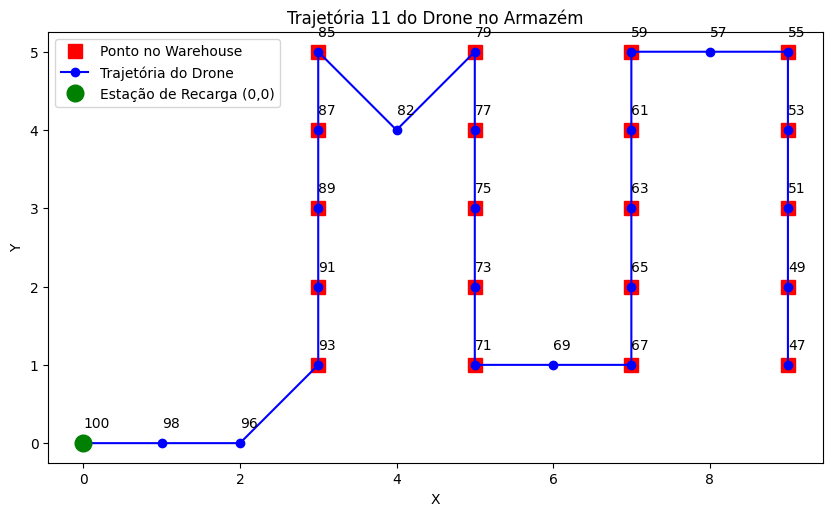


Trajetória 12:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 0), Bateria 96
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 4), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 2), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 5), Bateria 55
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


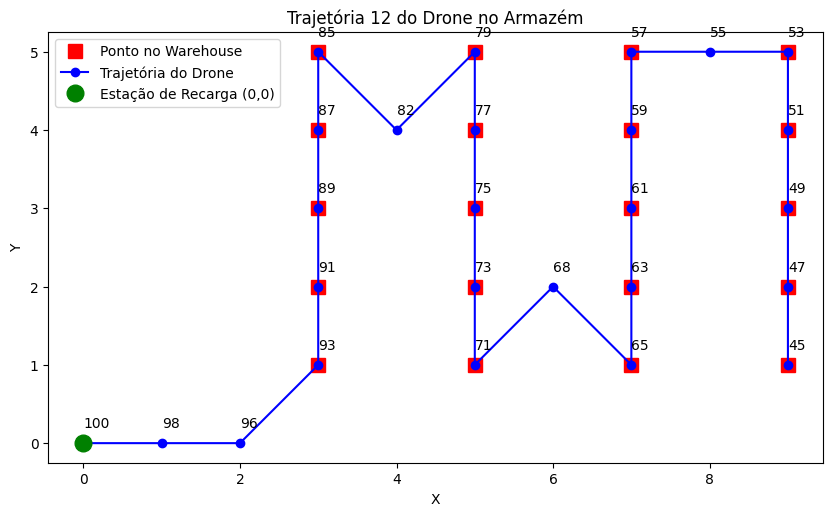


Trajetória 13:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 0), Bateria 96
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 4), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 0), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 5), Bateria 55
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


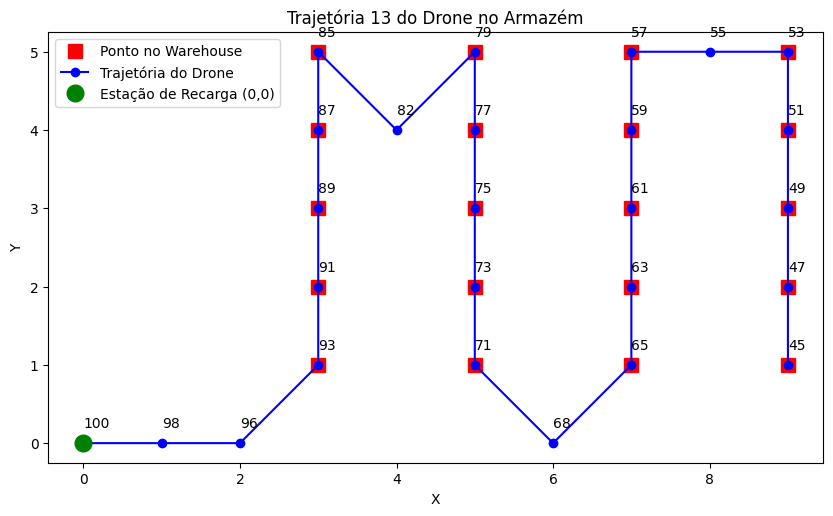


Trajetória 14:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 0), Bateria 96
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 5), Bateria 83
Passo 9: Posição (5, 5), Bateria 81
Passo 10: Posição (5, 4), Bateria 79
Passo 11: Posição (5, 3), Bateria 77
Passo 12: Posição (5, 2), Bateria 75
Passo 13: Posição (5, 1), Bateria 73
Passo 14: Posição (6, 1), Bateria 71
Passo 15: Posição (7, 1), Bateria 69
Passo 16: Posição (7, 2), Bateria 67
Passo 17: Posição (7, 3), Bateria 65
Passo 18: Posição (7, 4), Bateria 63
Passo 19: Posição (7, 5), Bateria 61
Passo 20: Posição (8, 5), Bateria 59
Passo 21: Posição (9, 5), Bateria 57
Passo 22: Posição (9, 4), Bateria 55
Passo 23: Posição (9, 3), Bateria 53
Passo 24: Posição (9, 2), Bateria 51
Passo 25: Posição (9, 1), Bateria 49


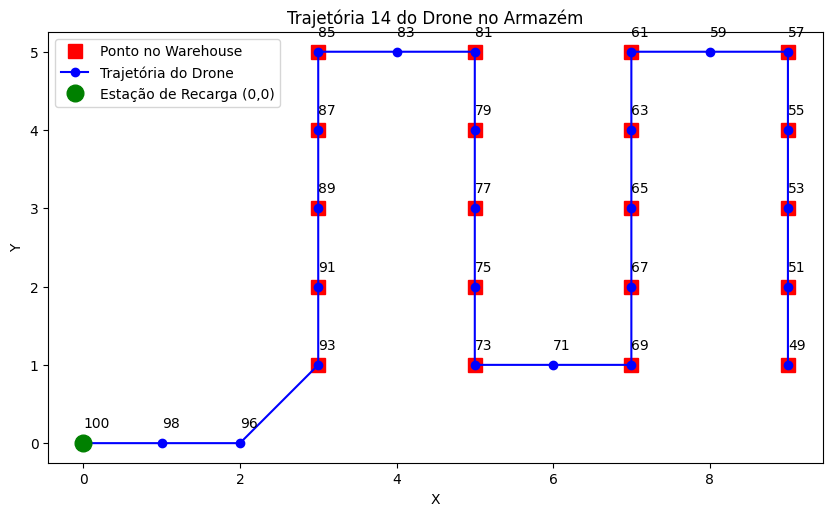


Trajetória 15:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 0), Bateria 96
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 5), Bateria 83
Passo 9: Posição (5, 5), Bateria 81
Passo 10: Posição (5, 4), Bateria 79
Passo 11: Posição (5, 3), Bateria 77
Passo 12: Posição (5, 2), Bateria 75
Passo 13: Posição (5, 1), Bateria 73
Passo 14: Posição (6, 0), Bateria 70
Passo 15: Posição (7, 1), Bateria 67
Passo 16: Posição (7, 2), Bateria 65
Passo 17: Posição (7, 3), Bateria 63
Passo 18: Posição (7, 4), Bateria 61
Passo 19: Posição (7, 5), Bateria 59
Passo 20: Posição (8, 5), Bateria 57
Passo 21: Posição (9, 5), Bateria 55
Passo 22: Posição (9, 4), Bateria 53
Passo 23: Posição (9, 3), Bateria 51
Passo 24: Posição (9, 2), Bateria 49
Passo 25: Posição (9, 1), Bateria 47


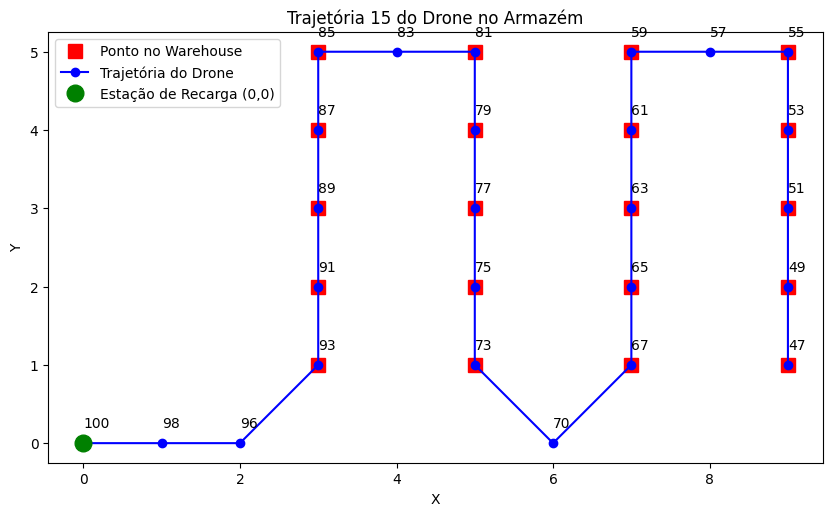


Trajetória 16:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 0), Bateria 96
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 5), Bateria 83
Passo 9: Posição (5, 5), Bateria 81
Passo 10: Posição (5, 4), Bateria 79
Passo 11: Posição (5, 3), Bateria 77
Passo 12: Posição (5, 2), Bateria 75
Passo 13: Posição (5, 1), Bateria 73
Passo 14: Posição (6, 2), Bateria 70
Passo 15: Posição (7, 1), Bateria 67
Passo 16: Posição (7, 2), Bateria 65
Passo 17: Posição (7, 3), Bateria 63
Passo 18: Posição (7, 4), Bateria 61
Passo 19: Posição (7, 5), Bateria 59
Passo 20: Posição (8, 5), Bateria 57
Passo 21: Posição (9, 5), Bateria 55
Passo 22: Posição (9, 4), Bateria 53
Passo 23: Posição (9, 3), Bateria 51
Passo 24: Posição (9, 2), Bateria 49
Passo 25: Posição (9, 1), Bateria 47


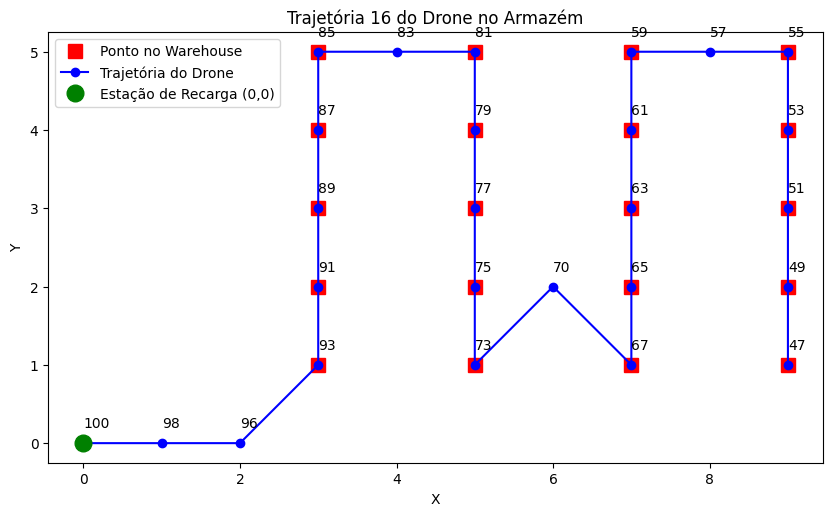


Trajetória 17:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 5), Bateria 83
Passo 9: Posição (5, 5), Bateria 81
Passo 10: Posição (5, 4), Bateria 79
Passo 11: Posição (5, 3), Bateria 77
Passo 12: Posição (5, 2), Bateria 75
Passo 13: Posição (5, 1), Bateria 73
Passo 14: Posição (6, 1), Bateria 71
Passo 15: Posição (7, 1), Bateria 69
Passo 16: Posição (7, 2), Bateria 67
Passo 17: Posição (7, 3), Bateria 65
Passo 18: Posição (7, 4), Bateria 63
Passo 19: Posição (7, 5), Bateria 61
Passo 20: Posição (8, 5), Bateria 59
Passo 21: Posição (9, 5), Bateria 57
Passo 22: Posição (9, 4), Bateria 55
Passo 23: Posição (9, 3), Bateria 53
Passo 24: Posição (9, 2), Bateria 51
Passo 25: Posição (9, 1), Bateria 49


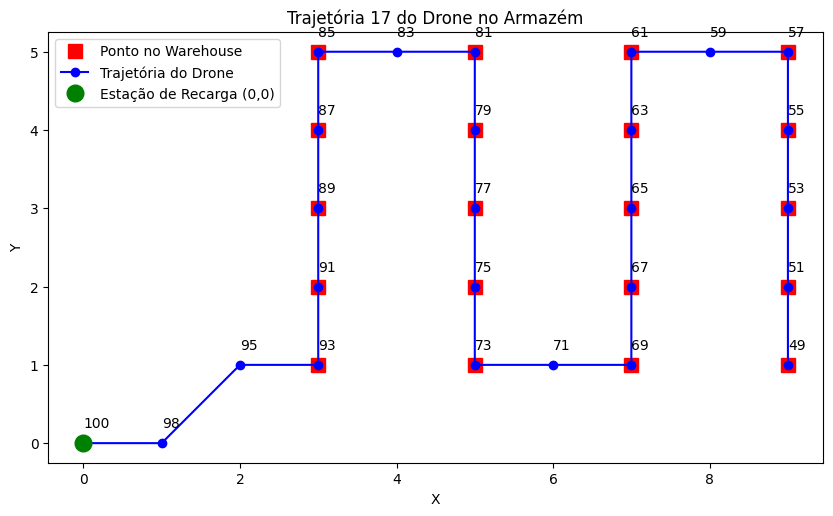


Trajetória 18:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 5), Bateria 83
Passo 9: Posição (5, 5), Bateria 81
Passo 10: Posição (5, 4), Bateria 79
Passo 11: Posição (5, 3), Bateria 77
Passo 12: Posição (5, 2), Bateria 75
Passo 13: Posição (5, 1), Bateria 73
Passo 14: Posição (6, 2), Bateria 70
Passo 15: Posição (7, 1), Bateria 67
Passo 16: Posição (7, 2), Bateria 65
Passo 17: Posição (7, 3), Bateria 63
Passo 18: Posição (7, 4), Bateria 61
Passo 19: Posição (7, 5), Bateria 59
Passo 20: Posição (8, 5), Bateria 57
Passo 21: Posição (9, 5), Bateria 55
Passo 22: Posição (9, 4), Bateria 53
Passo 23: Posição (9, 3), Bateria 51
Passo 24: Posição (9, 2), Bateria 49
Passo 25: Posição (9, 1), Bateria 47


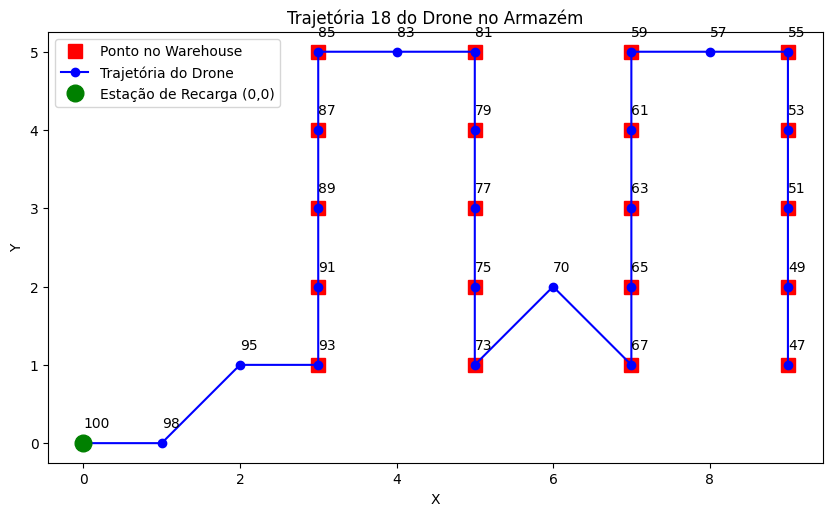


Trajetória 19:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 5), Bateria 83
Passo 9: Posição (5, 5), Bateria 81
Passo 10: Posição (5, 4), Bateria 79
Passo 11: Posição (5, 3), Bateria 77
Passo 12: Posição (5, 2), Bateria 75
Passo 13: Posição (5, 1), Bateria 73
Passo 14: Posição (6, 0), Bateria 70
Passo 15: Posição (7, 1), Bateria 67
Passo 16: Posição (7, 2), Bateria 65
Passo 17: Posição (7, 3), Bateria 63
Passo 18: Posição (7, 4), Bateria 61
Passo 19: Posição (7, 5), Bateria 59
Passo 20: Posição (8, 5), Bateria 57
Passo 21: Posição (9, 5), Bateria 55
Passo 22: Posição (9, 4), Bateria 53
Passo 23: Posição (9, 3), Bateria 51
Passo 24: Posição (9, 2), Bateria 49
Passo 25: Posição (9, 1), Bateria 47


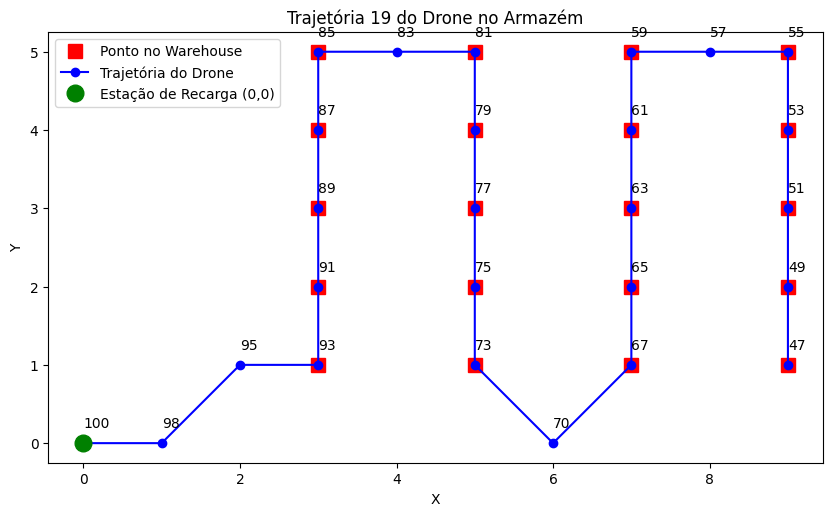


Trajetória 20:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 2), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 4), Bateria 80
Passo 9: Posição (5, 5), Bateria 77
Passo 10: Posição (5, 4), Bateria 75
Passo 11: Posição (5, 3), Bateria 73
Passo 12: Posição (5, 2), Bateria 71
Passo 13: Posição (5, 1), Bateria 69
Passo 14: Posição (6, 1), Bateria 67
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 5), Bateria 55
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


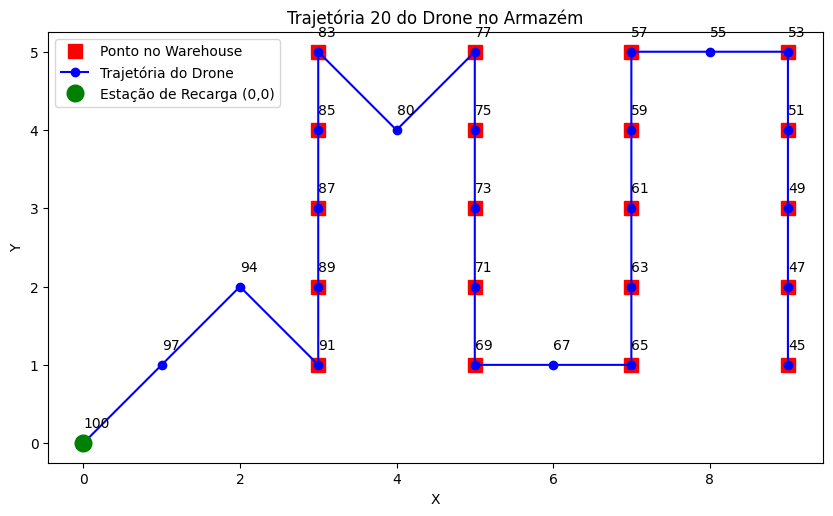


Trajetória 21:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 0), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 4), Bateria 80
Passo 9: Posição (5, 5), Bateria 77
Passo 10: Posição (5, 4), Bateria 75
Passo 11: Posição (5, 3), Bateria 73
Passo 12: Posição (5, 2), Bateria 71
Passo 13: Posição (5, 1), Bateria 69
Passo 14: Posição (6, 1), Bateria 67
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 5), Bateria 55
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


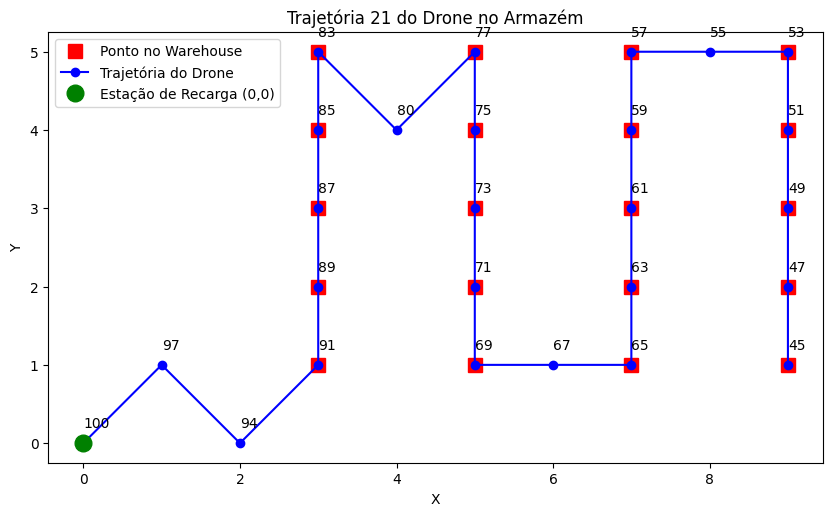


Trajetória 22:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 0), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 6), Bateria 80
Passo 9: Posição (5, 5), Bateria 77
Passo 10: Posição (5, 4), Bateria 75
Passo 11: Posição (5, 3), Bateria 73
Passo 12: Posição (5, 2), Bateria 71
Passo 13: Posição (5, 1), Bateria 69
Passo 14: Posição (6, 1), Bateria 67
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 5), Bateria 55
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


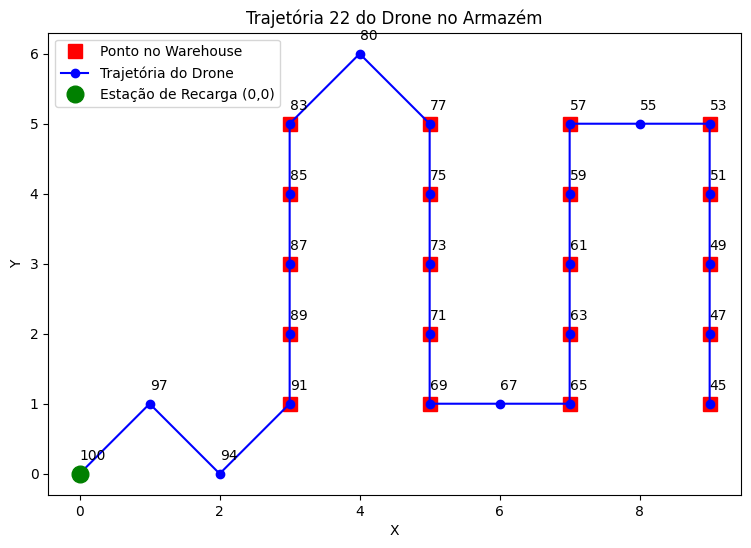


Trajetória 23:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 2), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 6), Bateria 80
Passo 9: Posição (5, 5), Bateria 77
Passo 10: Posição (5, 4), Bateria 75
Passo 11: Posição (5, 3), Bateria 73
Passo 12: Posição (5, 2), Bateria 71
Passo 13: Posição (5, 1), Bateria 69
Passo 14: Posição (6, 1), Bateria 67
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 5), Bateria 55
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


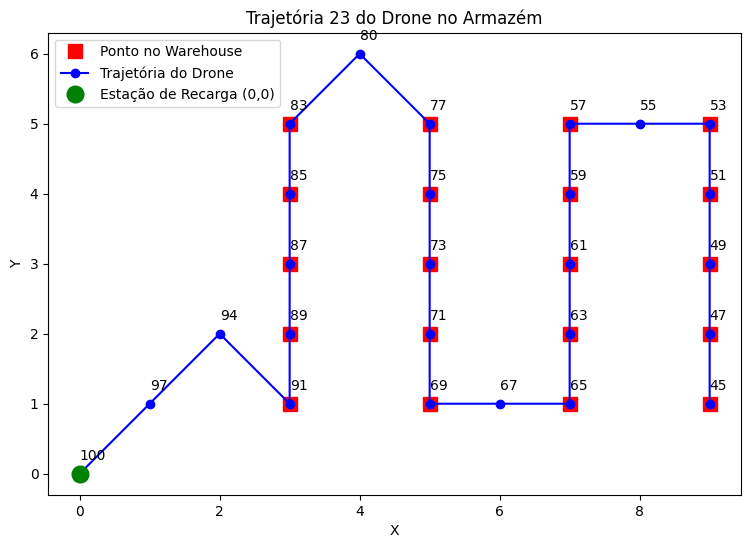


Trajetória 24:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 0), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 6), Bateria 80
Passo 9: Posição (5, 5), Bateria 77
Passo 10: Posição (5, 4), Bateria 75
Passo 11: Posição (5, 3), Bateria 73
Passo 12: Posição (5, 2), Bateria 71
Passo 13: Posição (5, 1), Bateria 69
Passo 14: Posição (6, 2), Bateria 66
Passo 15: Posição (7, 1), Bateria 63
Passo 16: Posição (7, 2), Bateria 61
Passo 17: Posição (7, 3), Bateria 59
Passo 18: Posição (7, 4), Bateria 57
Passo 19: Posição (7, 5), Bateria 55
Passo 20: Posição (8, 5), Bateria 53
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


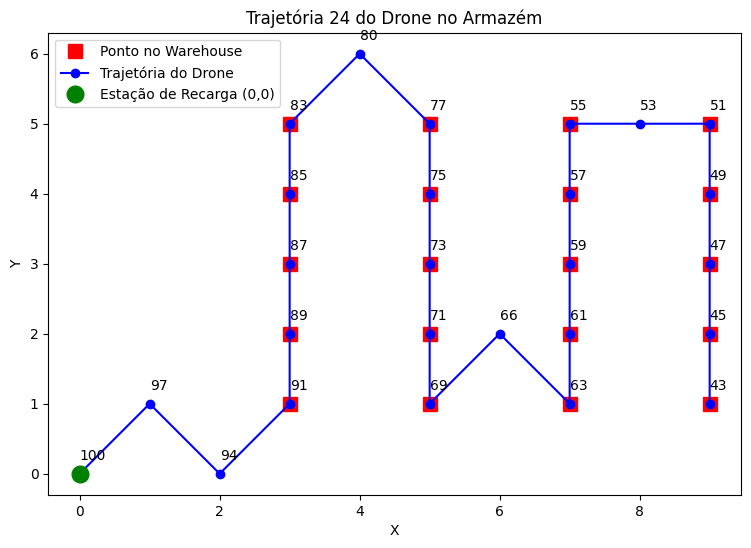


Trajetória 25:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 0), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 6), Bateria 80
Passo 9: Posição (5, 5), Bateria 77
Passo 10: Posição (5, 4), Bateria 75
Passo 11: Posição (5, 3), Bateria 73
Passo 12: Posição (5, 2), Bateria 71
Passo 13: Posição (5, 1), Bateria 69
Passo 14: Posição (6, 0), Bateria 66
Passo 15: Posição (7, 1), Bateria 63
Passo 16: Posição (7, 2), Bateria 61
Passo 17: Posição (7, 3), Bateria 59
Passo 18: Posição (7, 4), Bateria 57
Passo 19: Posição (7, 5), Bateria 55
Passo 20: Posição (8, 5), Bateria 53
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


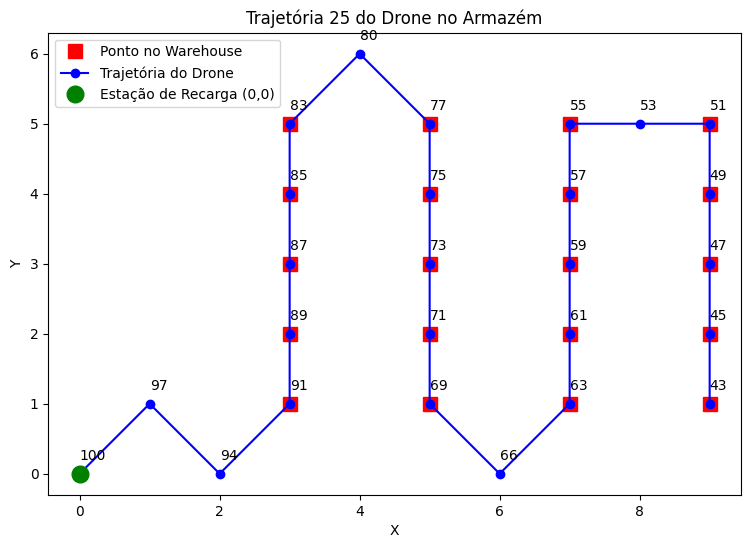


Trajetória 26:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 2), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 6), Bateria 80
Passo 9: Posição (5, 5), Bateria 77
Passo 10: Posição (5, 4), Bateria 75
Passo 11: Posição (5, 3), Bateria 73
Passo 12: Posição (5, 2), Bateria 71
Passo 13: Posição (5, 1), Bateria 69
Passo 14: Posição (6, 0), Bateria 66
Passo 15: Posição (7, 1), Bateria 63
Passo 16: Posição (7, 2), Bateria 61
Passo 17: Posição (7, 3), Bateria 59
Passo 18: Posição (7, 4), Bateria 57
Passo 19: Posição (7, 5), Bateria 55
Passo 20: Posição (8, 5), Bateria 53
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


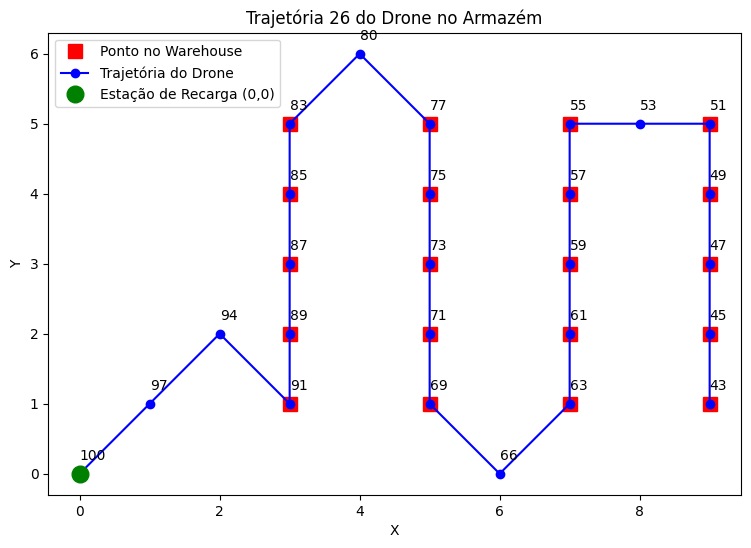


Trajetória 27:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 2), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 6), Bateria 80
Passo 9: Posição (5, 5), Bateria 77
Passo 10: Posição (5, 4), Bateria 75
Passo 11: Posição (5, 3), Bateria 73
Passo 12: Posição (5, 2), Bateria 71
Passo 13: Posição (5, 1), Bateria 69
Passo 14: Posição (6, 2), Bateria 66
Passo 15: Posição (7, 1), Bateria 63
Passo 16: Posição (7, 2), Bateria 61
Passo 17: Posição (7, 3), Bateria 59
Passo 18: Posição (7, 4), Bateria 57
Passo 19: Posição (7, 5), Bateria 55
Passo 20: Posição (8, 5), Bateria 53
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


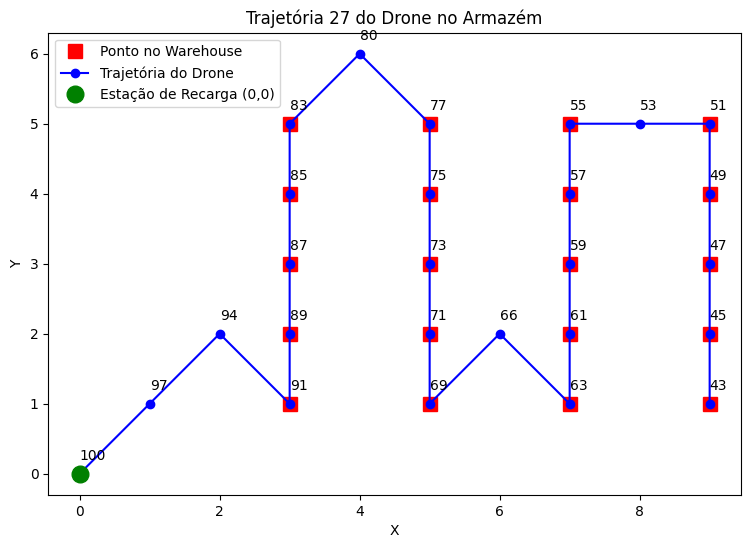


Trajetória 28:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 2), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 4), Bateria 80
Passo 9: Posição (5, 5), Bateria 77
Passo 10: Posição (5, 4), Bateria 75
Passo 11: Posição (5, 3), Bateria 73
Passo 12: Posição (5, 2), Bateria 71
Passo 13: Posição (5, 1), Bateria 69
Passo 14: Posição (6, 0), Bateria 66
Passo 15: Posição (7, 1), Bateria 63
Passo 16: Posição (7, 2), Bateria 61
Passo 17: Posição (7, 3), Bateria 59
Passo 18: Posição (7, 4), Bateria 57
Passo 19: Posição (7, 5), Bateria 55
Passo 20: Posição (8, 5), Bateria 53
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


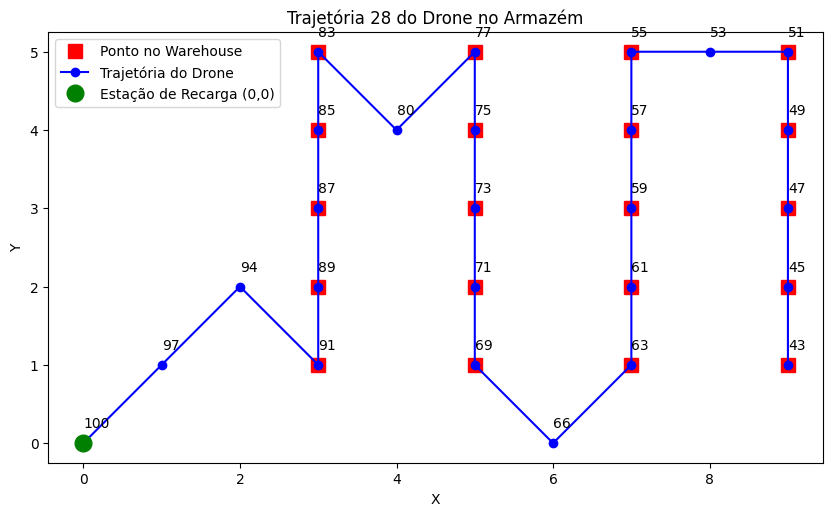


Trajetória 29:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 2), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 4), Bateria 80
Passo 9: Posição (5, 5), Bateria 77
Passo 10: Posição (5, 4), Bateria 75
Passo 11: Posição (5, 3), Bateria 73
Passo 12: Posição (5, 2), Bateria 71
Passo 13: Posição (5, 1), Bateria 69
Passo 14: Posição (6, 2), Bateria 66
Passo 15: Posição (7, 1), Bateria 63
Passo 16: Posição (7, 2), Bateria 61
Passo 17: Posição (7, 3), Bateria 59
Passo 18: Posição (7, 4), Bateria 57
Passo 19: Posição (7, 5), Bateria 55
Passo 20: Posição (8, 5), Bateria 53
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


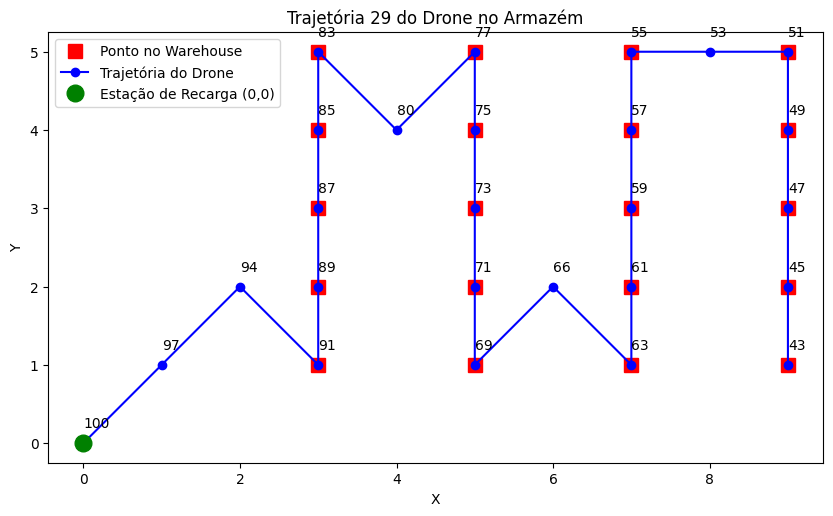


Trajetória 30:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 0), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 4), Bateria 80
Passo 9: Posição (5, 5), Bateria 77
Passo 10: Posição (5, 4), Bateria 75
Passo 11: Posição (5, 3), Bateria 73
Passo 12: Posição (5, 2), Bateria 71
Passo 13: Posição (5, 1), Bateria 69
Passo 14: Posição (6, 0), Bateria 66
Passo 15: Posição (7, 1), Bateria 63
Passo 16: Posição (7, 2), Bateria 61
Passo 17: Posição (7, 3), Bateria 59
Passo 18: Posição (7, 4), Bateria 57
Passo 19: Posição (7, 5), Bateria 55
Passo 20: Posição (8, 5), Bateria 53
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


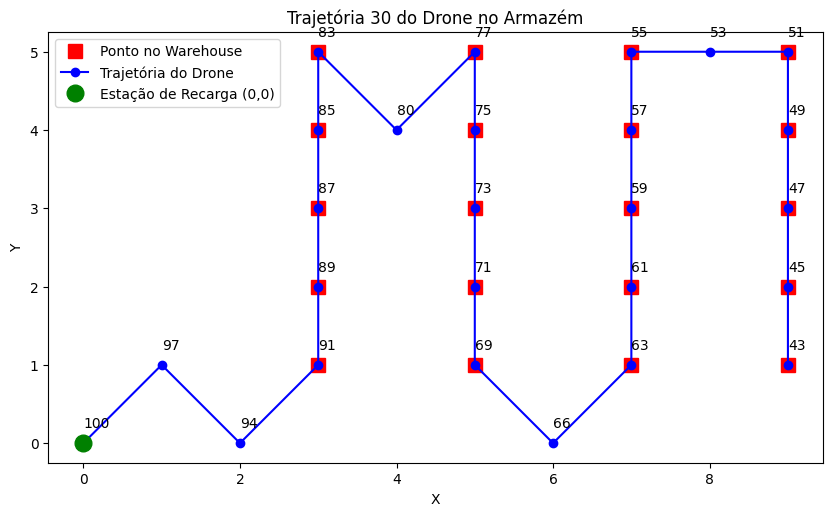


Trajetória 31:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 0), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 4), Bateria 80
Passo 9: Posição (5, 5), Bateria 77
Passo 10: Posição (5, 4), Bateria 75
Passo 11: Posição (5, 3), Bateria 73
Passo 12: Posição (5, 2), Bateria 71
Passo 13: Posição (5, 1), Bateria 69
Passo 14: Posição (6, 2), Bateria 66
Passo 15: Posição (7, 1), Bateria 63
Passo 16: Posição (7, 2), Bateria 61
Passo 17: Posição (7, 3), Bateria 59
Passo 18: Posição (7, 4), Bateria 57
Passo 19: Posição (7, 5), Bateria 55
Passo 20: Posição (8, 5), Bateria 53
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


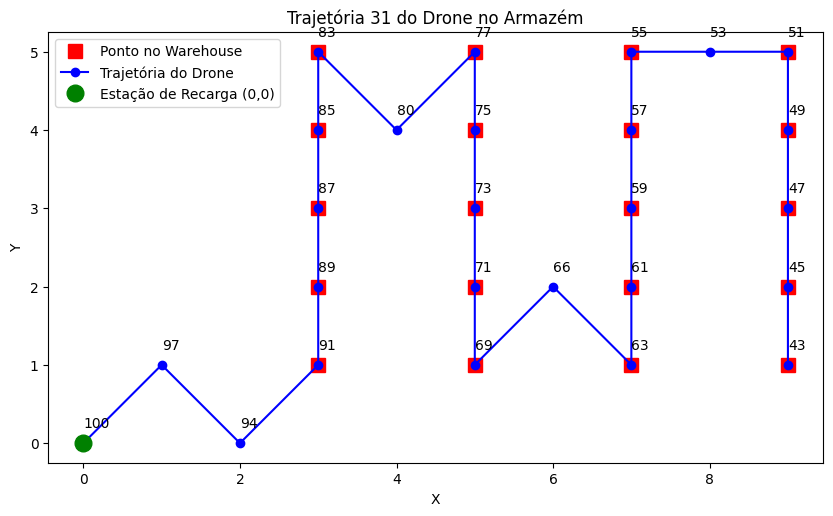


Trajetória 32:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 2), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 5), Bateria 81
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 1), Bateria 69
Passo 15: Posição (7, 1), Bateria 67
Passo 16: Posição (7, 2), Bateria 65
Passo 17: Posição (7, 3), Bateria 63
Passo 18: Posição (7, 4), Bateria 61
Passo 19: Posição (7, 5), Bateria 59
Passo 20: Posição (8, 5), Bateria 57
Passo 21: Posição (9, 5), Bateria 55
Passo 22: Posição (9, 4), Bateria 53
Passo 23: Posição (9, 3), Bateria 51
Passo 24: Posição (9, 2), Bateria 49
Passo 25: Posição (9, 1), Bateria 47


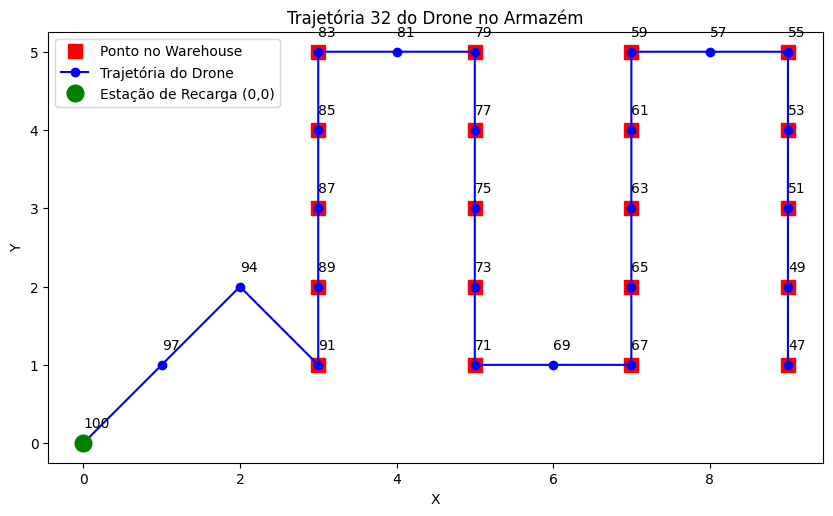


Trajetória 33:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 0), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 5), Bateria 81
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 1), Bateria 69
Passo 15: Posição (7, 1), Bateria 67
Passo 16: Posição (7, 2), Bateria 65
Passo 17: Posição (7, 3), Bateria 63
Passo 18: Posição (7, 4), Bateria 61
Passo 19: Posição (7, 5), Bateria 59
Passo 20: Posição (8, 5), Bateria 57
Passo 21: Posição (9, 5), Bateria 55
Passo 22: Posição (9, 4), Bateria 53
Passo 23: Posição (9, 3), Bateria 51
Passo 24: Posição (9, 2), Bateria 49
Passo 25: Posição (9, 1), Bateria 47


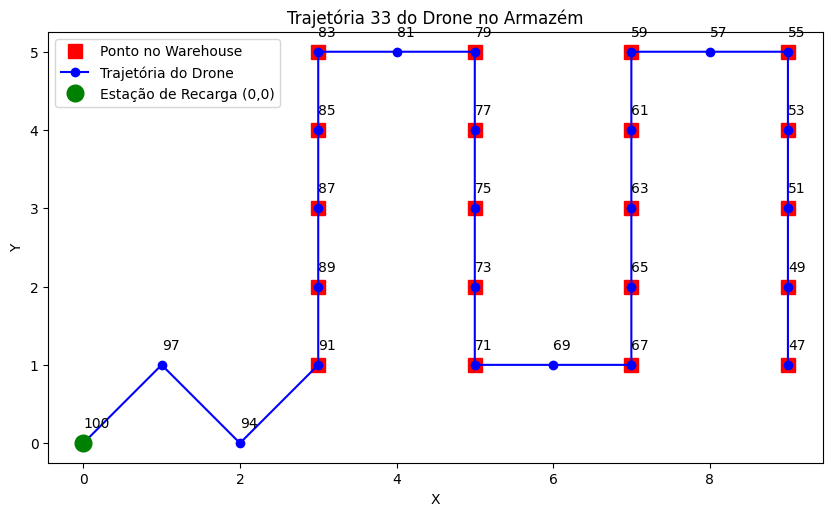


Trajetória 34:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 2), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 5), Bateria 81
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 0), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 5), Bateria 55
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


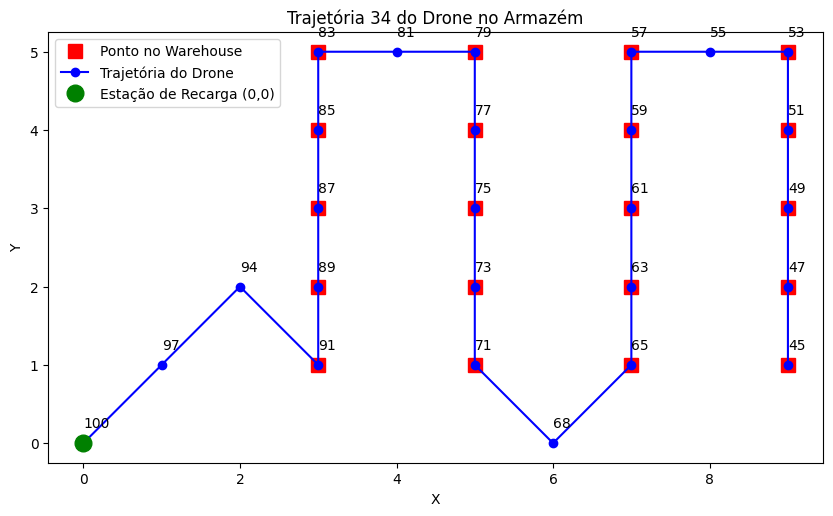


Trajetória 35:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 2), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 5), Bateria 81
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 2), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 5), Bateria 55
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


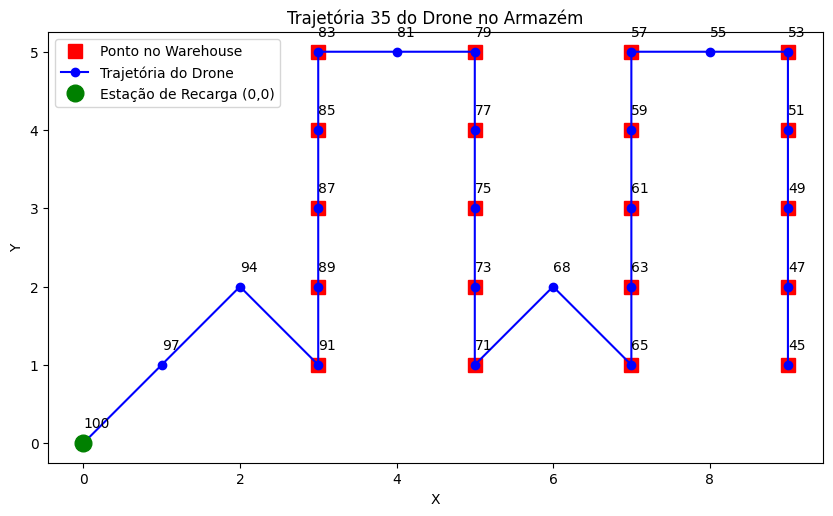


Trajetória 36:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 0), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 5), Bateria 81
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 0), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 5), Bateria 55
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


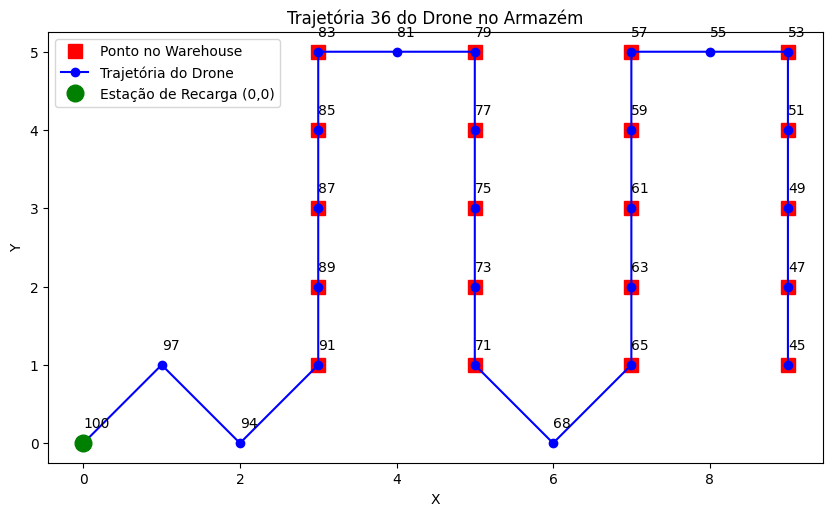


Trajetória 37:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 0), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 5), Bateria 81
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 2), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 5), Bateria 55
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


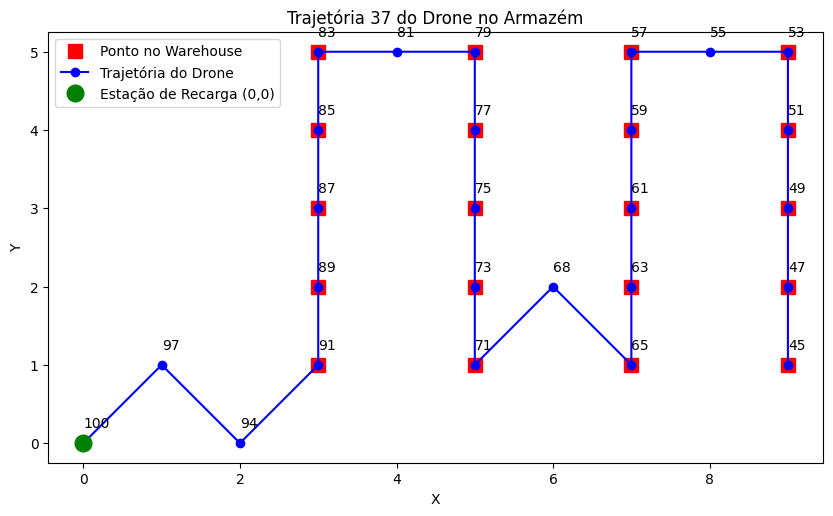


Trajetória 38:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 5), Bateria 83
Passo 9: Posição (5, 5), Bateria 81
Passo 10: Posição (5, 4), Bateria 79
Passo 11: Posição (5, 3), Bateria 77
Passo 12: Posição (5, 2), Bateria 75
Passo 13: Posição (5, 1), Bateria 73
Passo 14: Posição (6, 1), Bateria 71
Passo 15: Posição (7, 1), Bateria 69
Passo 16: Posição (7, 2), Bateria 67
Passo 17: Posição (7, 3), Bateria 65
Passo 18: Posição (7, 4), Bateria 63
Passo 19: Posição (7, 5), Bateria 61
Passo 20: Posição (8, 5), Bateria 59
Passo 21: Posição (9, 5), Bateria 57
Passo 22: Posição (9, 4), Bateria 55
Passo 23: Posição (9, 3), Bateria 53
Passo 24: Posição (9, 2), Bateria 51
Passo 25: Posição (9, 1), Bateria 49


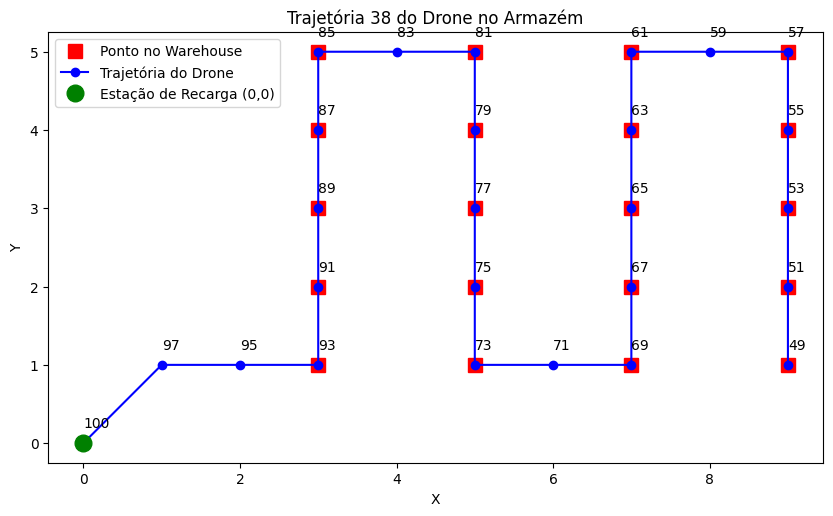


Trajetória 39:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 5), Bateria 83
Passo 9: Posição (5, 5), Bateria 81
Passo 10: Posição (5, 4), Bateria 79
Passo 11: Posição (5, 3), Bateria 77
Passo 12: Posição (5, 2), Bateria 75
Passo 13: Posição (5, 1), Bateria 73
Passo 14: Posição (6, 0), Bateria 70
Passo 15: Posição (7, 1), Bateria 67
Passo 16: Posição (7, 2), Bateria 65
Passo 17: Posição (7, 3), Bateria 63
Passo 18: Posição (7, 4), Bateria 61
Passo 19: Posição (7, 5), Bateria 59
Passo 20: Posição (8, 5), Bateria 57
Passo 21: Posição (9, 5), Bateria 55
Passo 22: Posição (9, 4), Bateria 53
Passo 23: Posição (9, 3), Bateria 51
Passo 24: Posição (9, 2), Bateria 49
Passo 25: Posição (9, 1), Bateria 47


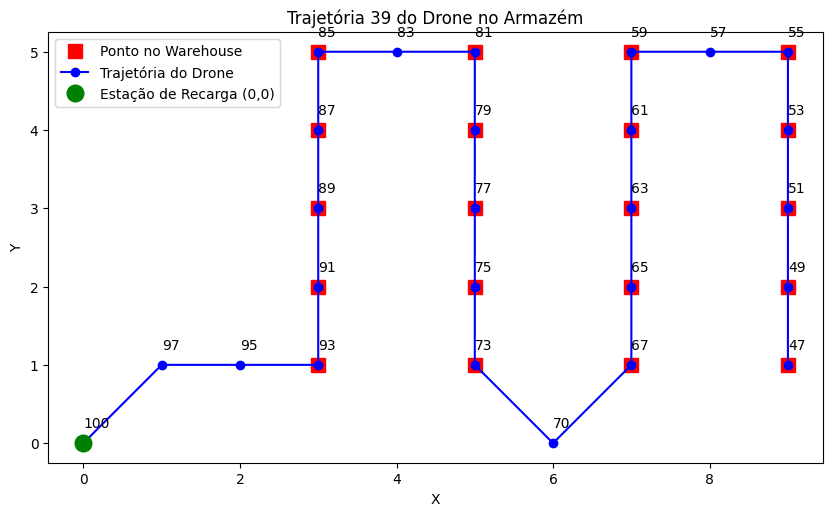


Trajetória 40:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 5), Bateria 83
Passo 9: Posição (5, 5), Bateria 81
Passo 10: Posição (5, 4), Bateria 79
Passo 11: Posição (5, 3), Bateria 77
Passo 12: Posição (5, 2), Bateria 75
Passo 13: Posição (5, 1), Bateria 73
Passo 14: Posição (6, 2), Bateria 70
Passo 15: Posição (7, 1), Bateria 67
Passo 16: Posição (7, 2), Bateria 65
Passo 17: Posição (7, 3), Bateria 63
Passo 18: Posição (7, 4), Bateria 61
Passo 19: Posição (7, 5), Bateria 59
Passo 20: Posição (8, 5), Bateria 57
Passo 21: Posição (9, 5), Bateria 55
Passo 22: Posição (9, 4), Bateria 53
Passo 23: Posição (9, 3), Bateria 51
Passo 24: Posição (9, 2), Bateria 49
Passo 25: Posição (9, 1), Bateria 47


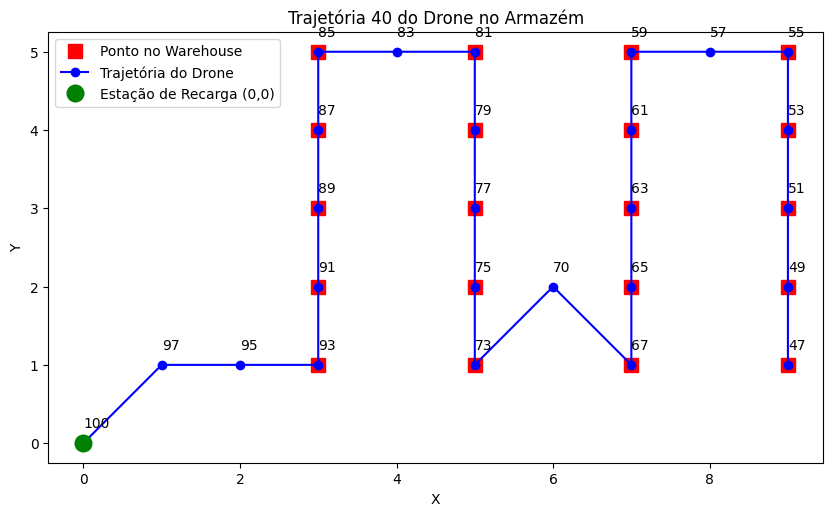


Trajetória 41:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 4), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 1), Bateria 69
Passo 15: Posição (7, 1), Bateria 67
Passo 16: Posição (7, 2), Bateria 65
Passo 17: Posição (7, 3), Bateria 63
Passo 18: Posição (7, 4), Bateria 61
Passo 19: Posição (7, 5), Bateria 59
Passo 20: Posição (8, 5), Bateria 57
Passo 21: Posição (9, 5), Bateria 55
Passo 22: Posição (9, 4), Bateria 53
Passo 23: Posição (9, 3), Bateria 51
Passo 24: Posição (9, 2), Bateria 49
Passo 25: Posição (9, 1), Bateria 47


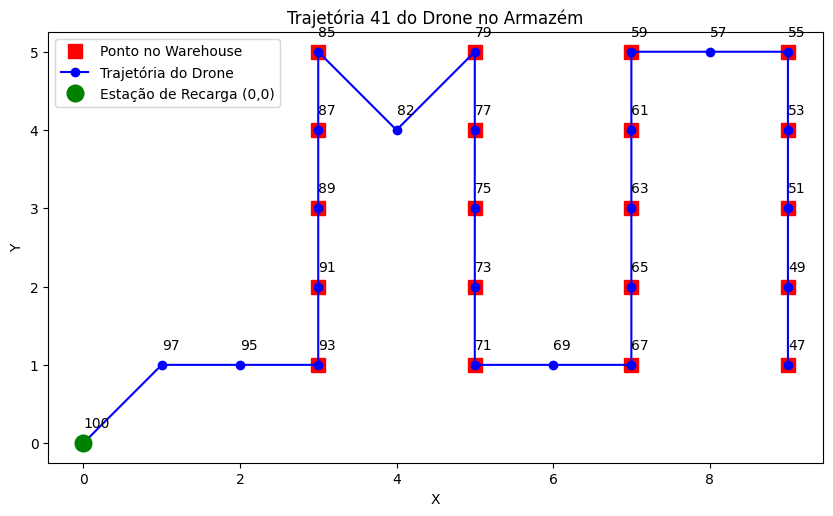


Trajetória 42:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 6), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 1), Bateria 69
Passo 15: Posição (7, 1), Bateria 67
Passo 16: Posição (7, 2), Bateria 65
Passo 17: Posição (7, 3), Bateria 63
Passo 18: Posição (7, 4), Bateria 61
Passo 19: Posição (7, 5), Bateria 59
Passo 20: Posição (8, 5), Bateria 57
Passo 21: Posição (9, 5), Bateria 55
Passo 22: Posição (9, 4), Bateria 53
Passo 23: Posição (9, 3), Bateria 51
Passo 24: Posição (9, 2), Bateria 49
Passo 25: Posição (9, 1), Bateria 47


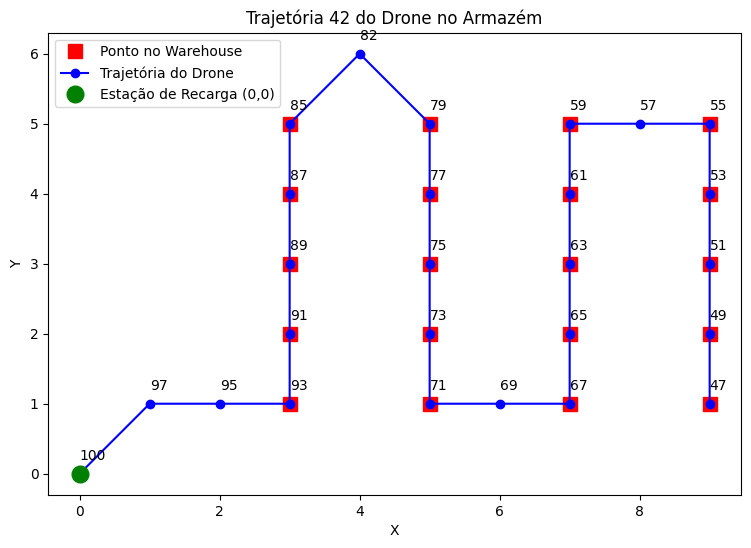


Trajetória 43:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 6), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 0), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 5), Bateria 55
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


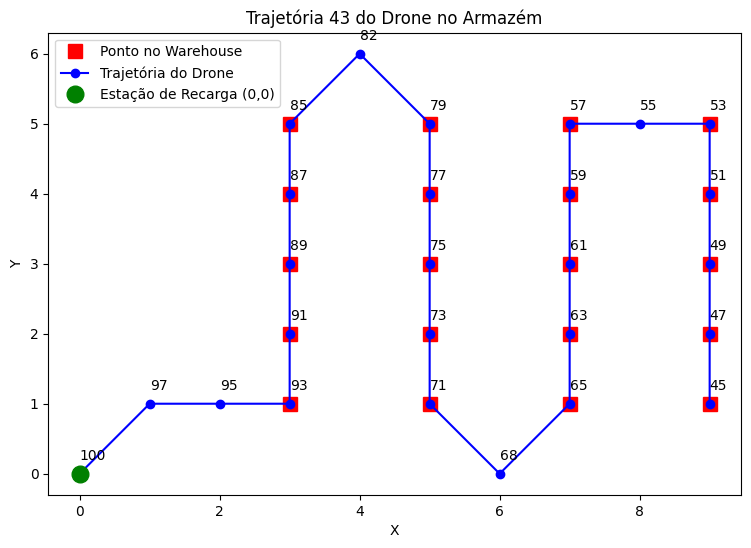


Trajetória 44:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 4), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 0), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 5), Bateria 55
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


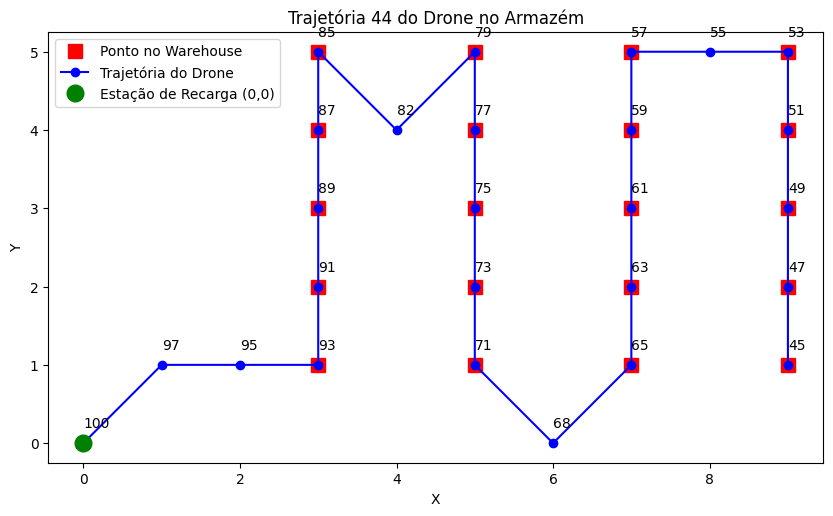


Trajetória 45:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 4), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 2), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 5), Bateria 55
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


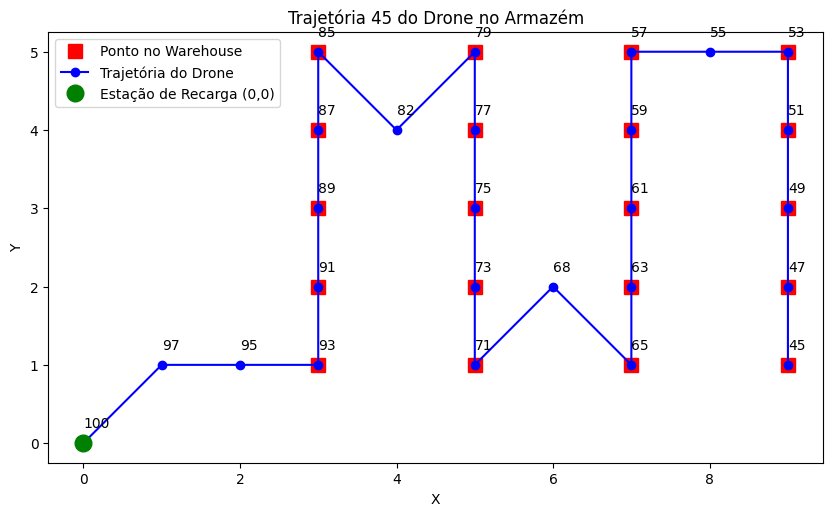


Trajetória 46:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 6), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 2), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 5), Bateria 55
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


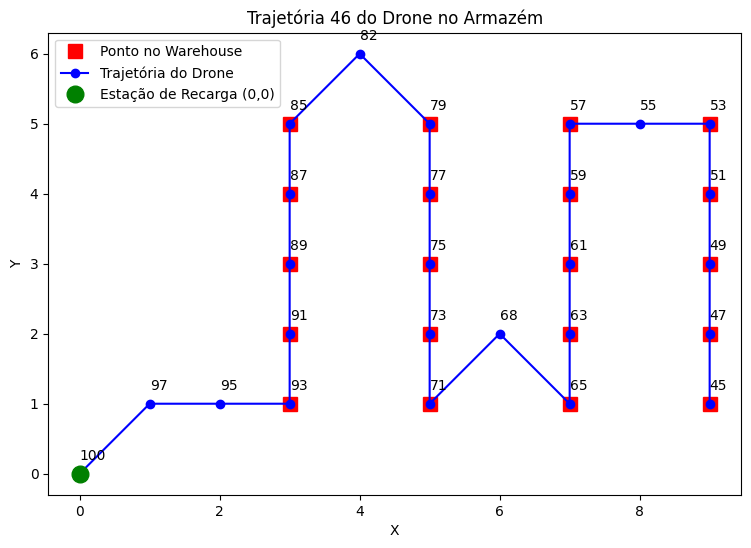


Trajetória 47:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 0), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 6), Bateria 80
Passo 9: Posição (5, 5), Bateria 77
Passo 10: Posição (5, 4), Bateria 75
Passo 11: Posição (5, 3), Bateria 73
Passo 12: Posição (5, 2), Bateria 71
Passo 13: Posição (5, 1), Bateria 69
Passo 14: Posição (6, 0), Bateria 66
Passo 15: Posição (7, 1), Bateria 63
Passo 16: Posição (7, 2), Bateria 61
Passo 17: Posição (7, 3), Bateria 59
Passo 18: Posição (7, 4), Bateria 57
Passo 19: Posição (7, 5), Bateria 55
Passo 20: Posição (8, 6), Bateria 52
Passo 21: Posição (9, 5), Bateria 49
Passo 22: Posição (9, 4), Bateria 47
Passo 23: Posição (9, 3), Bateria 45
Passo 24: Posição (9, 2), Bateria 43
Passo 25: Posição (9, 1), Bateria 41


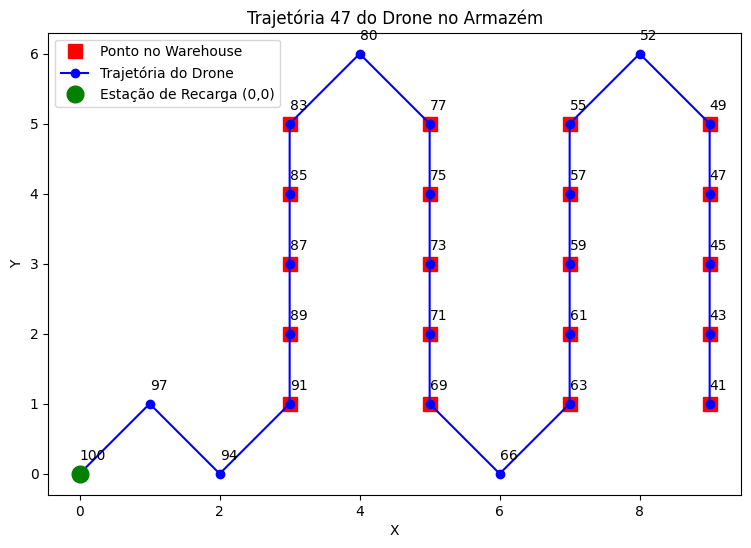


Trajetória 48:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 2), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 6), Bateria 80
Passo 9: Posição (5, 5), Bateria 77
Passo 10: Posição (5, 4), Bateria 75
Passo 11: Posição (5, 3), Bateria 73
Passo 12: Posição (5, 2), Bateria 71
Passo 13: Posição (5, 1), Bateria 69
Passo 14: Posição (6, 0), Bateria 66
Passo 15: Posição (7, 1), Bateria 63
Passo 16: Posição (7, 2), Bateria 61
Passo 17: Posição (7, 3), Bateria 59
Passo 18: Posição (7, 4), Bateria 57
Passo 19: Posição (7, 5), Bateria 55
Passo 20: Posição (8, 6), Bateria 52
Passo 21: Posição (9, 5), Bateria 49
Passo 22: Posição (9, 4), Bateria 47
Passo 23: Posição (9, 3), Bateria 45
Passo 24: Posição (9, 2), Bateria 43
Passo 25: Posição (9, 1), Bateria 41


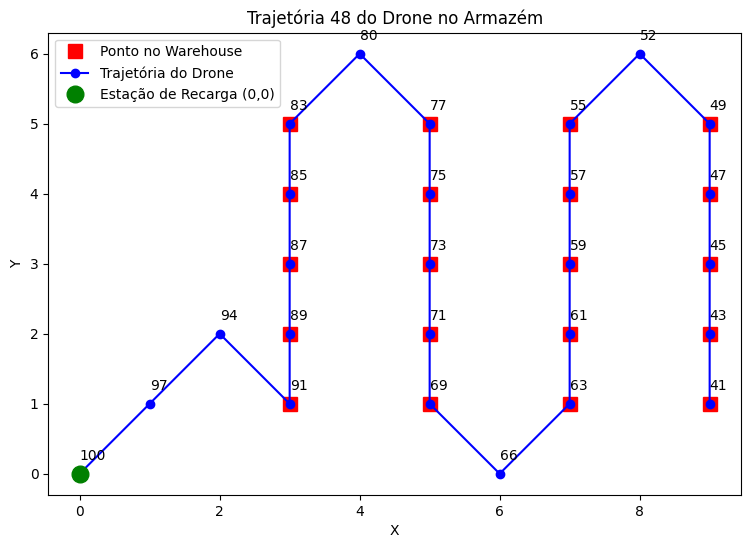


Trajetória 49:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 6), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 0), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 6), Bateria 54
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


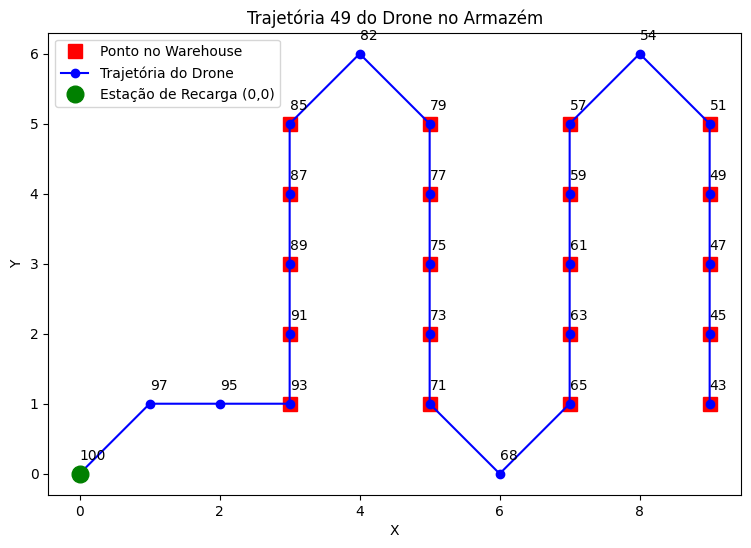


Trajetória 50:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 6), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 2), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 6), Bateria 54
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


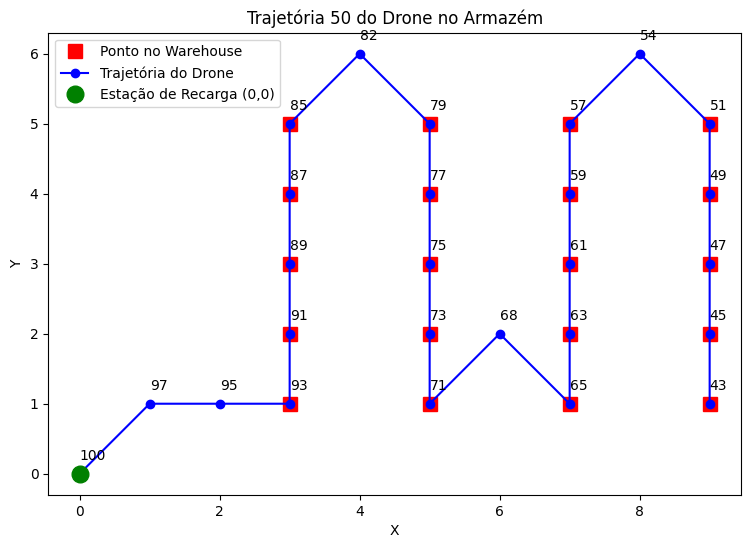


Trajetória 51:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 6), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 2), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 4), Bateria 54
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


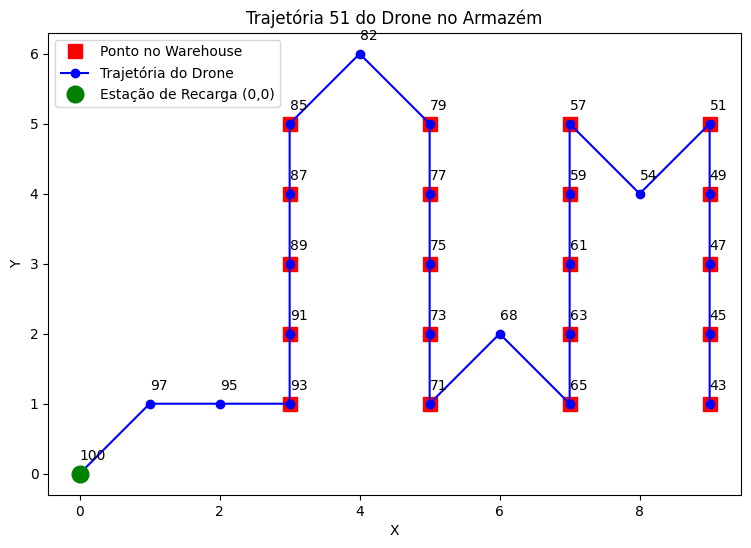


Trajetória 52:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 6), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 0), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 4), Bateria 54
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


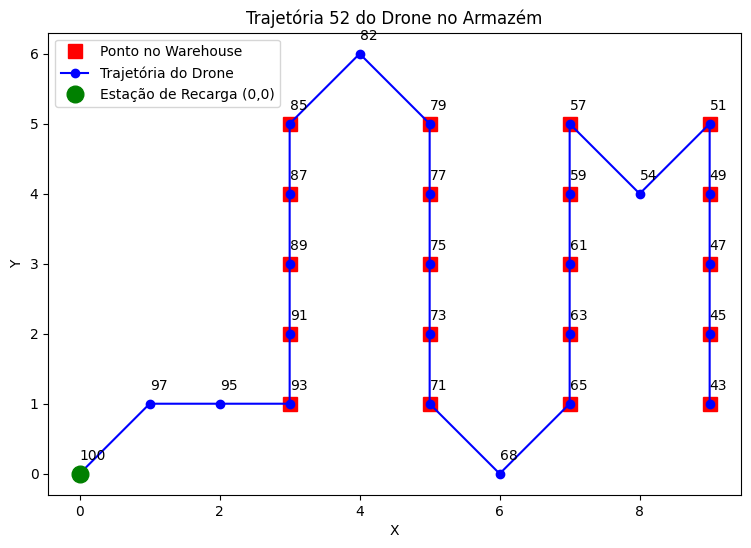


Trajetória 53:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 4), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 0), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 4), Bateria 54
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


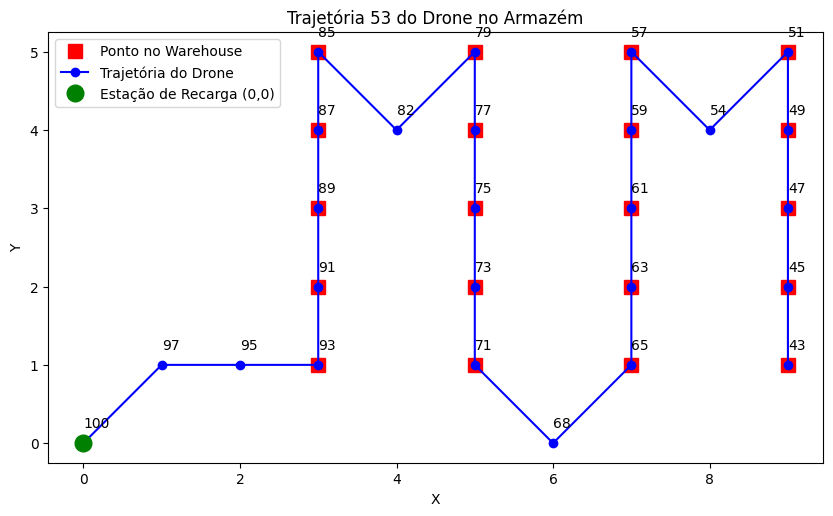


Trajetória 54:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 4), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 0), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 6), Bateria 54
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


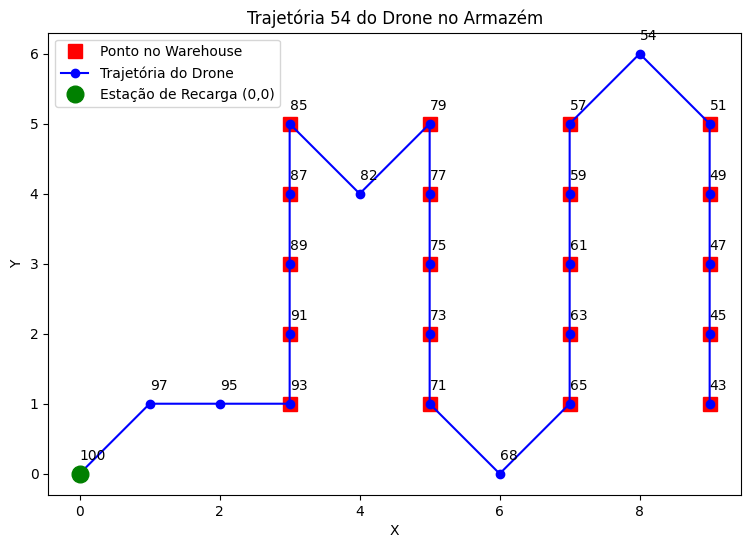


Trajetória 55:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 4), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 2), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 4), Bateria 54
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


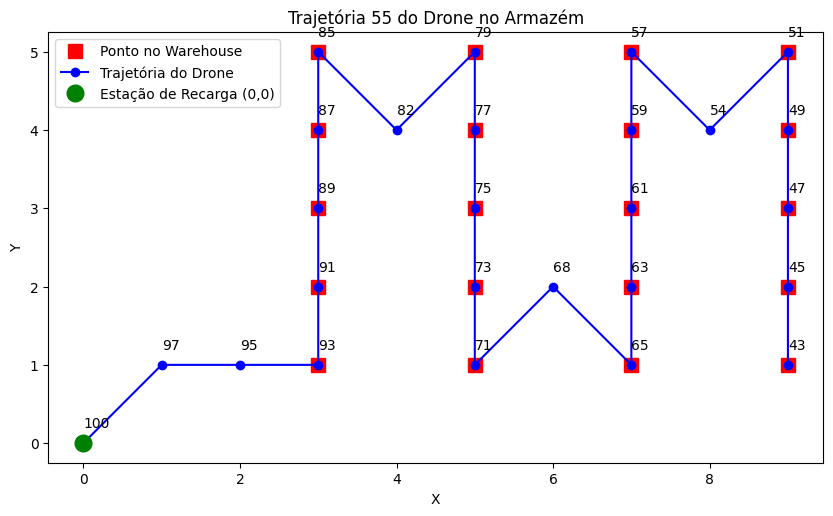


Trajetória 56:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 4), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 2), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 6), Bateria 54
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


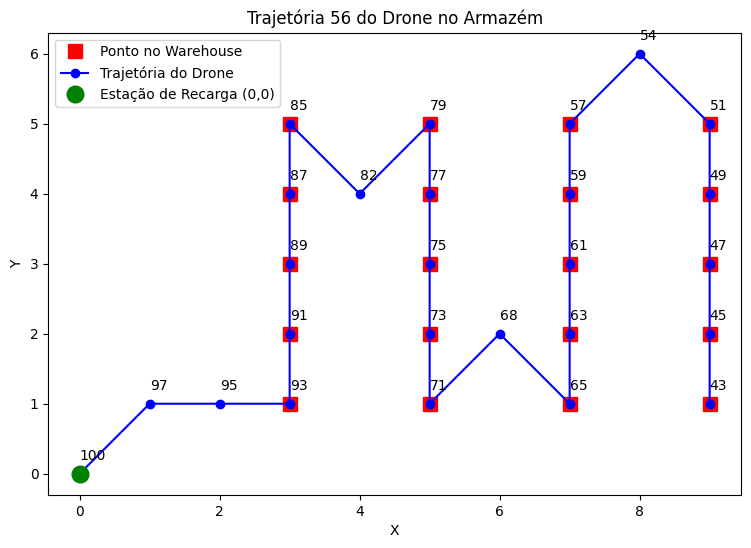


Trajetória 57:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 0), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 6), Bateria 80
Passo 9: Posição (5, 5), Bateria 77
Passo 10: Posição (5, 4), Bateria 75
Passo 11: Posição (5, 3), Bateria 73
Passo 12: Posição (5, 2), Bateria 71
Passo 13: Posição (5, 1), Bateria 69
Passo 14: Posição (6, 2), Bateria 66
Passo 15: Posição (7, 1), Bateria 63
Passo 16: Posição (7, 2), Bateria 61
Passo 17: Posição (7, 3), Bateria 59
Passo 18: Posição (7, 4), Bateria 57
Passo 19: Posição (7, 5), Bateria 55
Passo 20: Posição (8, 4), Bateria 52
Passo 21: Posição (9, 5), Bateria 49
Passo 22: Posição (9, 4), Bateria 47
Passo 23: Posição (9, 3), Bateria 45
Passo 24: Posição (9, 2), Bateria 43
Passo 25: Posição (9, 1), Bateria 41


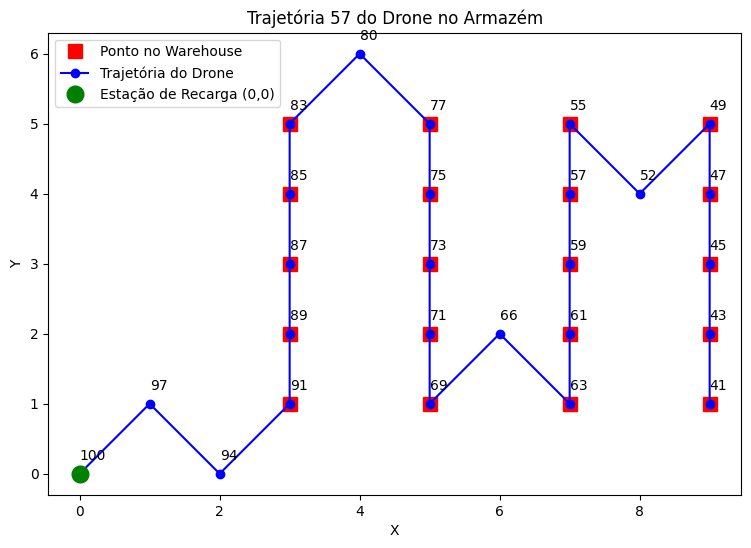


Trajetória 58:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 0), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 6), Bateria 80
Passo 9: Posição (5, 5), Bateria 77
Passo 10: Posição (5, 4), Bateria 75
Passo 11: Posição (5, 3), Bateria 73
Passo 12: Posição (5, 2), Bateria 71
Passo 13: Posição (5, 1), Bateria 69
Passo 14: Posição (6, 2), Bateria 66
Passo 15: Posição (7, 1), Bateria 63
Passo 16: Posição (7, 2), Bateria 61
Passo 17: Posição (7, 3), Bateria 59
Passo 18: Posição (7, 4), Bateria 57
Passo 19: Posição (7, 5), Bateria 55
Passo 20: Posição (8, 6), Bateria 52
Passo 21: Posição (9, 5), Bateria 49
Passo 22: Posição (9, 4), Bateria 47
Passo 23: Posição (9, 3), Bateria 45
Passo 24: Posição (9, 2), Bateria 43
Passo 25: Posição (9, 1), Bateria 41


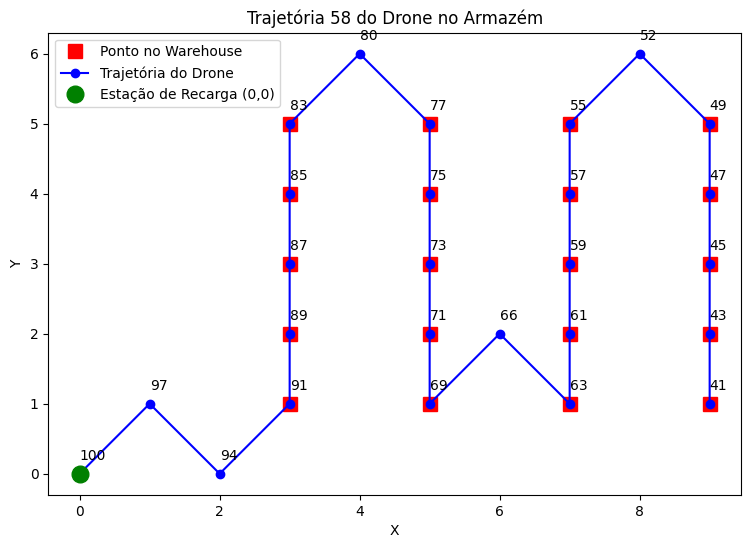


Trajetória 59:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 2), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 6), Bateria 80
Passo 9: Posição (5, 5), Bateria 77
Passo 10: Posição (5, 4), Bateria 75
Passo 11: Posição (5, 3), Bateria 73
Passo 12: Posição (5, 2), Bateria 71
Passo 13: Posição (5, 1), Bateria 69
Passo 14: Posição (6, 2), Bateria 66
Passo 15: Posição (7, 1), Bateria 63
Passo 16: Posição (7, 2), Bateria 61
Passo 17: Posição (7, 3), Bateria 59
Passo 18: Posição (7, 4), Bateria 57
Passo 19: Posição (7, 5), Bateria 55
Passo 20: Posição (8, 6), Bateria 52
Passo 21: Posição (9, 5), Bateria 49
Passo 22: Posição (9, 4), Bateria 47
Passo 23: Posição (9, 3), Bateria 45
Passo 24: Posição (9, 2), Bateria 43
Passo 25: Posição (9, 1), Bateria 41


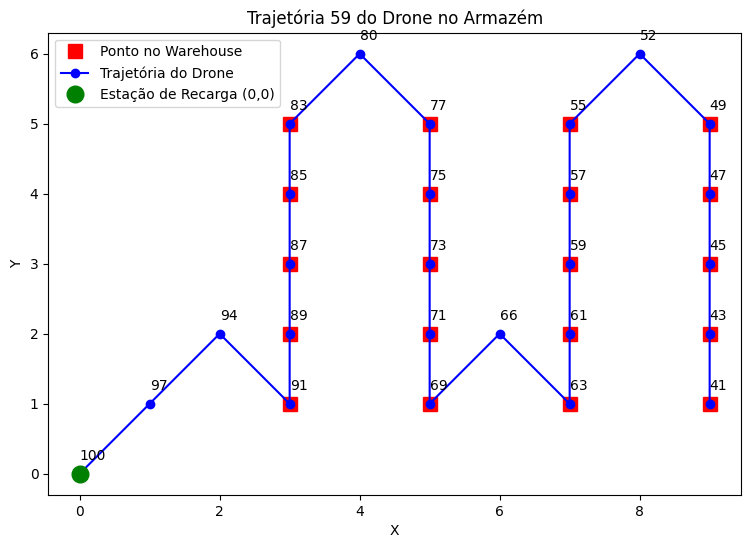


Trajetória 60:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 2), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 6), Bateria 80
Passo 9: Posição (5, 5), Bateria 77
Passo 10: Posição (5, 4), Bateria 75
Passo 11: Posição (5, 3), Bateria 73
Passo 12: Posição (5, 2), Bateria 71
Passo 13: Posição (5, 1), Bateria 69
Passo 14: Posição (6, 0), Bateria 66
Passo 15: Posição (7, 1), Bateria 63
Passo 16: Posição (7, 2), Bateria 61
Passo 17: Posição (7, 3), Bateria 59
Passo 18: Posição (7, 4), Bateria 57
Passo 19: Posição (7, 5), Bateria 55
Passo 20: Posição (8, 4), Bateria 52
Passo 21: Posição (9, 5), Bateria 49
Passo 22: Posição (9, 4), Bateria 47
Passo 23: Posição (9, 3), Bateria 45
Passo 24: Posição (9, 2), Bateria 43
Passo 25: Posição (9, 1), Bateria 41


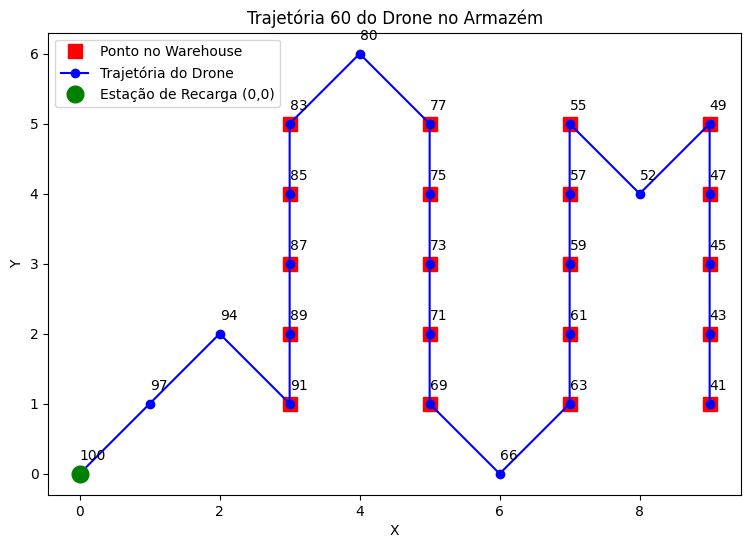


Trajetória 61:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 0), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 6), Bateria 80
Passo 9: Posição (5, 5), Bateria 77
Passo 10: Posição (5, 4), Bateria 75
Passo 11: Posição (5, 3), Bateria 73
Passo 12: Posição (5, 2), Bateria 71
Passo 13: Posição (5, 1), Bateria 69
Passo 14: Posição (6, 0), Bateria 66
Passo 15: Posição (7, 1), Bateria 63
Passo 16: Posição (7, 2), Bateria 61
Passo 17: Posição (7, 3), Bateria 59
Passo 18: Posição (7, 4), Bateria 57
Passo 19: Posição (7, 5), Bateria 55
Passo 20: Posição (8, 4), Bateria 52
Passo 21: Posição (9, 5), Bateria 49
Passo 22: Posição (9, 4), Bateria 47
Passo 23: Posição (9, 3), Bateria 45
Passo 24: Posição (9, 2), Bateria 43
Passo 25: Posição (9, 1), Bateria 41


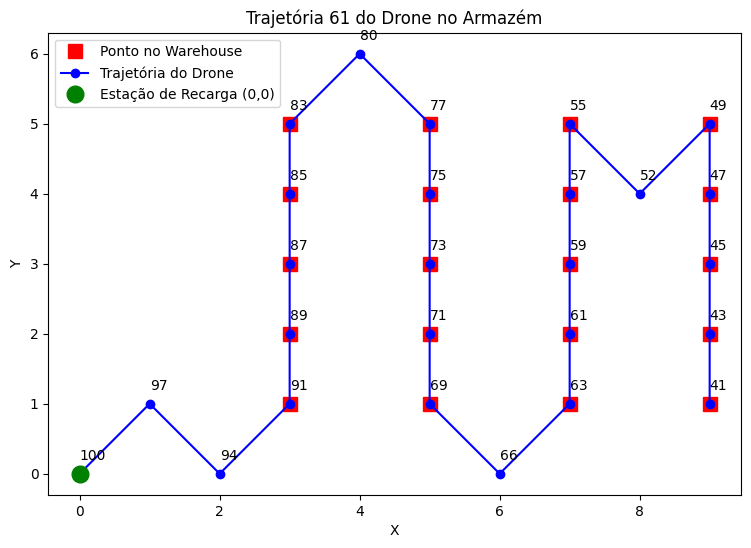


Trajetória 62:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 2), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 4), Bateria 80
Passo 9: Posição (5, 5), Bateria 77
Passo 10: Posição (5, 4), Bateria 75
Passo 11: Posição (5, 3), Bateria 73
Passo 12: Posição (5, 2), Bateria 71
Passo 13: Posição (5, 1), Bateria 69
Passo 14: Posição (6, 0), Bateria 66
Passo 15: Posição (7, 1), Bateria 63
Passo 16: Posição (7, 2), Bateria 61
Passo 17: Posição (7, 3), Bateria 59
Passo 18: Posição (7, 4), Bateria 57
Passo 19: Posição (7, 5), Bateria 55
Passo 20: Posição (8, 4), Bateria 52
Passo 21: Posição (9, 5), Bateria 49
Passo 22: Posição (9, 4), Bateria 47
Passo 23: Posição (9, 3), Bateria 45
Passo 24: Posição (9, 2), Bateria 43
Passo 25: Posição (9, 1), Bateria 41


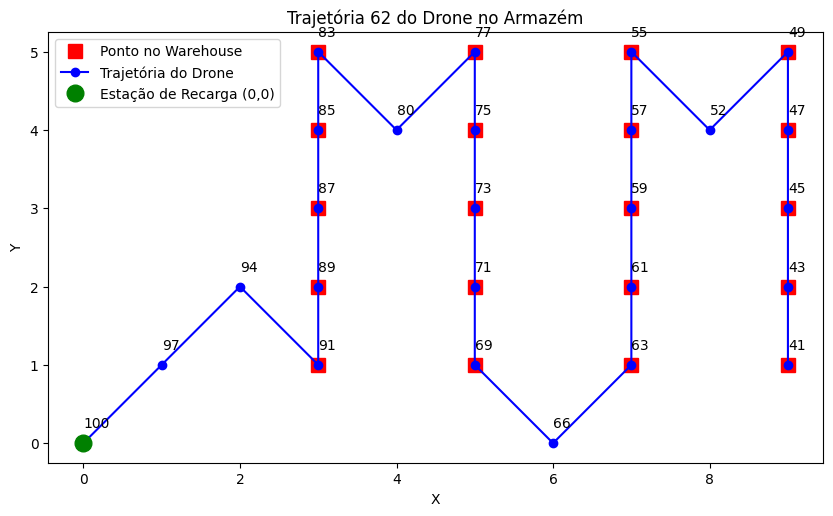


Trajetória 63:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 0), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 4), Bateria 80
Passo 9: Posição (5, 5), Bateria 77
Passo 10: Posição (5, 4), Bateria 75
Passo 11: Posição (5, 3), Bateria 73
Passo 12: Posição (5, 2), Bateria 71
Passo 13: Posição (5, 1), Bateria 69
Passo 14: Posição (6, 0), Bateria 66
Passo 15: Posição (7, 1), Bateria 63
Passo 16: Posição (7, 2), Bateria 61
Passo 17: Posição (7, 3), Bateria 59
Passo 18: Posição (7, 4), Bateria 57
Passo 19: Posição (7, 5), Bateria 55
Passo 20: Posição (8, 4), Bateria 52
Passo 21: Posição (9, 5), Bateria 49
Passo 22: Posição (9, 4), Bateria 47
Passo 23: Posição (9, 3), Bateria 45
Passo 24: Posição (9, 2), Bateria 43
Passo 25: Posição (9, 1), Bateria 41


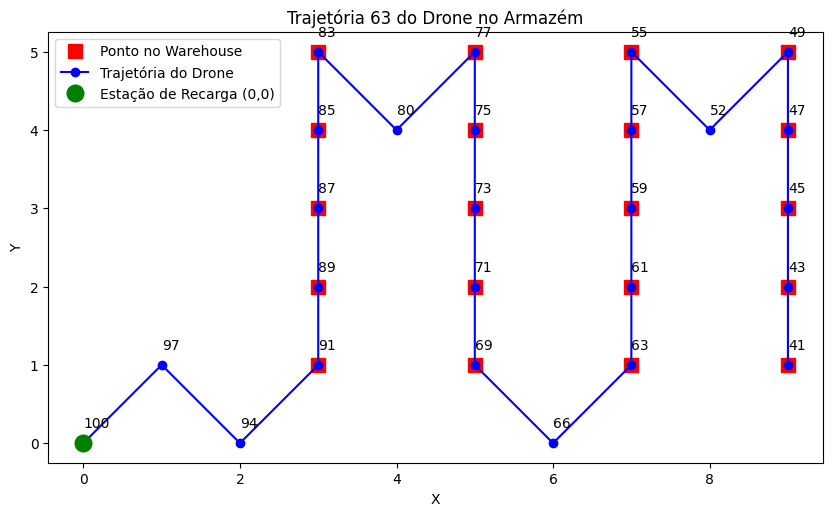


Trajetória 64:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 2), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 4), Bateria 80
Passo 9: Posição (5, 5), Bateria 77
Passo 10: Posição (5, 4), Bateria 75
Passo 11: Posição (5, 3), Bateria 73
Passo 12: Posição (5, 2), Bateria 71
Passo 13: Posição (5, 1), Bateria 69
Passo 14: Posição (6, 2), Bateria 66
Passo 15: Posição (7, 1), Bateria 63
Passo 16: Posição (7, 2), Bateria 61
Passo 17: Posição (7, 3), Bateria 59
Passo 18: Posição (7, 4), Bateria 57
Passo 19: Posição (7, 5), Bateria 55
Passo 20: Posição (8, 4), Bateria 52
Passo 21: Posição (9, 5), Bateria 49
Passo 22: Posição (9, 4), Bateria 47
Passo 23: Posição (9, 3), Bateria 45
Passo 24: Posição (9, 2), Bateria 43
Passo 25: Posição (9, 1), Bateria 41


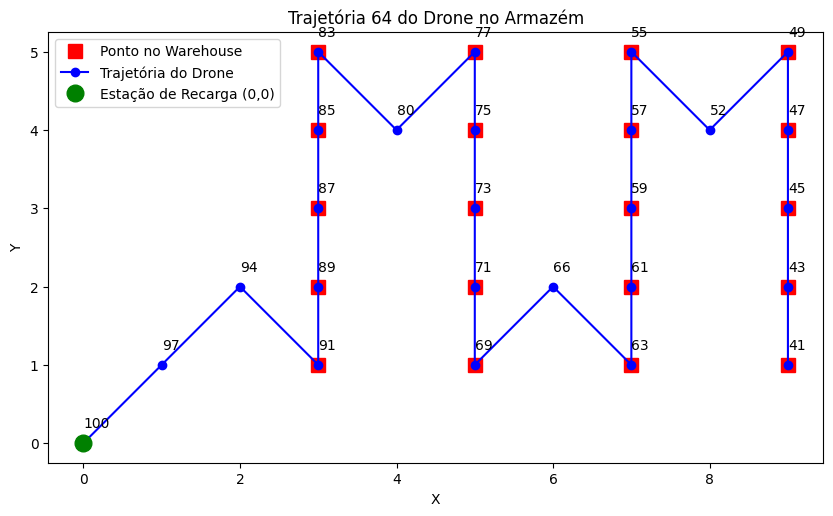


Trajetória 65:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 0), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 4), Bateria 80
Passo 9: Posição (5, 5), Bateria 77
Passo 10: Posição (5, 4), Bateria 75
Passo 11: Posição (5, 3), Bateria 73
Passo 12: Posição (5, 2), Bateria 71
Passo 13: Posição (5, 1), Bateria 69
Passo 14: Posição (6, 2), Bateria 66
Passo 15: Posição (7, 1), Bateria 63
Passo 16: Posição (7, 2), Bateria 61
Passo 17: Posição (7, 3), Bateria 59
Passo 18: Posição (7, 4), Bateria 57
Passo 19: Posição (7, 5), Bateria 55
Passo 20: Posição (8, 4), Bateria 52
Passo 21: Posição (9, 5), Bateria 49
Passo 22: Posição (9, 4), Bateria 47
Passo 23: Posição (9, 3), Bateria 45
Passo 24: Posição (9, 2), Bateria 43
Passo 25: Posição (9, 1), Bateria 41


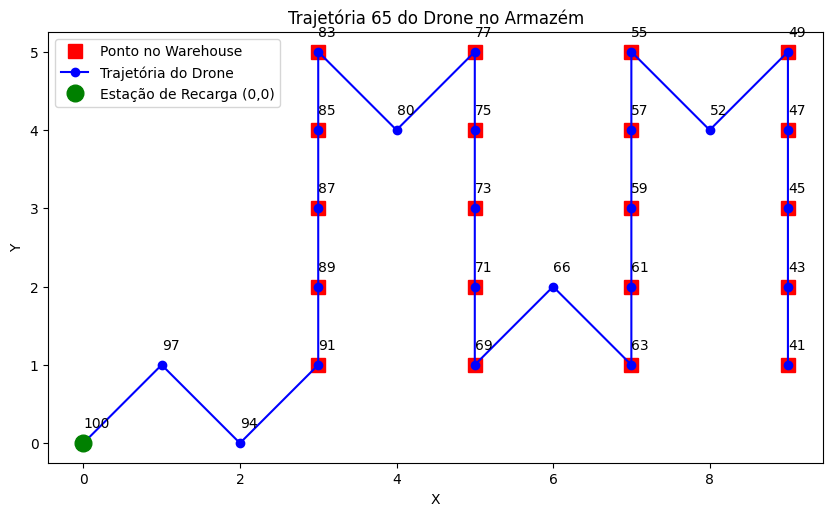


Trajetória 66:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 2), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 4), Bateria 80
Passo 9: Posição (5, 5), Bateria 77
Passo 10: Posição (5, 4), Bateria 75
Passo 11: Posição (5, 3), Bateria 73
Passo 12: Posição (5, 2), Bateria 71
Passo 13: Posição (5, 1), Bateria 69
Passo 14: Posição (6, 0), Bateria 66
Passo 15: Posição (7, 1), Bateria 63
Passo 16: Posição (7, 2), Bateria 61
Passo 17: Posição (7, 3), Bateria 59
Passo 18: Posição (7, 4), Bateria 57
Passo 19: Posição (7, 5), Bateria 55
Passo 20: Posição (8, 6), Bateria 52
Passo 21: Posição (9, 5), Bateria 49
Passo 22: Posição (9, 4), Bateria 47
Passo 23: Posição (9, 3), Bateria 45
Passo 24: Posição (9, 2), Bateria 43
Passo 25: Posição (9, 1), Bateria 41


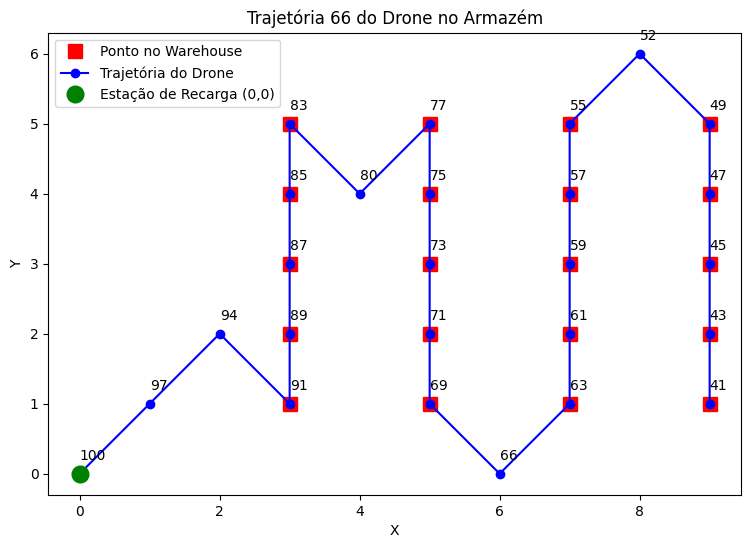


Trajetória 67:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 2), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 4), Bateria 80
Passo 9: Posição (5, 5), Bateria 77
Passo 10: Posição (5, 4), Bateria 75
Passo 11: Posição (5, 3), Bateria 73
Passo 12: Posição (5, 2), Bateria 71
Passo 13: Posição (5, 1), Bateria 69
Passo 14: Posição (6, 2), Bateria 66
Passo 15: Posição (7, 1), Bateria 63
Passo 16: Posição (7, 2), Bateria 61
Passo 17: Posição (7, 3), Bateria 59
Passo 18: Posição (7, 4), Bateria 57
Passo 19: Posição (7, 5), Bateria 55
Passo 20: Posição (8, 6), Bateria 52
Passo 21: Posição (9, 5), Bateria 49
Passo 22: Posição (9, 4), Bateria 47
Passo 23: Posição (9, 3), Bateria 45
Passo 24: Posição (9, 2), Bateria 43
Passo 25: Posição (9, 1), Bateria 41


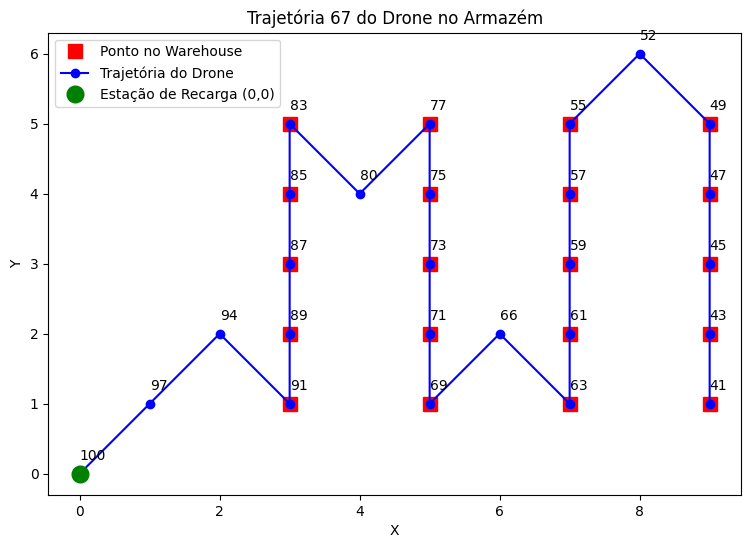


Trajetória 68:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 0), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 4), Bateria 80
Passo 9: Posição (5, 5), Bateria 77
Passo 10: Posição (5, 4), Bateria 75
Passo 11: Posição (5, 3), Bateria 73
Passo 12: Posição (5, 2), Bateria 71
Passo 13: Posição (5, 1), Bateria 69
Passo 14: Posição (6, 0), Bateria 66
Passo 15: Posição (7, 1), Bateria 63
Passo 16: Posição (7, 2), Bateria 61
Passo 17: Posição (7, 3), Bateria 59
Passo 18: Posição (7, 4), Bateria 57
Passo 19: Posição (7, 5), Bateria 55
Passo 20: Posição (8, 6), Bateria 52
Passo 21: Posição (9, 5), Bateria 49
Passo 22: Posição (9, 4), Bateria 47
Passo 23: Posição (9, 3), Bateria 45
Passo 24: Posição (9, 2), Bateria 43
Passo 25: Posição (9, 1), Bateria 41


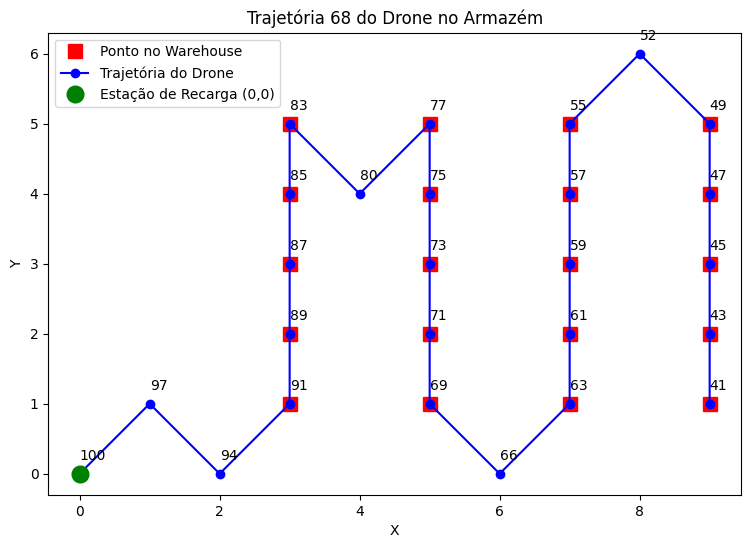


Trajetória 69:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 0), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 4), Bateria 80
Passo 9: Posição (5, 5), Bateria 77
Passo 10: Posição (5, 4), Bateria 75
Passo 11: Posição (5, 3), Bateria 73
Passo 12: Posição (5, 2), Bateria 71
Passo 13: Posição (5, 1), Bateria 69
Passo 14: Posição (6, 2), Bateria 66
Passo 15: Posição (7, 1), Bateria 63
Passo 16: Posição (7, 2), Bateria 61
Passo 17: Posição (7, 3), Bateria 59
Passo 18: Posição (7, 4), Bateria 57
Passo 19: Posição (7, 5), Bateria 55
Passo 20: Posição (8, 6), Bateria 52
Passo 21: Posição (9, 5), Bateria 49
Passo 22: Posição (9, 4), Bateria 47
Passo 23: Posição (9, 3), Bateria 45
Passo 24: Posição (9, 2), Bateria 43
Passo 25: Posição (9, 1), Bateria 41


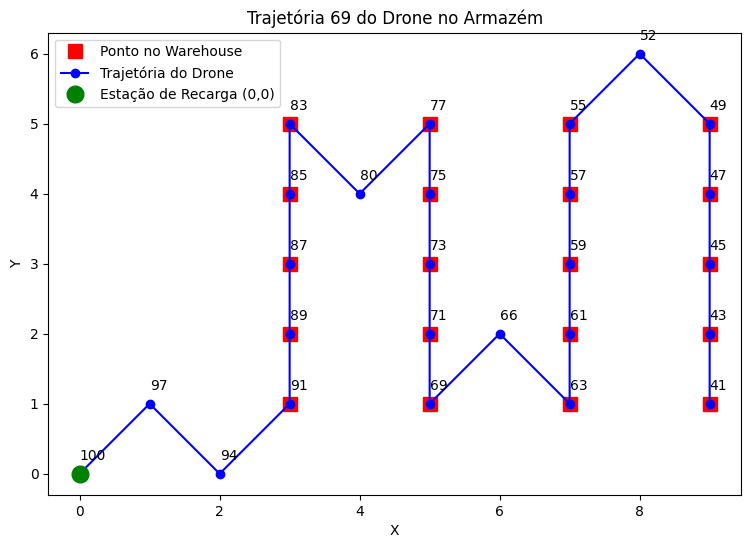


Trajetória 70:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 0), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 4), Bateria 80
Passo 9: Posição (5, 5), Bateria 77
Passo 10: Posição (5, 4), Bateria 75
Passo 11: Posição (5, 3), Bateria 73
Passo 12: Posição (5, 2), Bateria 71
Passo 13: Posição (5, 1), Bateria 69
Passo 14: Posição (6, 1), Bateria 67
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 6), Bateria 54
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


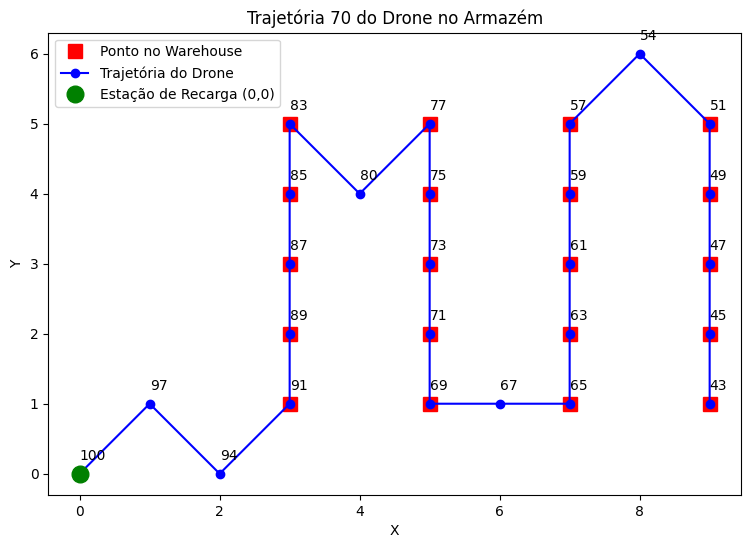


Trajetória 71:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 0), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 6), Bateria 80
Passo 9: Posição (5, 5), Bateria 77
Passo 10: Posição (5, 4), Bateria 75
Passo 11: Posição (5, 3), Bateria 73
Passo 12: Posição (5, 2), Bateria 71
Passo 13: Posição (5, 1), Bateria 69
Passo 14: Posição (6, 1), Bateria 67
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 6), Bateria 54
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


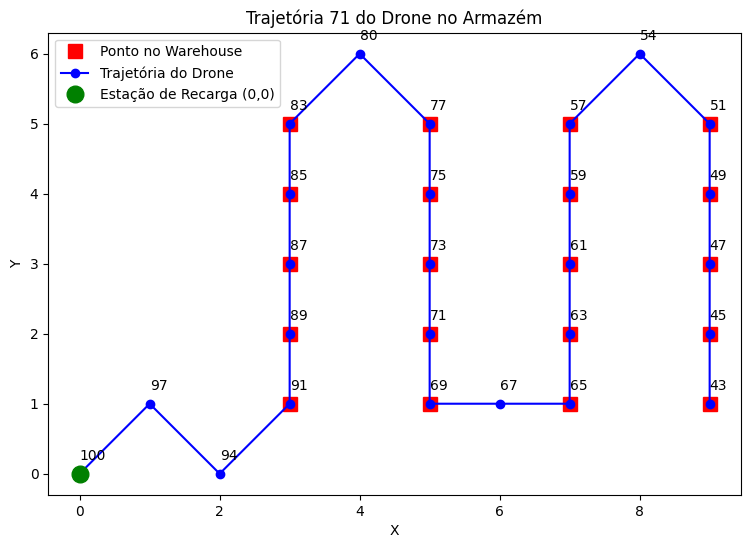


Trajetória 72:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 0), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 4), Bateria 80
Passo 9: Posição (5, 5), Bateria 77
Passo 10: Posição (5, 4), Bateria 75
Passo 11: Posição (5, 3), Bateria 73
Passo 12: Posição (5, 2), Bateria 71
Passo 13: Posição (5, 1), Bateria 69
Passo 14: Posição (6, 1), Bateria 67
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 4), Bateria 54
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


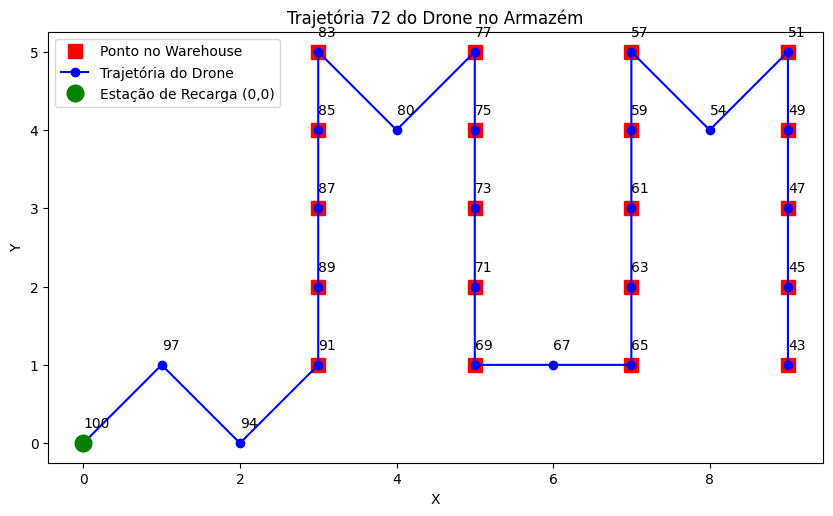


Trajetória 73:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 0), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 6), Bateria 80
Passo 9: Posição (5, 5), Bateria 77
Passo 10: Posição (5, 4), Bateria 75
Passo 11: Posição (5, 3), Bateria 73
Passo 12: Posição (5, 2), Bateria 71
Passo 13: Posição (5, 1), Bateria 69
Passo 14: Posição (6, 1), Bateria 67
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 4), Bateria 54
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


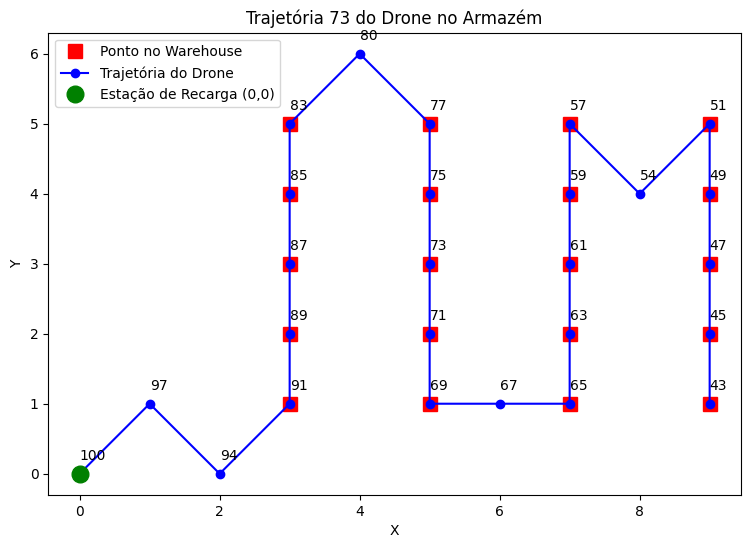


Trajetória 74:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 2), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 4), Bateria 80
Passo 9: Posição (5, 5), Bateria 77
Passo 10: Posição (5, 4), Bateria 75
Passo 11: Posição (5, 3), Bateria 73
Passo 12: Posição (5, 2), Bateria 71
Passo 13: Posição (5, 1), Bateria 69
Passo 14: Posição (6, 1), Bateria 67
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 4), Bateria 54
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


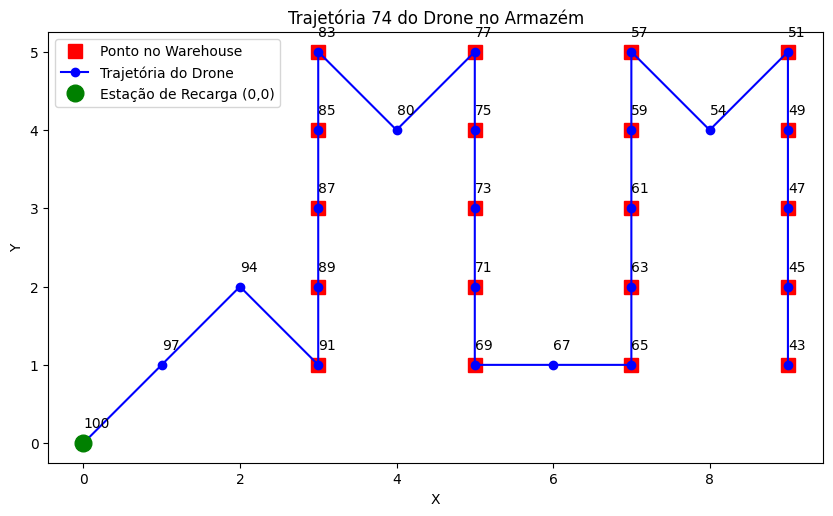


Trajetória 75:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 2), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 6), Bateria 80
Passo 9: Posição (5, 5), Bateria 77
Passo 10: Posição (5, 4), Bateria 75
Passo 11: Posição (5, 3), Bateria 73
Passo 12: Posição (5, 2), Bateria 71
Passo 13: Posição (5, 1), Bateria 69
Passo 14: Posição (6, 1), Bateria 67
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 4), Bateria 54
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


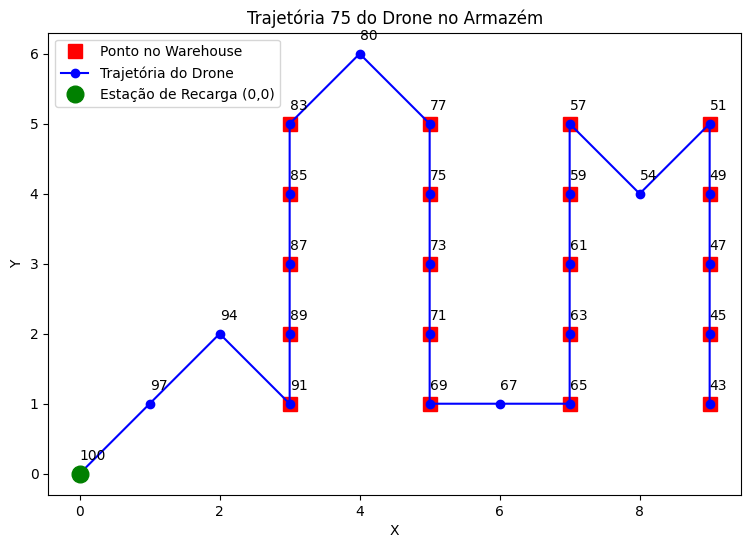


Trajetória 76:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 2), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 4), Bateria 80
Passo 9: Posição (5, 5), Bateria 77
Passo 10: Posição (5, 4), Bateria 75
Passo 11: Posição (5, 3), Bateria 73
Passo 12: Posição (5, 2), Bateria 71
Passo 13: Posição (5, 1), Bateria 69
Passo 14: Posição (6, 1), Bateria 67
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 6), Bateria 54
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


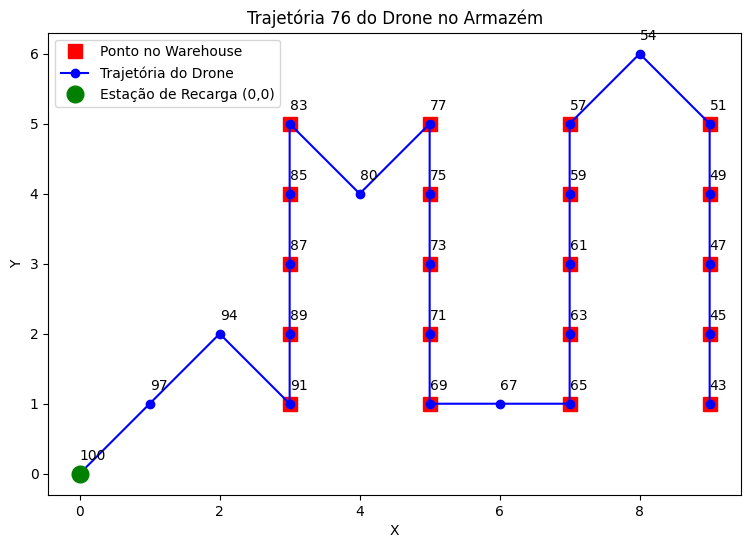


Trajetória 77:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 2), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 6), Bateria 80
Passo 9: Posição (5, 5), Bateria 77
Passo 10: Posição (5, 4), Bateria 75
Passo 11: Posição (5, 3), Bateria 73
Passo 12: Posição (5, 2), Bateria 71
Passo 13: Posição (5, 1), Bateria 69
Passo 14: Posição (6, 1), Bateria 67
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 6), Bateria 54
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


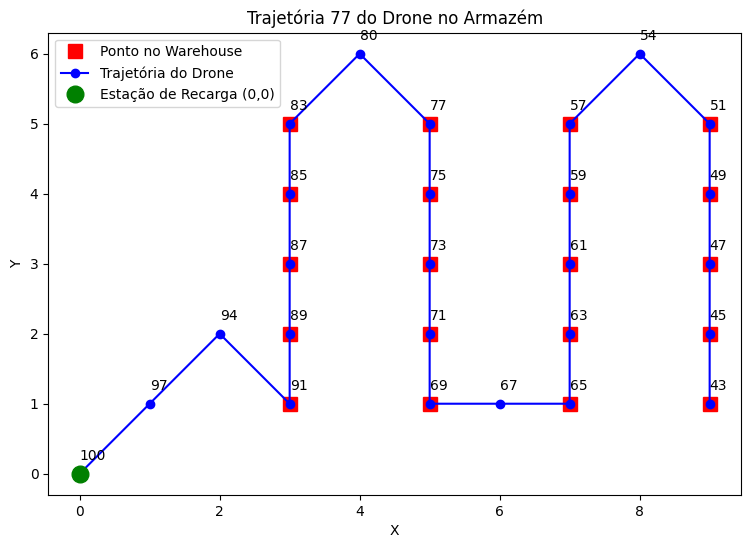


Trajetória 78:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 4), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 1), Bateria 69
Passo 15: Posição (7, 1), Bateria 67
Passo 16: Posição (7, 2), Bateria 65
Passo 17: Posição (7, 3), Bateria 63
Passo 18: Posição (7, 4), Bateria 61
Passo 19: Posição (7, 5), Bateria 59
Passo 20: Posição (8, 6), Bateria 56
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


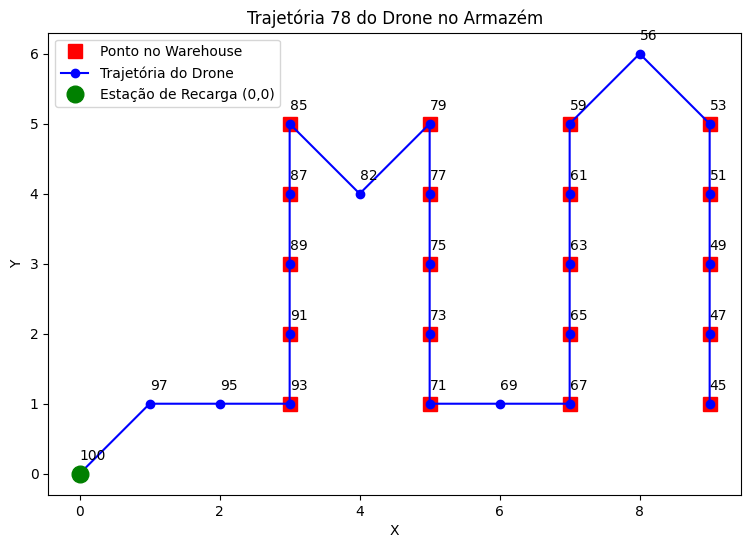


Trajetória 79:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 4), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 1), Bateria 69
Passo 15: Posição (7, 1), Bateria 67
Passo 16: Posição (7, 2), Bateria 65
Passo 17: Posição (7, 3), Bateria 63
Passo 18: Posição (7, 4), Bateria 61
Passo 19: Posição (7, 5), Bateria 59
Passo 20: Posição (8, 4), Bateria 56
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


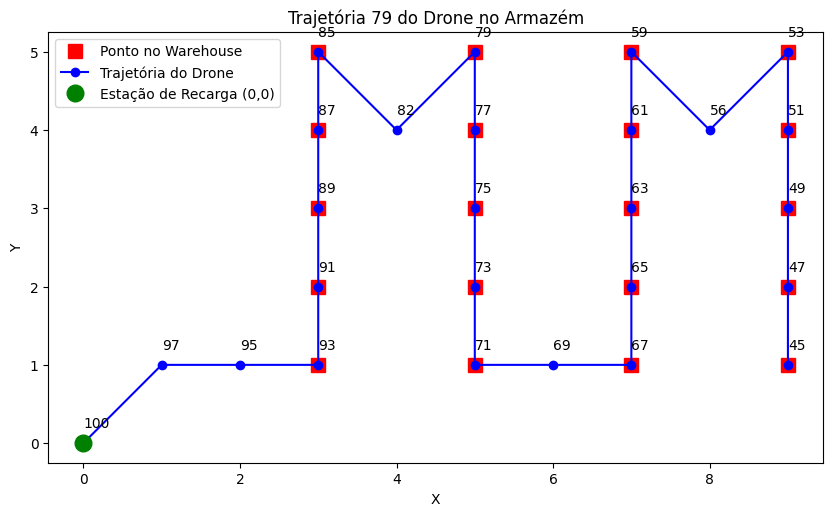


Trajetória 80:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 6), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 1), Bateria 69
Passo 15: Posição (7, 1), Bateria 67
Passo 16: Posição (7, 2), Bateria 65
Passo 17: Posição (7, 3), Bateria 63
Passo 18: Posição (7, 4), Bateria 61
Passo 19: Posição (7, 5), Bateria 59
Passo 20: Posição (8, 6), Bateria 56
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


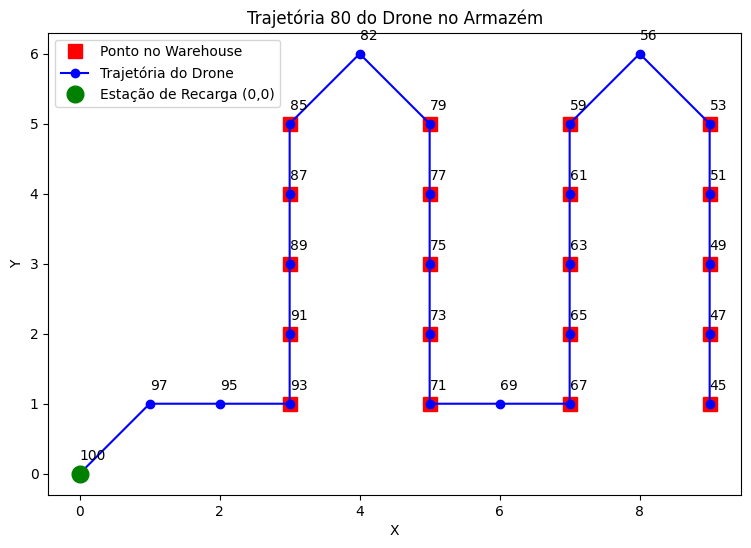


Trajetória 81:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 6), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 1), Bateria 69
Passo 15: Posição (7, 1), Bateria 67
Passo 16: Posição (7, 2), Bateria 65
Passo 17: Posição (7, 3), Bateria 63
Passo 18: Posição (7, 4), Bateria 61
Passo 19: Posição (7, 5), Bateria 59
Passo 20: Posição (8, 4), Bateria 56
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


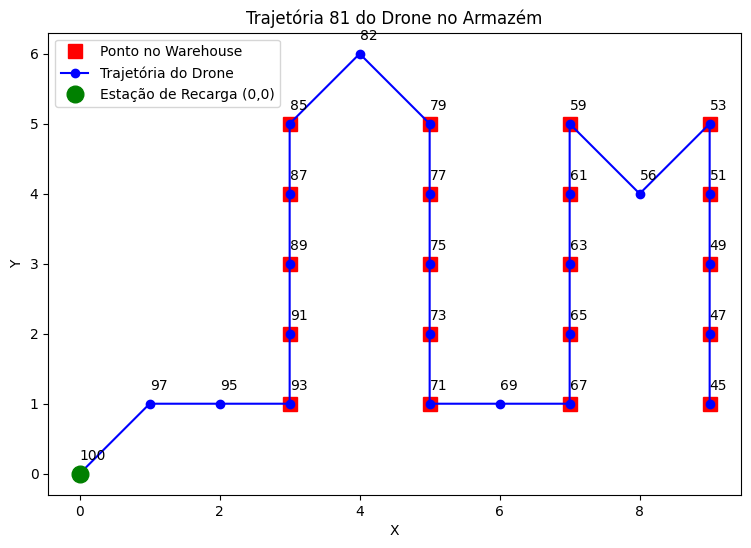


Trajetória 82:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 5), Bateria 83
Passo 9: Posição (5, 5), Bateria 81
Passo 10: Posição (5, 4), Bateria 79
Passo 11: Posição (5, 3), Bateria 77
Passo 12: Posição (5, 2), Bateria 75
Passo 13: Posição (5, 1), Bateria 73
Passo 14: Posição (6, 0), Bateria 70
Passo 15: Posição (7, 1), Bateria 67
Passo 16: Posição (7, 2), Bateria 65
Passo 17: Posição (7, 3), Bateria 63
Passo 18: Posição (7, 4), Bateria 61
Passo 19: Posição (7, 5), Bateria 59
Passo 20: Posição (8, 6), Bateria 56
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


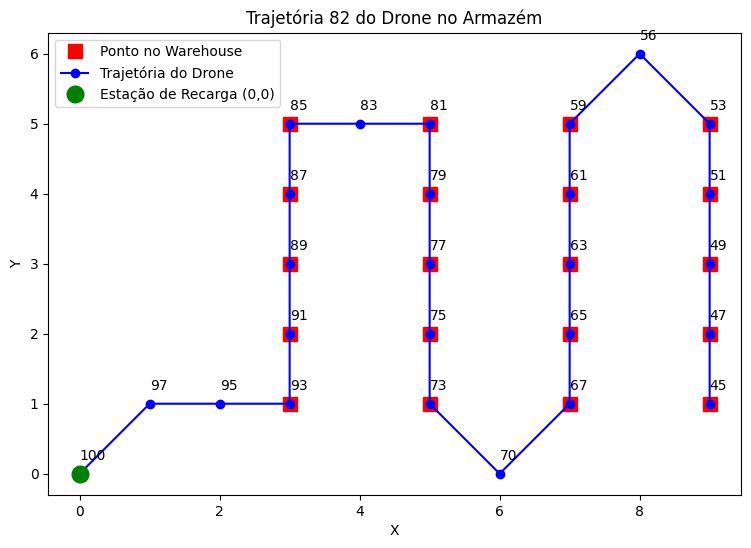


Trajetória 83:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 5), Bateria 83
Passo 9: Posição (5, 5), Bateria 81
Passo 10: Posição (5, 4), Bateria 79
Passo 11: Posição (5, 3), Bateria 77
Passo 12: Posição (5, 2), Bateria 75
Passo 13: Posição (5, 1), Bateria 73
Passo 14: Posição (6, 2), Bateria 70
Passo 15: Posição (7, 1), Bateria 67
Passo 16: Posição (7, 2), Bateria 65
Passo 17: Posição (7, 3), Bateria 63
Passo 18: Posição (7, 4), Bateria 61
Passo 19: Posição (7, 5), Bateria 59
Passo 20: Posição (8, 6), Bateria 56
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


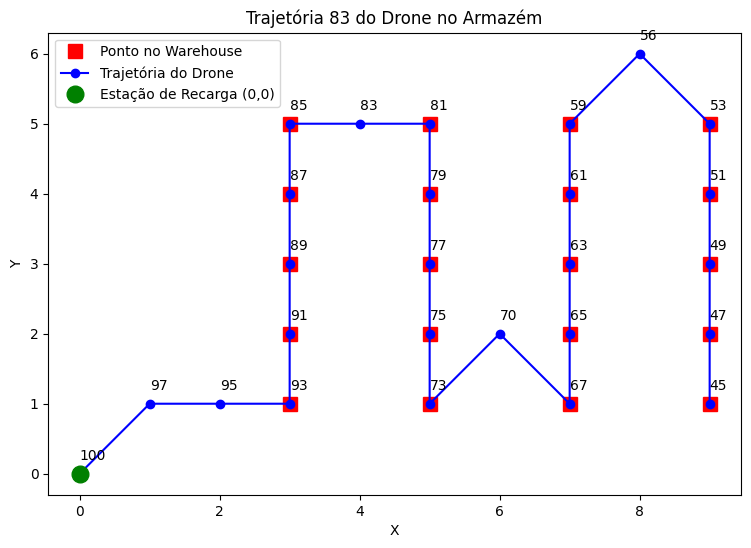


Trajetória 84:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 5), Bateria 83
Passo 9: Posição (5, 5), Bateria 81
Passo 10: Posição (5, 4), Bateria 79
Passo 11: Posição (5, 3), Bateria 77
Passo 12: Posição (5, 2), Bateria 75
Passo 13: Posição (5, 1), Bateria 73
Passo 14: Posição (6, 0), Bateria 70
Passo 15: Posição (7, 1), Bateria 67
Passo 16: Posição (7, 2), Bateria 65
Passo 17: Posição (7, 3), Bateria 63
Passo 18: Posição (7, 4), Bateria 61
Passo 19: Posição (7, 5), Bateria 59
Passo 20: Posição (8, 4), Bateria 56
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


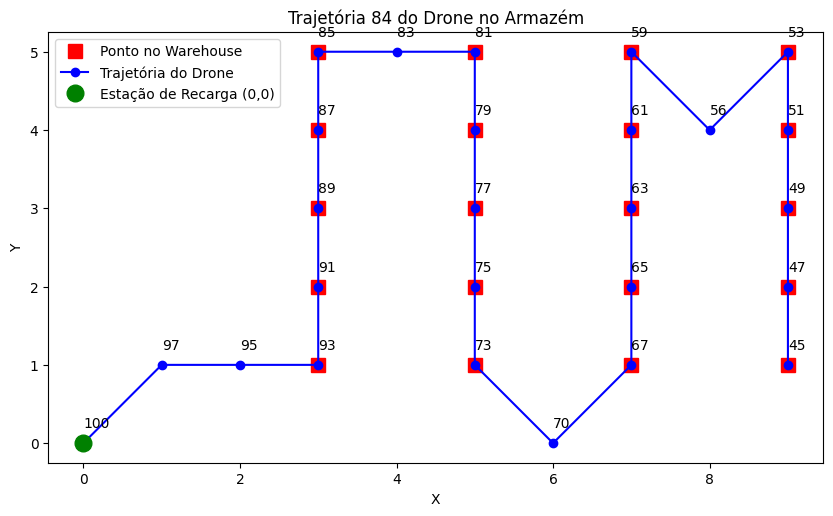


Trajetória 85:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 5), Bateria 83
Passo 9: Posição (5, 5), Bateria 81
Passo 10: Posição (5, 4), Bateria 79
Passo 11: Posição (5, 3), Bateria 77
Passo 12: Posição (5, 2), Bateria 75
Passo 13: Posição (5, 1), Bateria 73
Passo 14: Posição (6, 2), Bateria 70
Passo 15: Posição (7, 1), Bateria 67
Passo 16: Posição (7, 2), Bateria 65
Passo 17: Posição (7, 3), Bateria 63
Passo 18: Posição (7, 4), Bateria 61
Passo 19: Posição (7, 5), Bateria 59
Passo 20: Posição (8, 4), Bateria 56
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


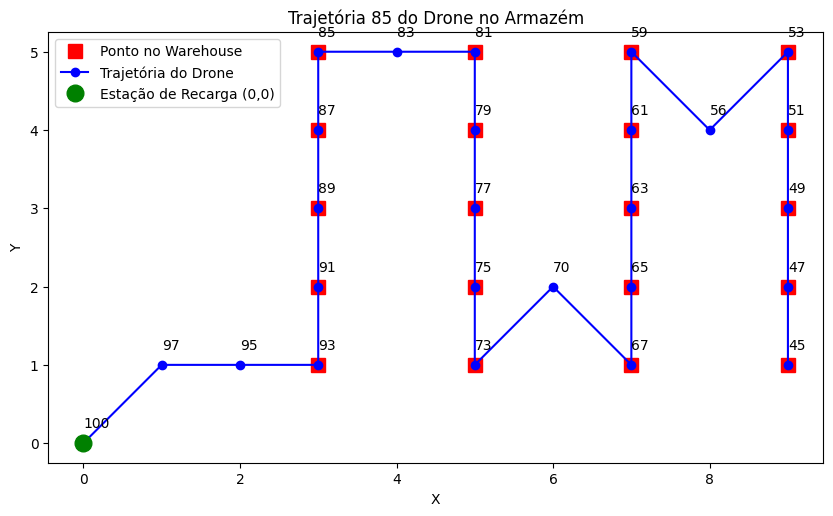


Trajetória 86:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 5), Bateria 83
Passo 9: Posição (5, 5), Bateria 81
Passo 10: Posição (5, 4), Bateria 79
Passo 11: Posição (5, 3), Bateria 77
Passo 12: Posição (5, 2), Bateria 75
Passo 13: Posição (5, 1), Bateria 73
Passo 14: Posição (6, 1), Bateria 71
Passo 15: Posição (7, 1), Bateria 69
Passo 16: Posição (7, 2), Bateria 67
Passo 17: Posição (7, 3), Bateria 65
Passo 18: Posição (7, 4), Bateria 63
Passo 19: Posição (7, 5), Bateria 61
Passo 20: Posição (8, 4), Bateria 58
Passo 21: Posição (9, 5), Bateria 55
Passo 22: Posição (9, 4), Bateria 53
Passo 23: Posição (9, 3), Bateria 51
Passo 24: Posição (9, 2), Bateria 49
Passo 25: Posição (9, 1), Bateria 47


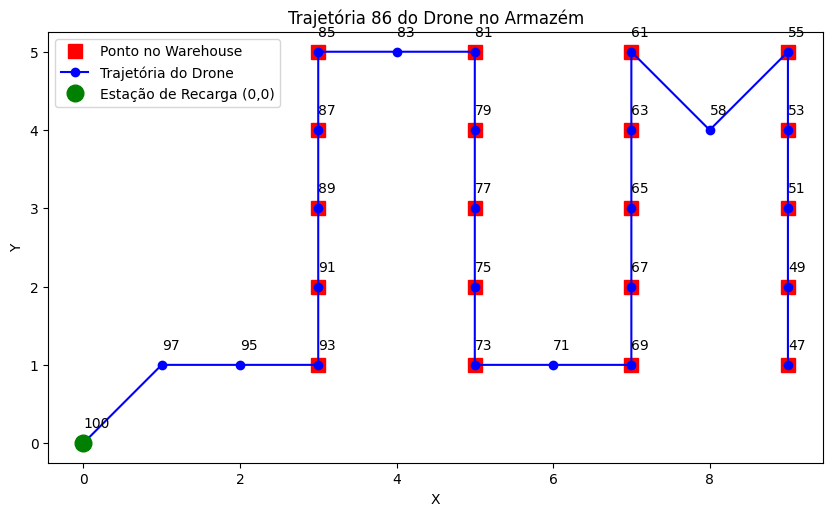


Trajetória 87:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 5), Bateria 83
Passo 9: Posição (5, 5), Bateria 81
Passo 10: Posição (5, 4), Bateria 79
Passo 11: Posição (5, 3), Bateria 77
Passo 12: Posição (5, 2), Bateria 75
Passo 13: Posição (5, 1), Bateria 73
Passo 14: Posição (6, 1), Bateria 71
Passo 15: Posição (7, 1), Bateria 69
Passo 16: Posição (7, 2), Bateria 67
Passo 17: Posição (7, 3), Bateria 65
Passo 18: Posição (7, 4), Bateria 63
Passo 19: Posição (7, 5), Bateria 61
Passo 20: Posição (8, 6), Bateria 58
Passo 21: Posição (9, 5), Bateria 55
Passo 22: Posição (9, 4), Bateria 53
Passo 23: Posição (9, 3), Bateria 51
Passo 24: Posição (9, 2), Bateria 49
Passo 25: Posição (9, 1), Bateria 47


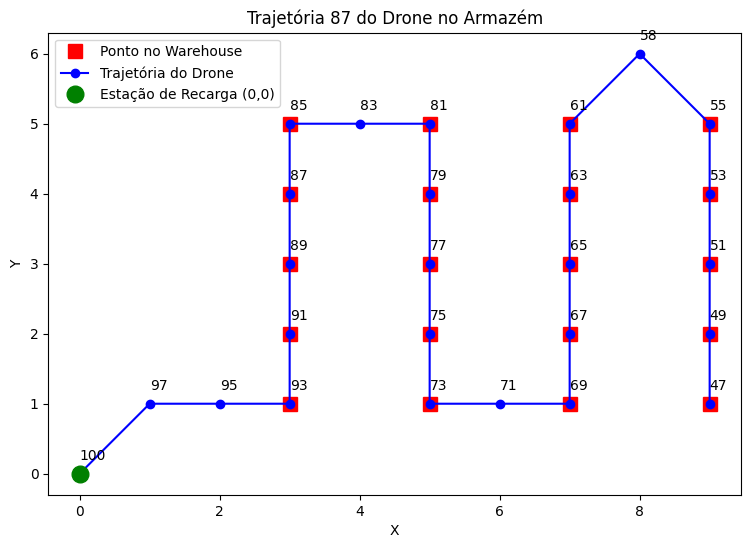


Trajetória 88:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 2), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 5), Bateria 81
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 0), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 6), Bateria 54
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


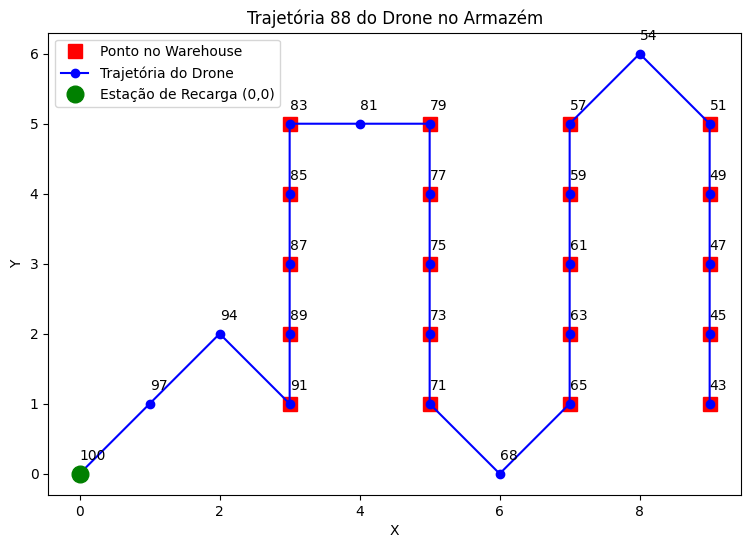


Trajetória 89:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 0), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 5), Bateria 81
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 0), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 6), Bateria 54
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


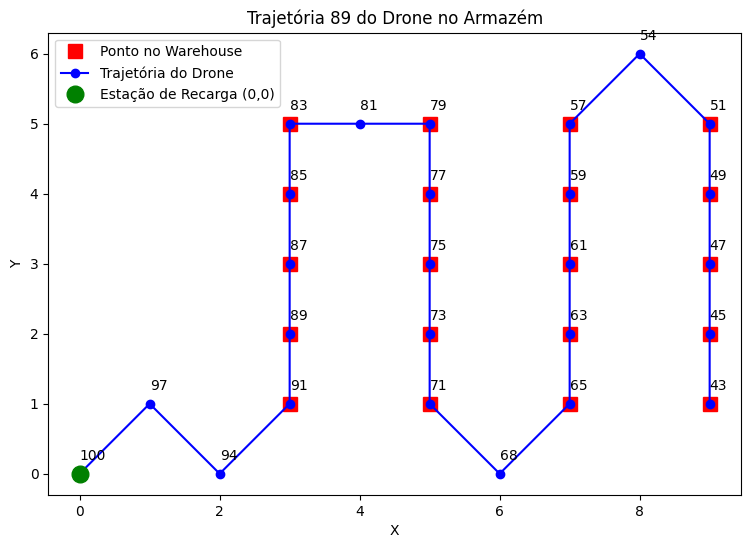


Trajetória 90:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 2), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 5), Bateria 81
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 2), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 6), Bateria 54
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


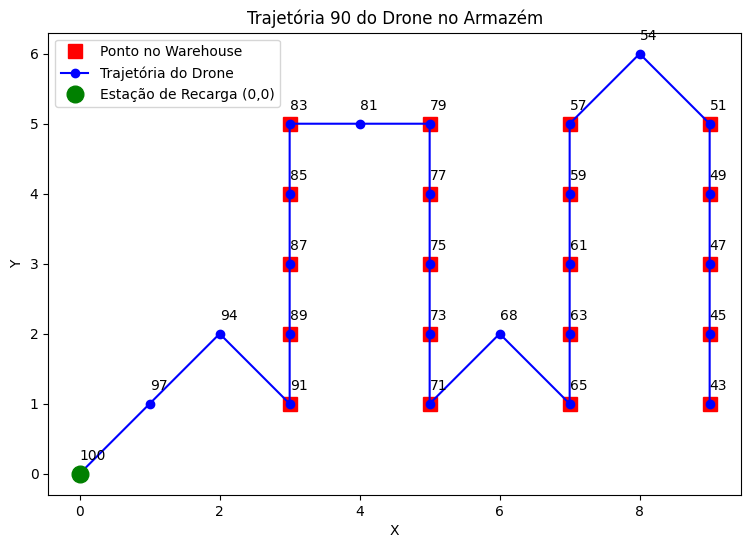


Trajetória 91:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 0), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 5), Bateria 81
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 2), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 6), Bateria 54
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


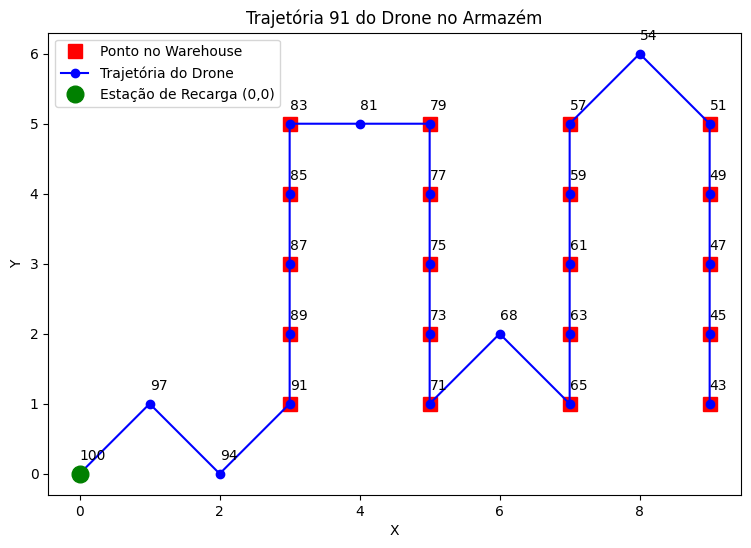


Trajetória 92:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 2), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 5), Bateria 81
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 1), Bateria 69
Passo 15: Posição (7, 1), Bateria 67
Passo 16: Posição (7, 2), Bateria 65
Passo 17: Posição (7, 3), Bateria 63
Passo 18: Posição (7, 4), Bateria 61
Passo 19: Posição (7, 5), Bateria 59
Passo 20: Posição (8, 6), Bateria 56
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


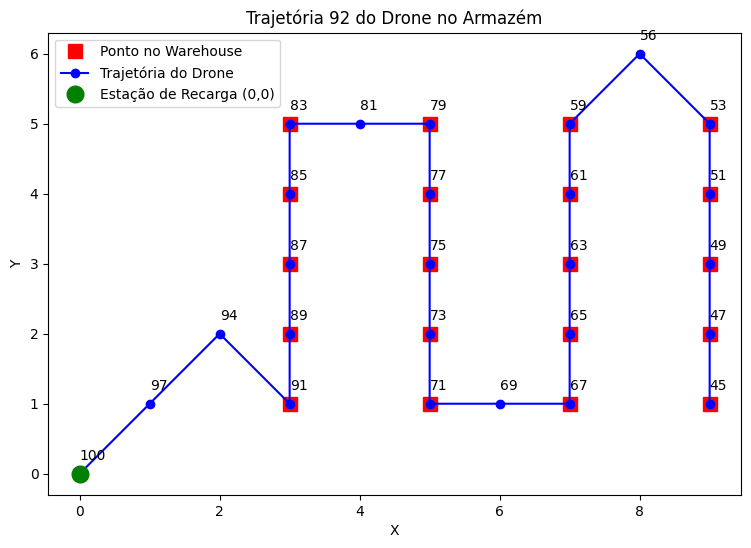


Trajetória 93:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 0), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 5), Bateria 81
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 1), Bateria 69
Passo 15: Posição (7, 1), Bateria 67
Passo 16: Posição (7, 2), Bateria 65
Passo 17: Posição (7, 3), Bateria 63
Passo 18: Posição (7, 4), Bateria 61
Passo 19: Posição (7, 5), Bateria 59
Passo 20: Posição (8, 6), Bateria 56
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


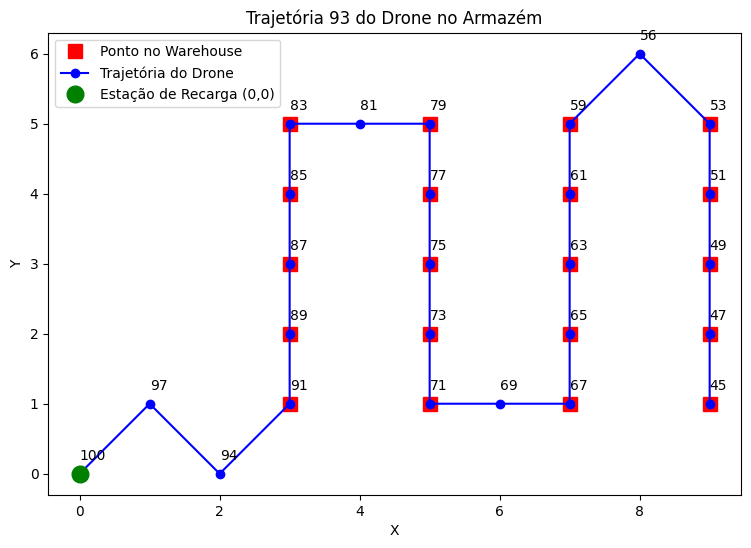


Trajetória 94:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 2), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 5), Bateria 81
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 2), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 4), Bateria 54
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


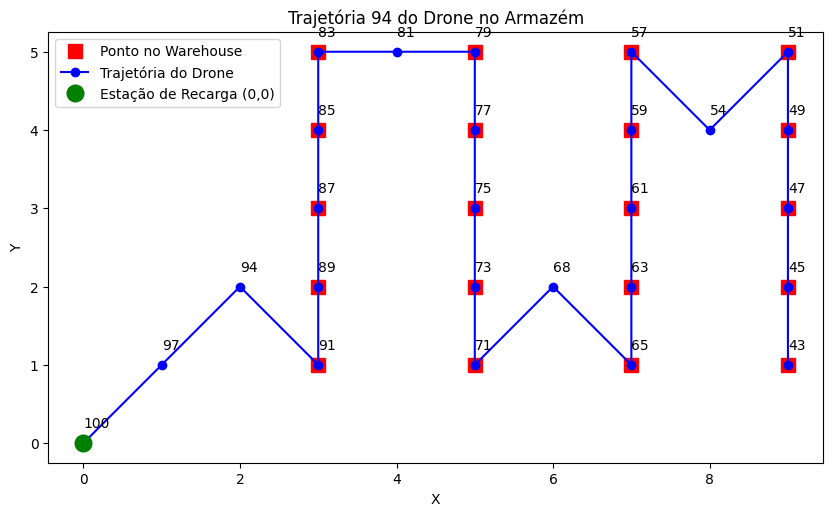


Trajetória 95:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 2), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 5), Bateria 81
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 0), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 4), Bateria 54
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


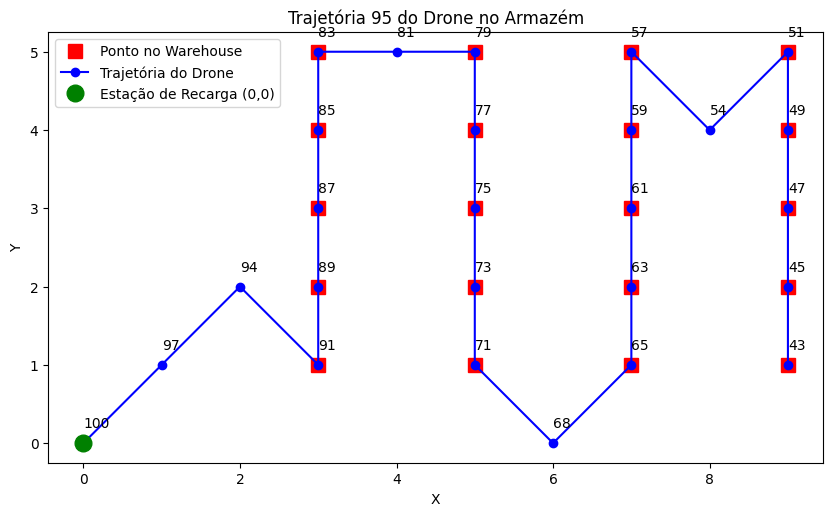


Trajetória 96:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 0), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 5), Bateria 81
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 2), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 4), Bateria 54
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


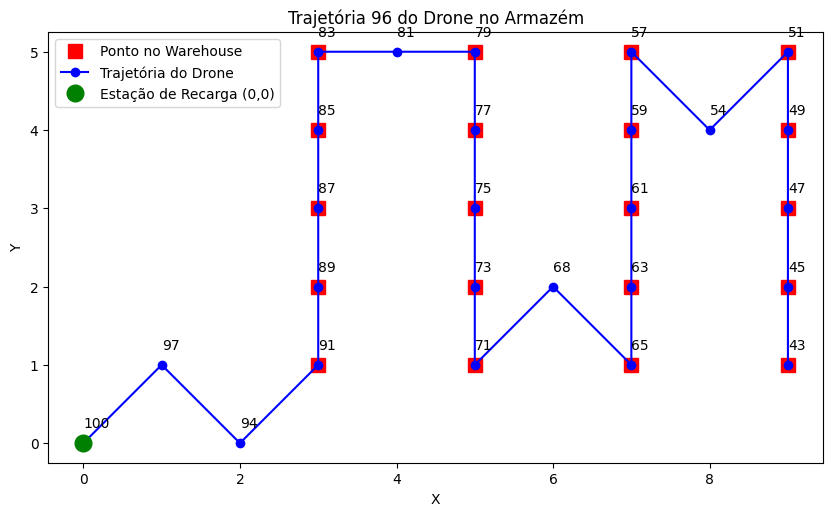


Trajetória 97:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 0), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 5), Bateria 81
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 0), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 4), Bateria 54
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


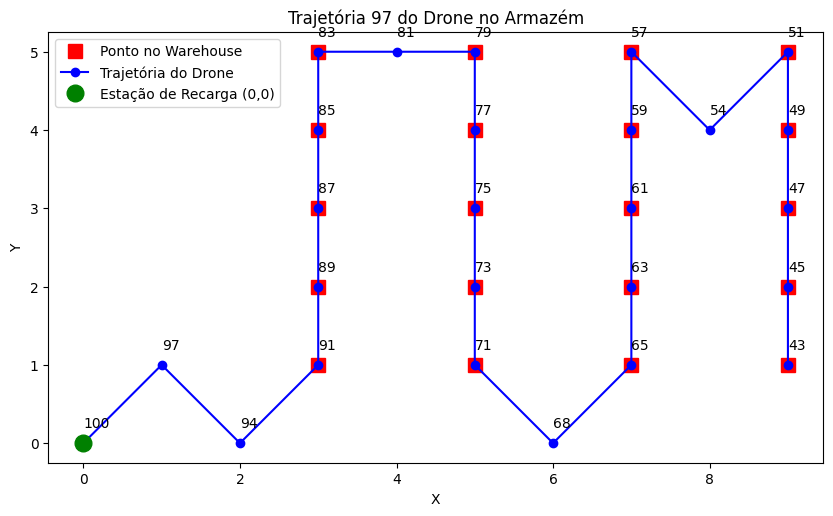


Trajetória 98:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 0), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 5), Bateria 81
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 1), Bateria 69
Passo 15: Posição (7, 1), Bateria 67
Passo 16: Posição (7, 2), Bateria 65
Passo 17: Posição (7, 3), Bateria 63
Passo 18: Posição (7, 4), Bateria 61
Passo 19: Posição (7, 5), Bateria 59
Passo 20: Posição (8, 4), Bateria 56
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


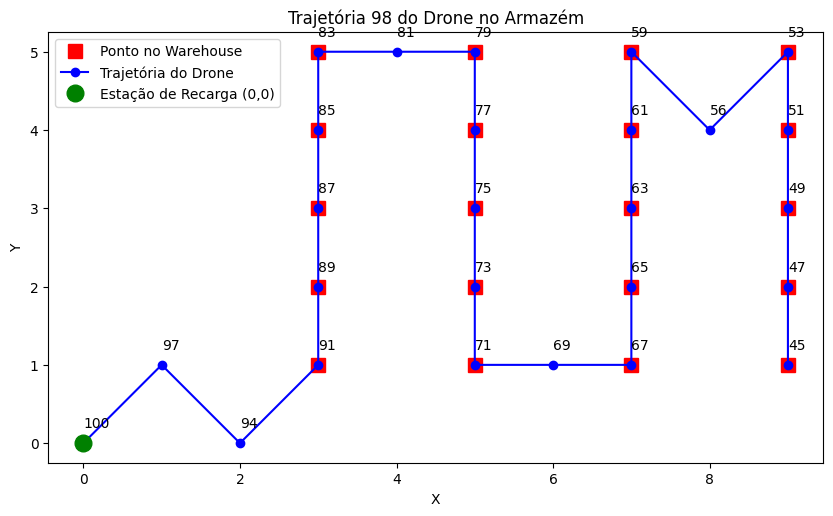


Trajetória 99:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 1), Bateria 97
Passo 2: Posição (2, 2), Bateria 94
Passo 3: Posição (3, 1), Bateria 91
Passo 4: Posição (3, 2), Bateria 89
Passo 5: Posição (3, 3), Bateria 87
Passo 6: Posição (3, 4), Bateria 85
Passo 7: Posição (3, 5), Bateria 83
Passo 8: Posição (4, 5), Bateria 81
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 1), Bateria 69
Passo 15: Posição (7, 1), Bateria 67
Passo 16: Posição (7, 2), Bateria 65
Passo 17: Posição (7, 3), Bateria 63
Passo 18: Posição (7, 4), Bateria 61
Passo 19: Posição (7, 5), Bateria 59
Passo 20: Posição (8, 4), Bateria 56
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


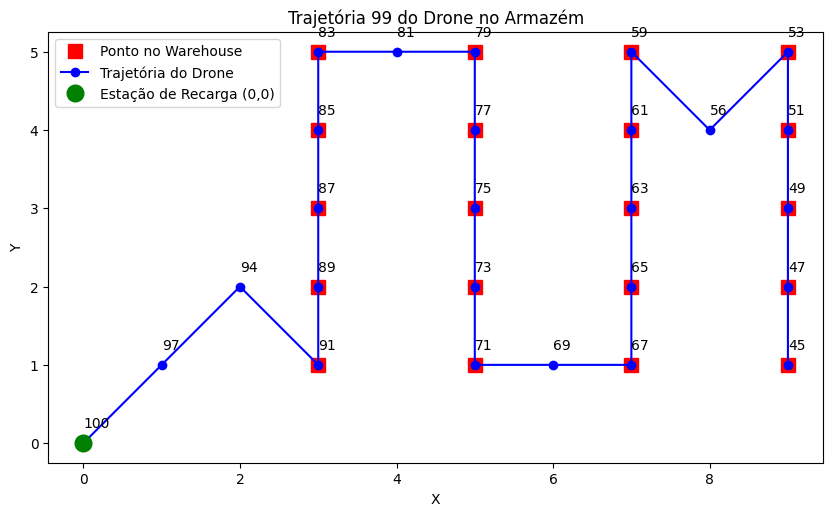


Trajetória 100:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 0), Bateria 96
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 6), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 2), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 4), Bateria 54
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


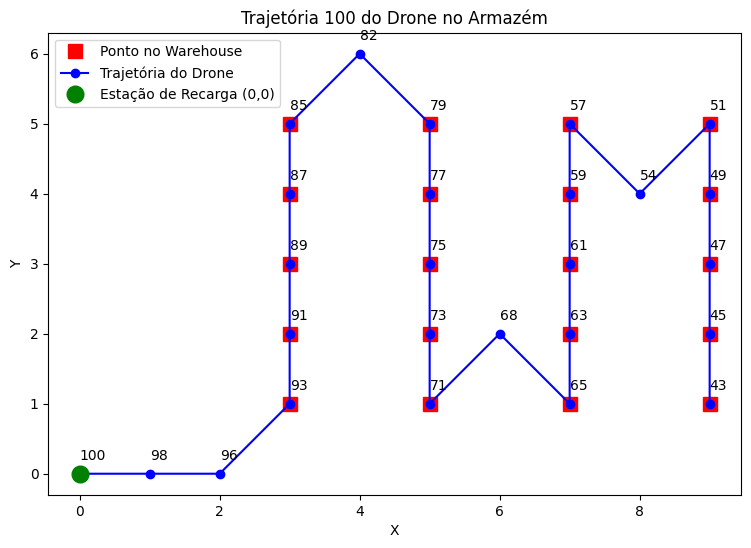


Trajetória 101:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 0), Bateria 96
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 4), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 2), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 4), Bateria 54
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


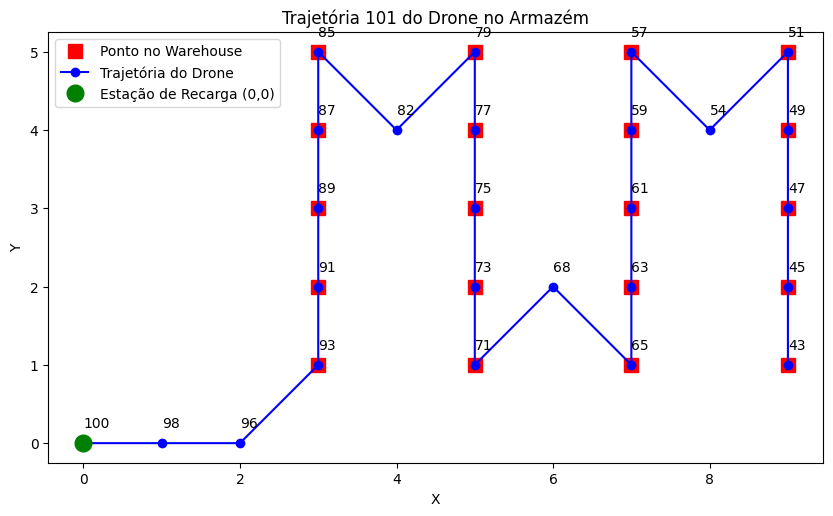


Trajetória 102:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 0), Bateria 96
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 6), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 0), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 4), Bateria 54
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


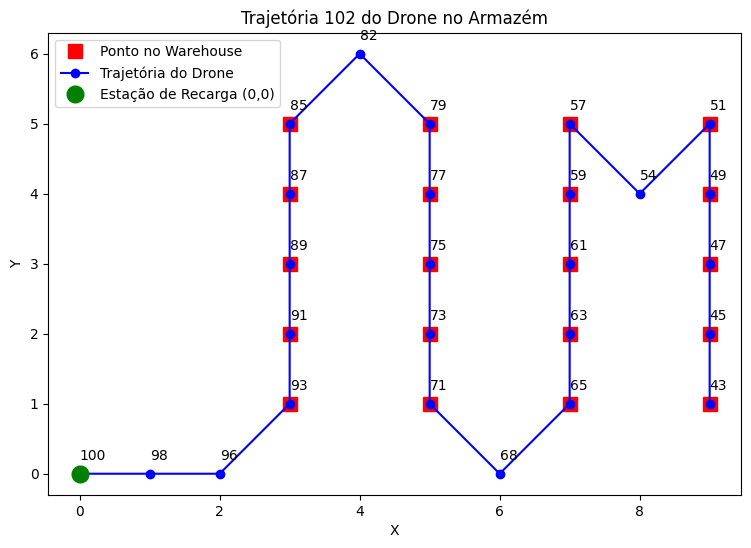


Trajetória 103:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 0), Bateria 96
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 4), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 0), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 4), Bateria 54
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


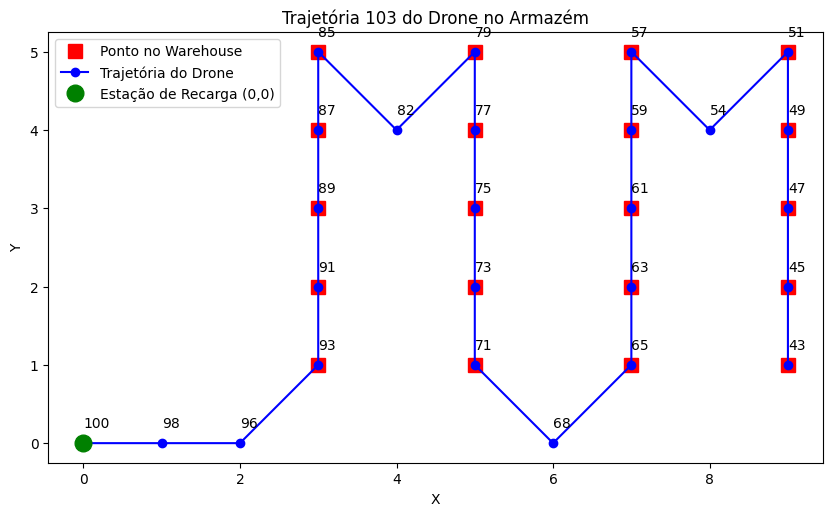


Trajetória 104:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 6), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 0), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 4), Bateria 54
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


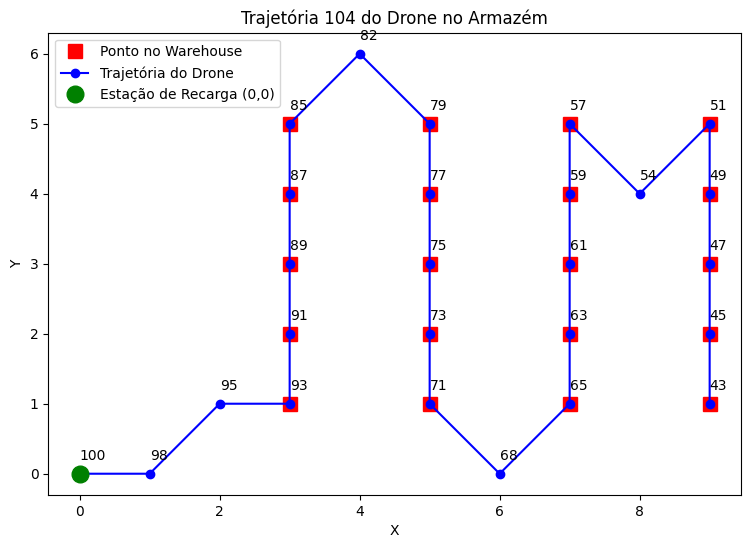


Trajetória 105:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 4), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 0), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 4), Bateria 54
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


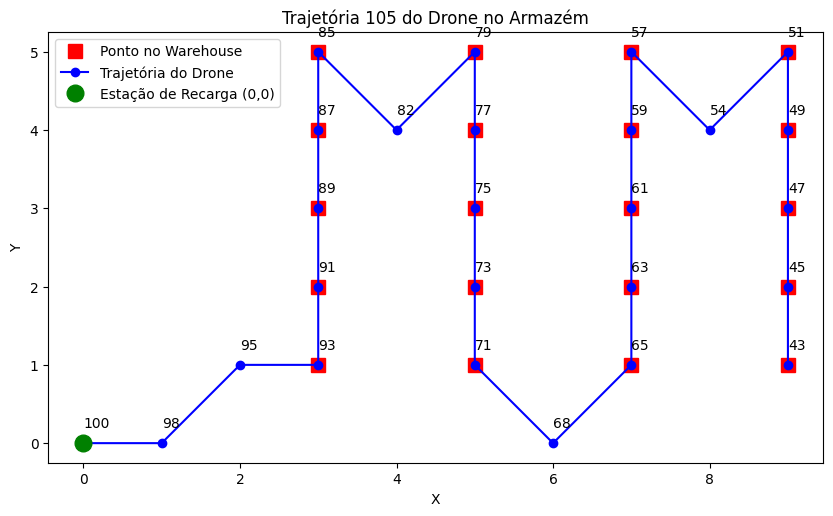


Trajetória 106:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 6), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 2), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 4), Bateria 54
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


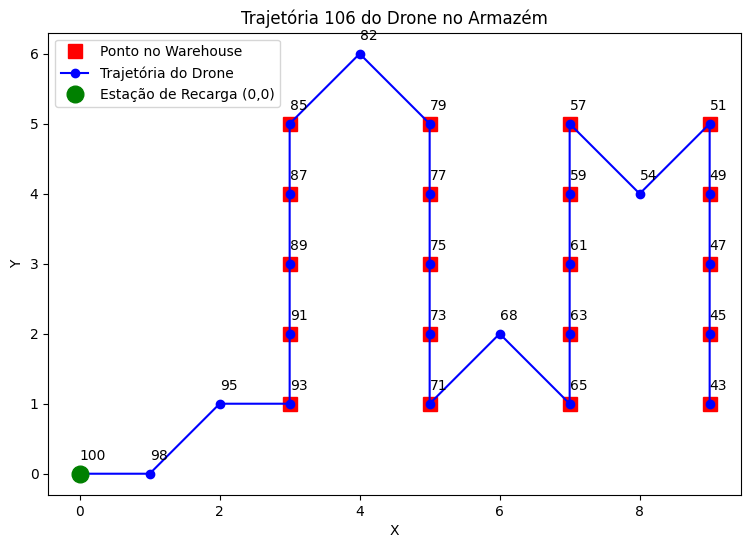


Trajetória 107:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 4), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 2), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 4), Bateria 54
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


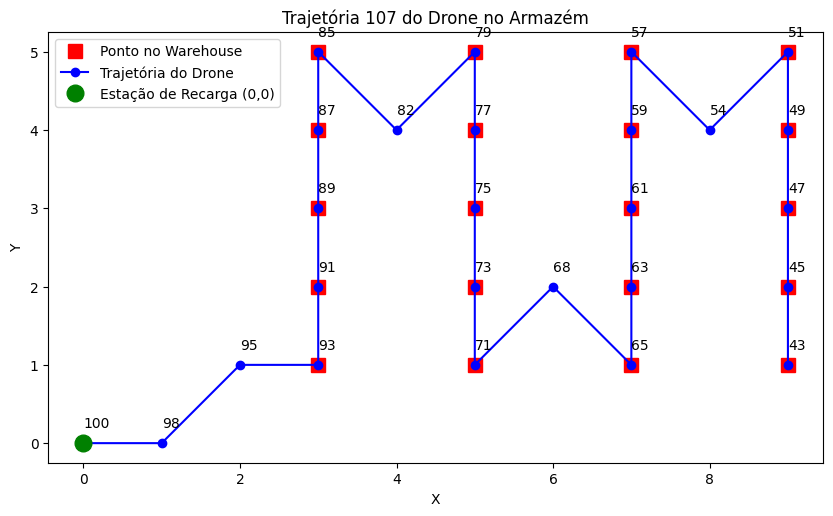


Trajetória 108:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 0), Bateria 96
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 5), Bateria 83
Passo 9: Posição (5, 5), Bateria 81
Passo 10: Posição (5, 4), Bateria 79
Passo 11: Posição (5, 3), Bateria 77
Passo 12: Posição (5, 2), Bateria 75
Passo 13: Posição (5, 1), Bateria 73
Passo 14: Posição (6, 2), Bateria 70
Passo 15: Posição (7, 1), Bateria 67
Passo 16: Posição (7, 2), Bateria 65
Passo 17: Posição (7, 3), Bateria 63
Passo 18: Posição (7, 4), Bateria 61
Passo 19: Posição (7, 5), Bateria 59
Passo 20: Posição (8, 4), Bateria 56
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


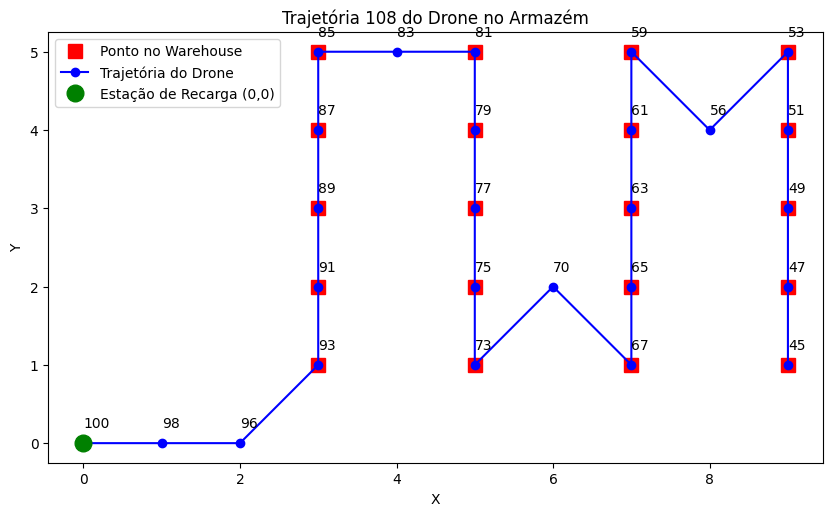


Trajetória 109:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 0), Bateria 96
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 5), Bateria 83
Passo 9: Posição (5, 5), Bateria 81
Passo 10: Posição (5, 4), Bateria 79
Passo 11: Posição (5, 3), Bateria 77
Passo 12: Posição (5, 2), Bateria 75
Passo 13: Posição (5, 1), Bateria 73
Passo 14: Posição (6, 0), Bateria 70
Passo 15: Posição (7, 1), Bateria 67
Passo 16: Posição (7, 2), Bateria 65
Passo 17: Posição (7, 3), Bateria 63
Passo 18: Posição (7, 4), Bateria 61
Passo 19: Posição (7, 5), Bateria 59
Passo 20: Posição (8, 4), Bateria 56
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


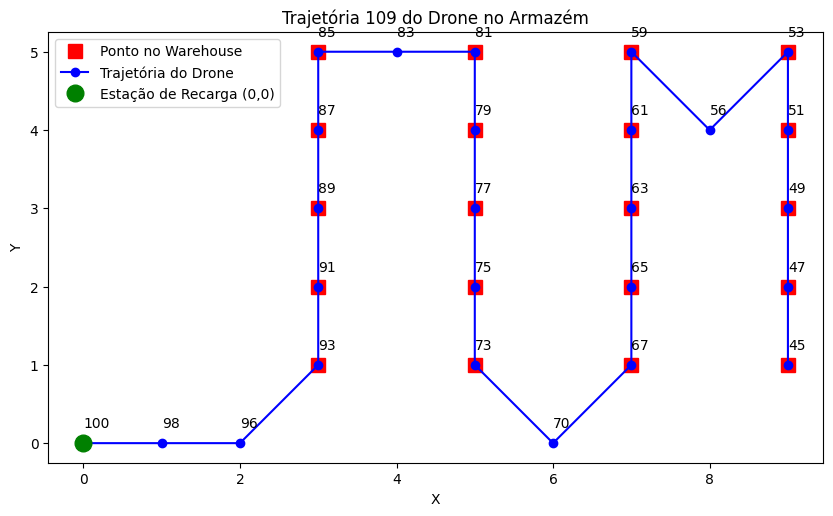


Trajetória 110:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 5), Bateria 83
Passo 9: Posição (5, 5), Bateria 81
Passo 10: Posição (5, 4), Bateria 79
Passo 11: Posição (5, 3), Bateria 77
Passo 12: Posição (5, 2), Bateria 75
Passo 13: Posição (5, 1), Bateria 73
Passo 14: Posição (6, 2), Bateria 70
Passo 15: Posição (7, 1), Bateria 67
Passo 16: Posição (7, 2), Bateria 65
Passo 17: Posição (7, 3), Bateria 63
Passo 18: Posição (7, 4), Bateria 61
Passo 19: Posição (7, 5), Bateria 59
Passo 20: Posição (8, 4), Bateria 56
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


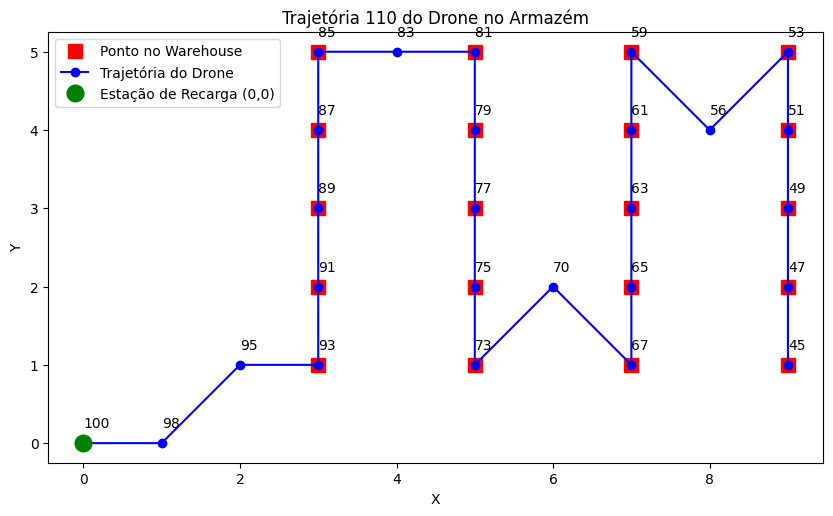


Trajetória 111:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 5), Bateria 83
Passo 9: Posição (5, 5), Bateria 81
Passo 10: Posição (5, 4), Bateria 79
Passo 11: Posição (5, 3), Bateria 77
Passo 12: Posição (5, 2), Bateria 75
Passo 13: Posição (5, 1), Bateria 73
Passo 14: Posição (6, 0), Bateria 70
Passo 15: Posição (7, 1), Bateria 67
Passo 16: Posição (7, 2), Bateria 65
Passo 17: Posição (7, 3), Bateria 63
Passo 18: Posição (7, 4), Bateria 61
Passo 19: Posição (7, 5), Bateria 59
Passo 20: Posição (8, 4), Bateria 56
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


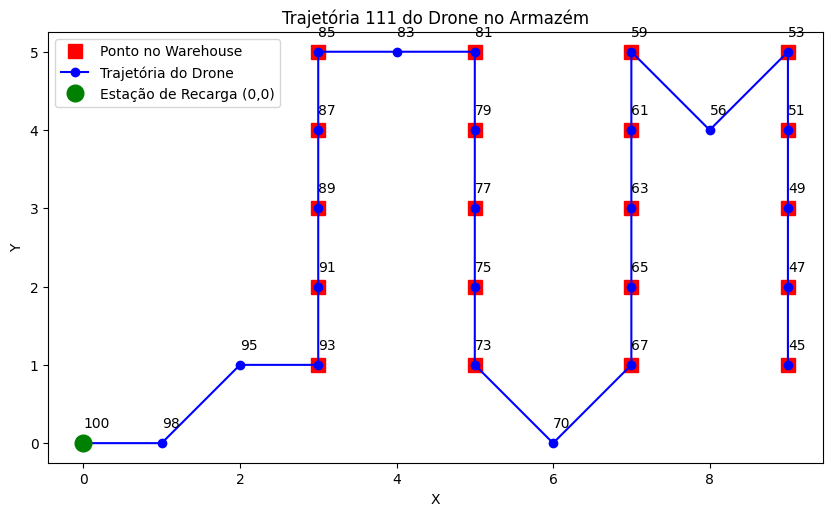


Trajetória 112:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 6), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 1), Bateria 69
Passo 15: Posição (7, 1), Bateria 67
Passo 16: Posição (7, 2), Bateria 65
Passo 17: Posição (7, 3), Bateria 63
Passo 18: Posição (7, 4), Bateria 61
Passo 19: Posição (7, 5), Bateria 59
Passo 20: Posição (8, 4), Bateria 56
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


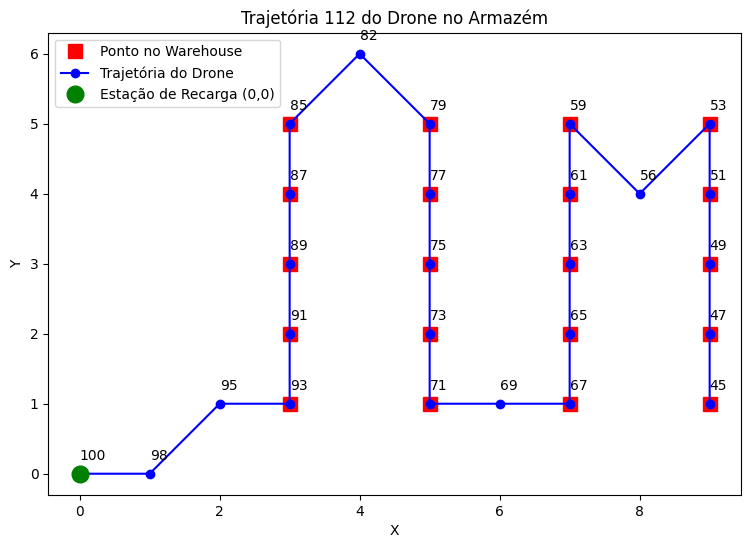


Trajetória 113:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 4), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 1), Bateria 69
Passo 15: Posição (7, 1), Bateria 67
Passo 16: Posição (7, 2), Bateria 65
Passo 17: Posição (7, 3), Bateria 63
Passo 18: Posição (7, 4), Bateria 61
Passo 19: Posição (7, 5), Bateria 59
Passo 20: Posição (8, 4), Bateria 56
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


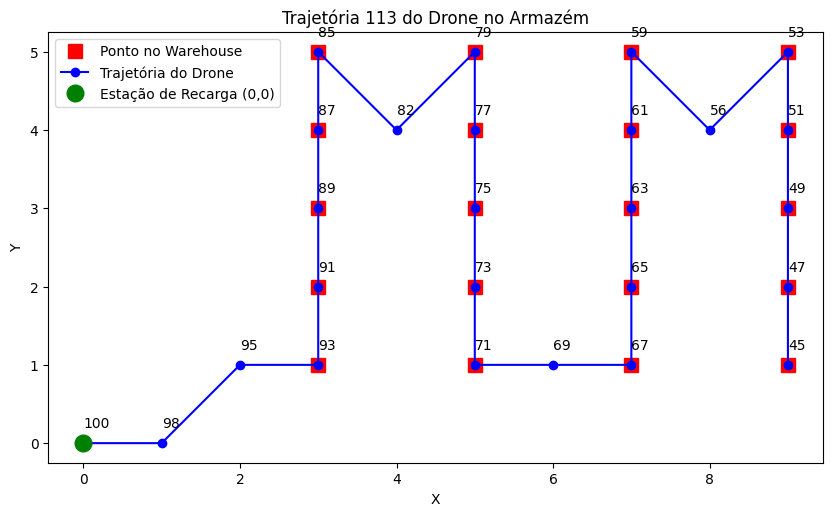


Trajetória 114:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 5), Bateria 83
Passo 9: Posição (5, 5), Bateria 81
Passo 10: Posição (5, 4), Bateria 79
Passo 11: Posição (5, 3), Bateria 77
Passo 12: Posição (5, 2), Bateria 75
Passo 13: Posição (5, 1), Bateria 73
Passo 14: Posição (6, 1), Bateria 71
Passo 15: Posição (7, 1), Bateria 69
Passo 16: Posição (7, 2), Bateria 67
Passo 17: Posição (7, 3), Bateria 65
Passo 18: Posição (7, 4), Bateria 63
Passo 19: Posição (7, 5), Bateria 61
Passo 20: Posição (8, 4), Bateria 58
Passo 21: Posição (9, 5), Bateria 55
Passo 22: Posição (9, 4), Bateria 53
Passo 23: Posição (9, 3), Bateria 51
Passo 24: Posição (9, 2), Bateria 49
Passo 25: Posição (9, 1), Bateria 47


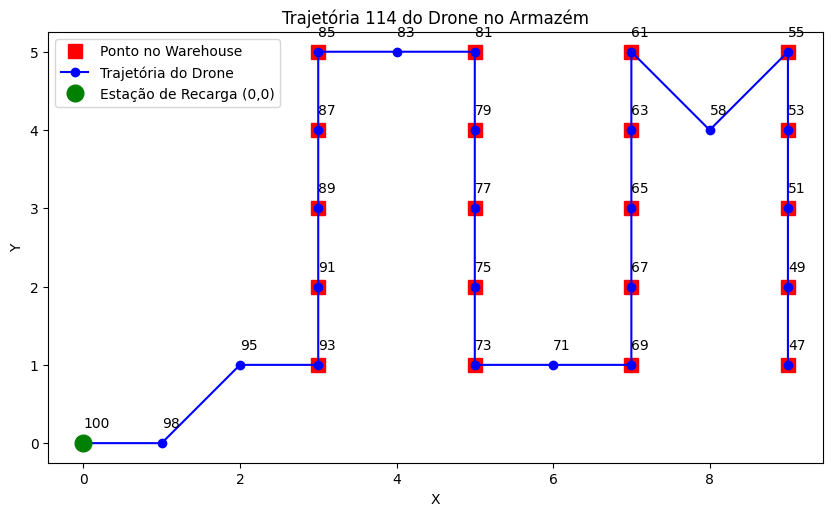


Trajetória 115:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 0), Bateria 96
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 6), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 1), Bateria 69
Passo 15: Posição (7, 1), Bateria 67
Passo 16: Posição (7, 2), Bateria 65
Passo 17: Posição (7, 3), Bateria 63
Passo 18: Posição (7, 4), Bateria 61
Passo 19: Posição (7, 5), Bateria 59
Passo 20: Posição (8, 4), Bateria 56
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


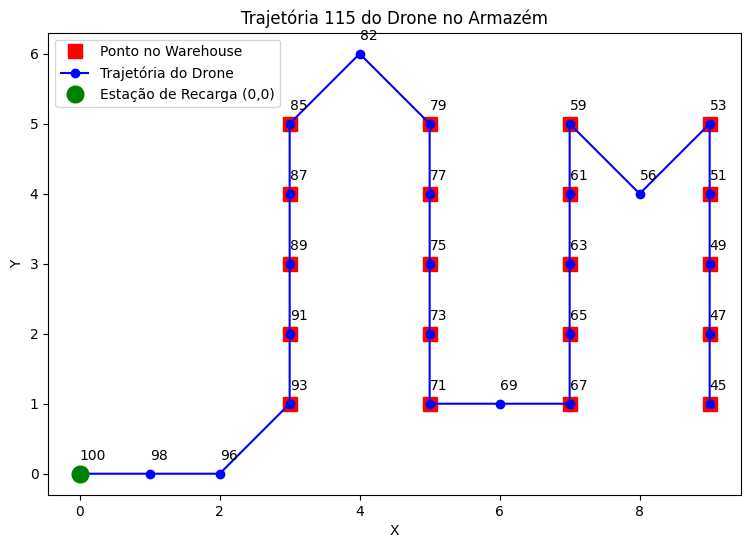


Trajetória 116:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 0), Bateria 96
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 4), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 1), Bateria 69
Passo 15: Posição (7, 1), Bateria 67
Passo 16: Posição (7, 2), Bateria 65
Passo 17: Posição (7, 3), Bateria 63
Passo 18: Posição (7, 4), Bateria 61
Passo 19: Posição (7, 5), Bateria 59
Passo 20: Posição (8, 4), Bateria 56
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


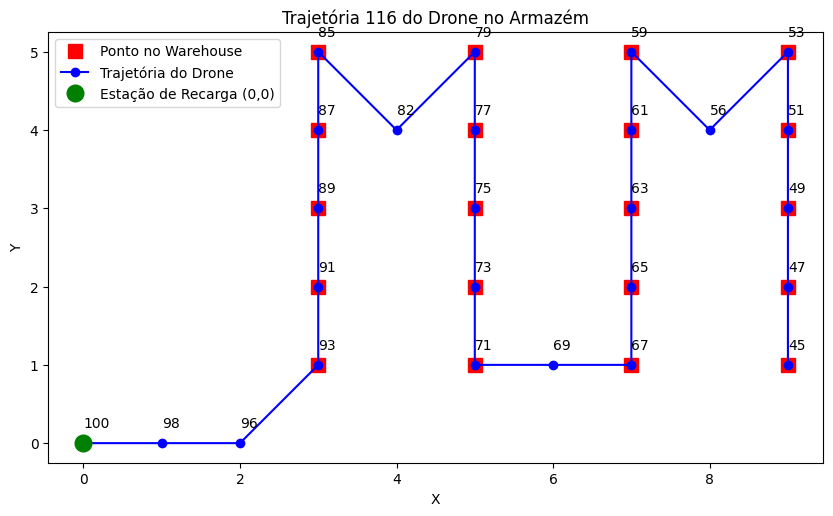


Trajetória 117:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 0), Bateria 96
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 5), Bateria 83
Passo 9: Posição (5, 5), Bateria 81
Passo 10: Posição (5, 4), Bateria 79
Passo 11: Posição (5, 3), Bateria 77
Passo 12: Posição (5, 2), Bateria 75
Passo 13: Posição (5, 1), Bateria 73
Passo 14: Posição (6, 1), Bateria 71
Passo 15: Posição (7, 1), Bateria 69
Passo 16: Posição (7, 2), Bateria 67
Passo 17: Posição (7, 3), Bateria 65
Passo 18: Posição (7, 4), Bateria 63
Passo 19: Posição (7, 5), Bateria 61
Passo 20: Posição (8, 4), Bateria 58
Passo 21: Posição (9, 5), Bateria 55
Passo 22: Posição (9, 4), Bateria 53
Passo 23: Posição (9, 3), Bateria 51
Passo 24: Posição (9, 2), Bateria 49
Passo 25: Posição (9, 1), Bateria 47


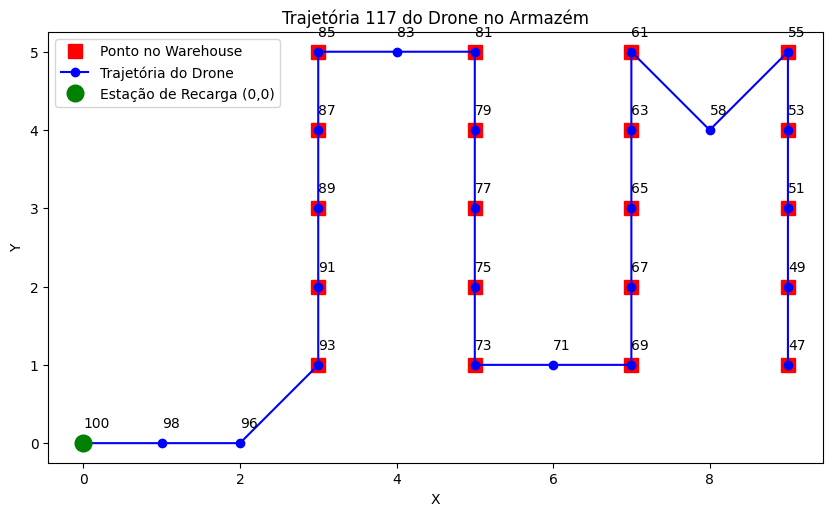


Trajetória 118:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 0), Bateria 96
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 6), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 2), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 6), Bateria 54
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


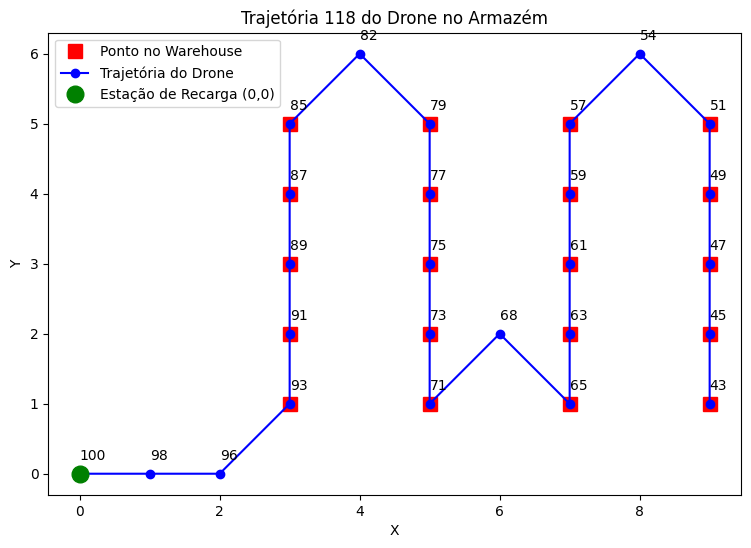


Trajetória 119:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 0), Bateria 96
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 4), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 2), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 6), Bateria 54
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


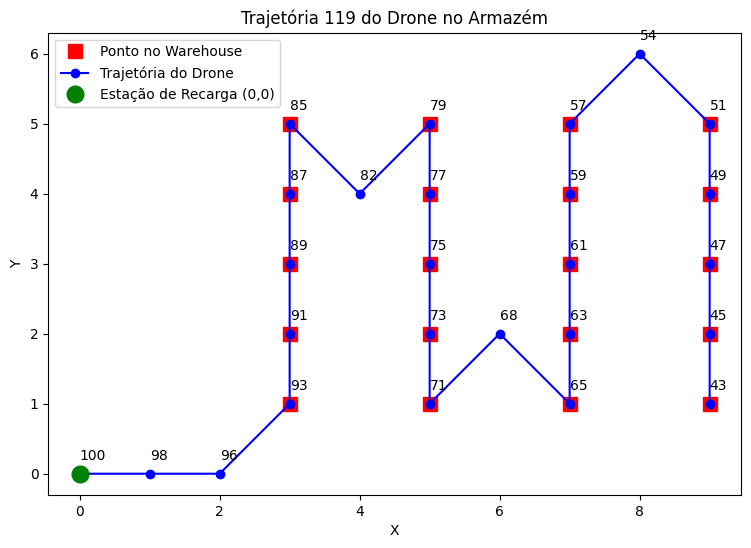


Trajetória 120:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 0), Bateria 96
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 6), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 0), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 6), Bateria 54
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


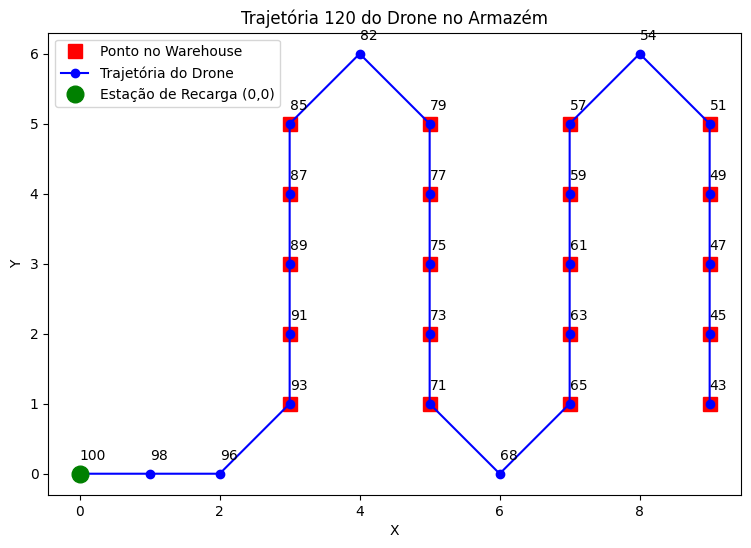


Trajetória 121:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 0), Bateria 96
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 4), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 0), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 6), Bateria 54
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


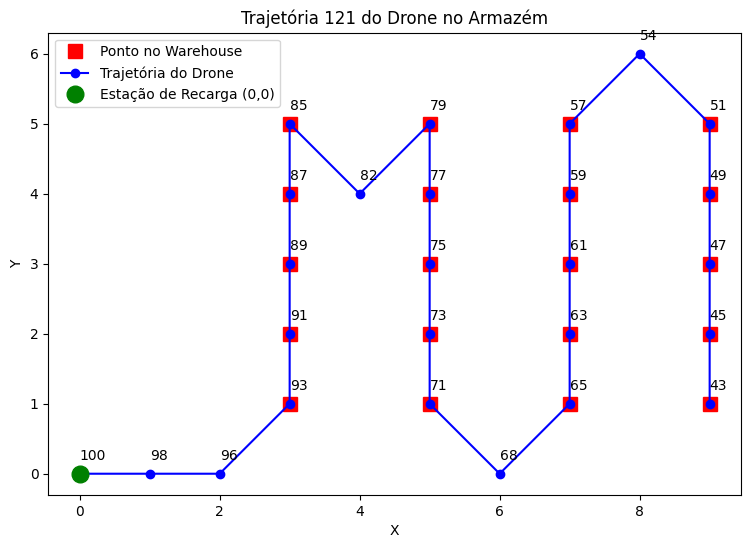


Trajetória 122:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 6), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 0), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 6), Bateria 54
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


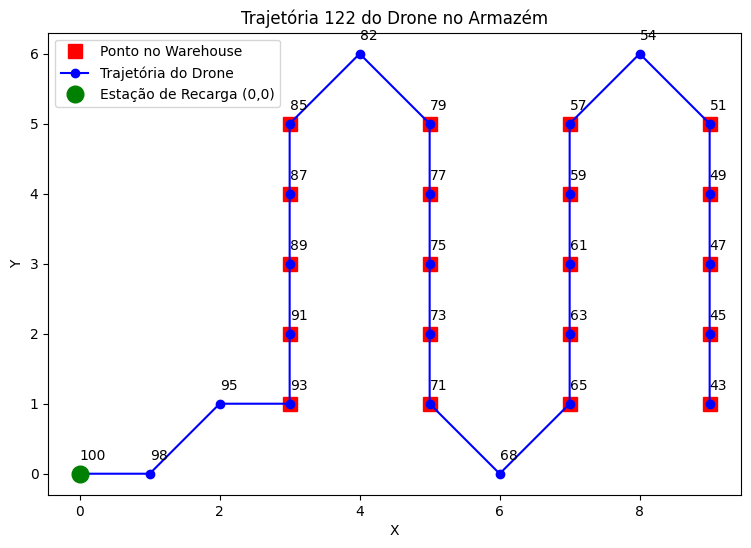


Trajetória 123:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 6), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 2), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 6), Bateria 54
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


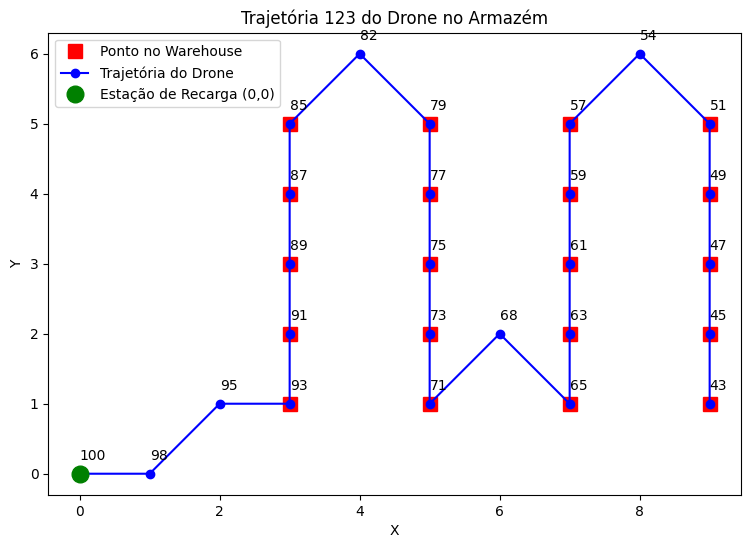


Trajetória 124:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 4), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 0), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 6), Bateria 54
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


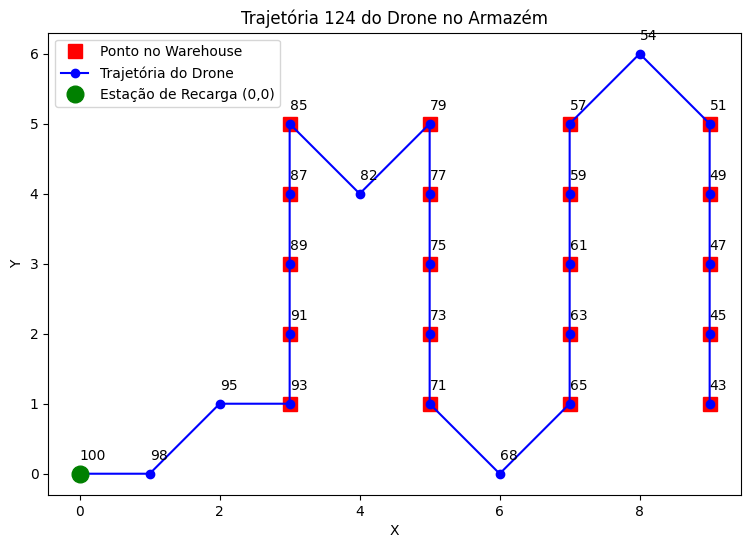


Trajetória 125:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 4), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 2), Bateria 68
Passo 15: Posição (7, 1), Bateria 65
Passo 16: Posição (7, 2), Bateria 63
Passo 17: Posição (7, 3), Bateria 61
Passo 18: Posição (7, 4), Bateria 59
Passo 19: Posição (7, 5), Bateria 57
Passo 20: Posição (8, 6), Bateria 54
Passo 21: Posição (9, 5), Bateria 51
Passo 22: Posição (9, 4), Bateria 49
Passo 23: Posição (9, 3), Bateria 47
Passo 24: Posição (9, 2), Bateria 45
Passo 25: Posição (9, 1), Bateria 43


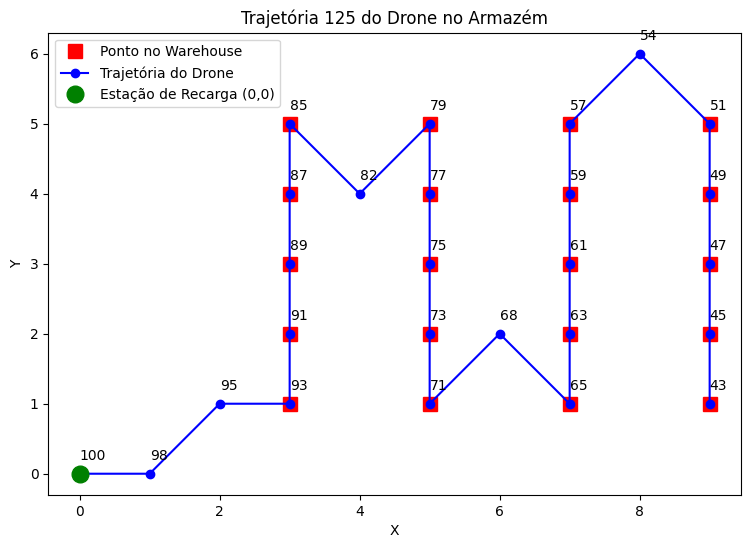


Trajetória 126:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 0), Bateria 96
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 5), Bateria 83
Passo 9: Posição (5, 5), Bateria 81
Passo 10: Posição (5, 4), Bateria 79
Passo 11: Posição (5, 3), Bateria 77
Passo 12: Posição (5, 2), Bateria 75
Passo 13: Posição (5, 1), Bateria 73
Passo 14: Posição (6, 0), Bateria 70
Passo 15: Posição (7, 1), Bateria 67
Passo 16: Posição (7, 2), Bateria 65
Passo 17: Posição (7, 3), Bateria 63
Passo 18: Posição (7, 4), Bateria 61
Passo 19: Posição (7, 5), Bateria 59
Passo 20: Posição (8, 6), Bateria 56
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


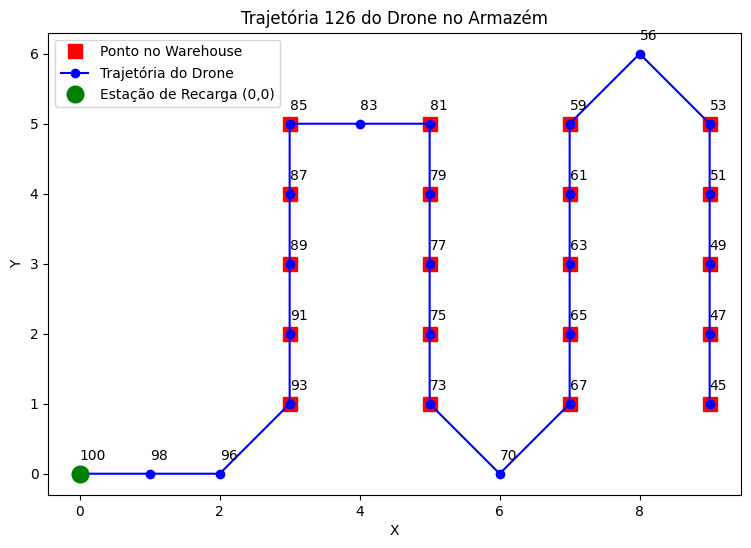


Trajetória 127:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 0), Bateria 96
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 5), Bateria 83
Passo 9: Posição (5, 5), Bateria 81
Passo 10: Posição (5, 4), Bateria 79
Passo 11: Posição (5, 3), Bateria 77
Passo 12: Posição (5, 2), Bateria 75
Passo 13: Posição (5, 1), Bateria 73
Passo 14: Posição (6, 2), Bateria 70
Passo 15: Posição (7, 1), Bateria 67
Passo 16: Posição (7, 2), Bateria 65
Passo 17: Posição (7, 3), Bateria 63
Passo 18: Posição (7, 4), Bateria 61
Passo 19: Posição (7, 5), Bateria 59
Passo 20: Posição (8, 6), Bateria 56
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


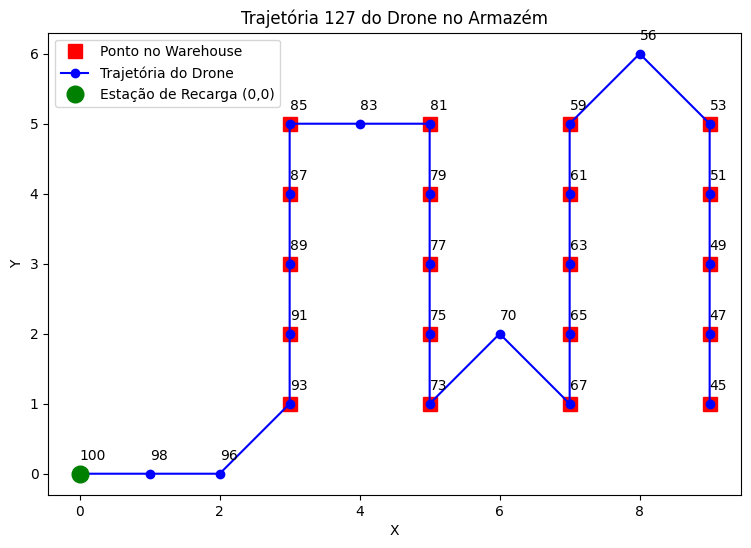


Trajetória 128:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 5), Bateria 83
Passo 9: Posição (5, 5), Bateria 81
Passo 10: Posição (5, 4), Bateria 79
Passo 11: Posição (5, 3), Bateria 77
Passo 12: Posição (5, 2), Bateria 75
Passo 13: Posição (5, 1), Bateria 73
Passo 14: Posição (6, 0), Bateria 70
Passo 15: Posição (7, 1), Bateria 67
Passo 16: Posição (7, 2), Bateria 65
Passo 17: Posição (7, 3), Bateria 63
Passo 18: Posição (7, 4), Bateria 61
Passo 19: Posição (7, 5), Bateria 59
Passo 20: Posição (8, 6), Bateria 56
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


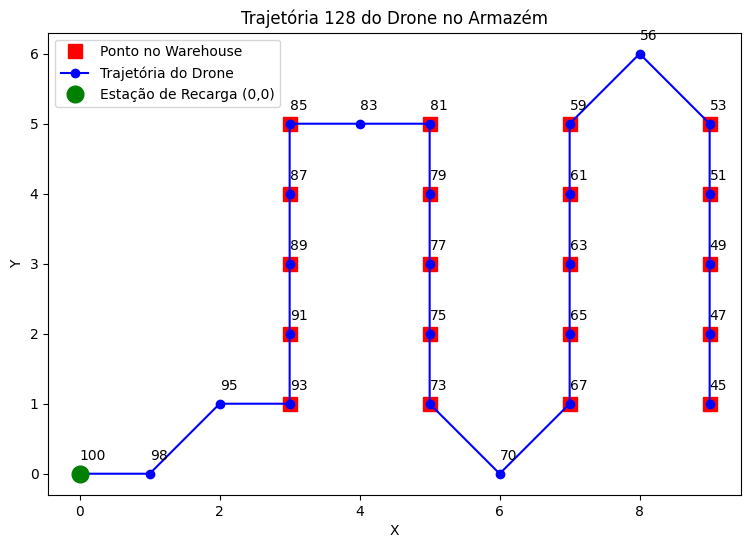


Trajetória 129:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 5), Bateria 83
Passo 9: Posição (5, 5), Bateria 81
Passo 10: Posição (5, 4), Bateria 79
Passo 11: Posição (5, 3), Bateria 77
Passo 12: Posição (5, 2), Bateria 75
Passo 13: Posição (5, 1), Bateria 73
Passo 14: Posição (6, 2), Bateria 70
Passo 15: Posição (7, 1), Bateria 67
Passo 16: Posição (7, 2), Bateria 65
Passo 17: Posição (7, 3), Bateria 63
Passo 18: Posição (7, 4), Bateria 61
Passo 19: Posição (7, 5), Bateria 59
Passo 20: Posição (8, 6), Bateria 56
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


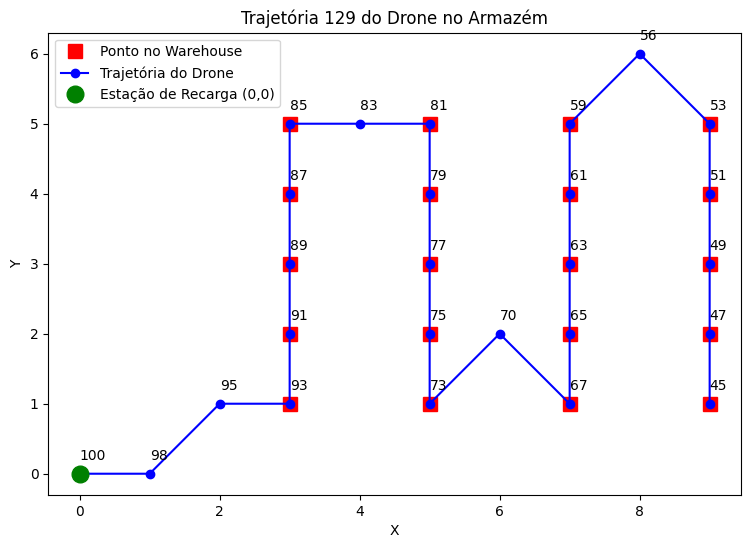


Trajetória 130:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 5), Bateria 83
Passo 9: Posição (5, 5), Bateria 81
Passo 10: Posição (5, 4), Bateria 79
Passo 11: Posição (5, 3), Bateria 77
Passo 12: Posição (5, 2), Bateria 75
Passo 13: Posição (5, 1), Bateria 73
Passo 14: Posição (6, 1), Bateria 71
Passo 15: Posição (7, 1), Bateria 69
Passo 16: Posição (7, 2), Bateria 67
Passo 17: Posição (7, 3), Bateria 65
Passo 18: Posição (7, 4), Bateria 63
Passo 19: Posição (7, 5), Bateria 61
Passo 20: Posição (8, 6), Bateria 58
Passo 21: Posição (9, 5), Bateria 55
Passo 22: Posição (9, 4), Bateria 53
Passo 23: Posição (9, 3), Bateria 51
Passo 24: Posição (9, 2), Bateria 49
Passo 25: Posição (9, 1), Bateria 47


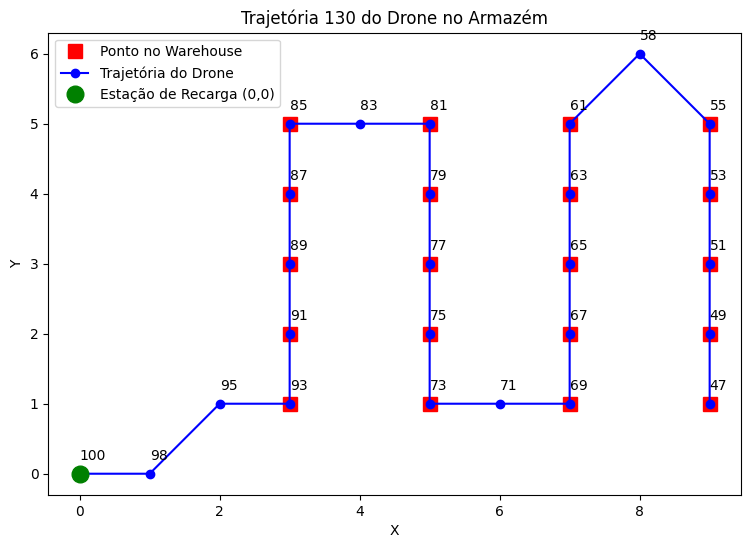


Trajetória 131:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 4), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 1), Bateria 69
Passo 15: Posição (7, 1), Bateria 67
Passo 16: Posição (7, 2), Bateria 65
Passo 17: Posição (7, 3), Bateria 63
Passo 18: Posição (7, 4), Bateria 61
Passo 19: Posição (7, 5), Bateria 59
Passo 20: Posição (8, 6), Bateria 56
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


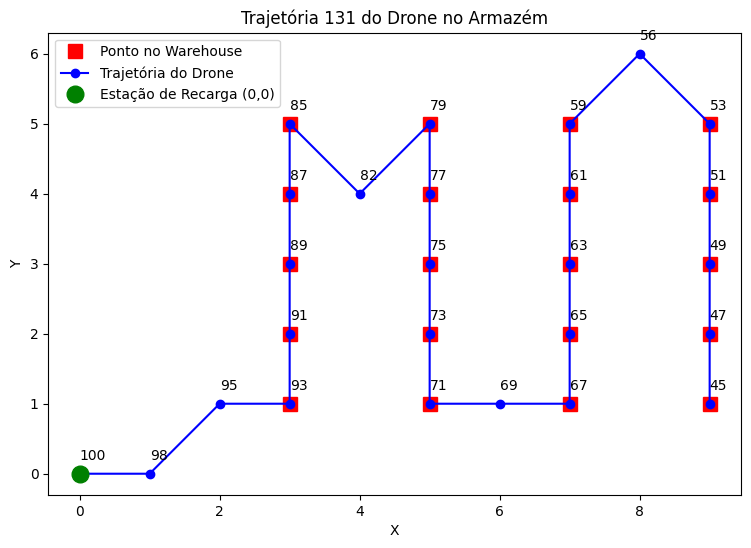


Trajetória 132:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 1), Bateria 95
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 6), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 1), Bateria 69
Passo 15: Posição (7, 1), Bateria 67
Passo 16: Posição (7, 2), Bateria 65
Passo 17: Posição (7, 3), Bateria 63
Passo 18: Posição (7, 4), Bateria 61
Passo 19: Posição (7, 5), Bateria 59
Passo 20: Posição (8, 6), Bateria 56
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


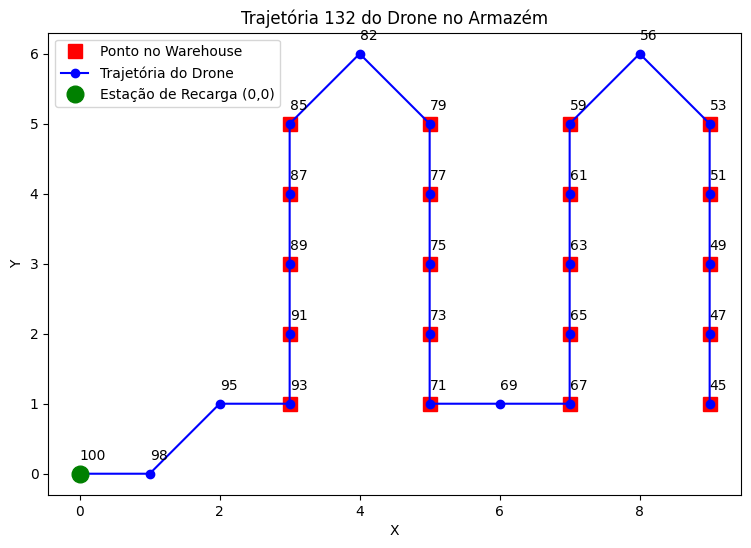


Trajetória 133:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 0), Bateria 96
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 4), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 1), Bateria 69
Passo 15: Posição (7, 1), Bateria 67
Passo 16: Posição (7, 2), Bateria 65
Passo 17: Posição (7, 3), Bateria 63
Passo 18: Posição (7, 4), Bateria 61
Passo 19: Posição (7, 5), Bateria 59
Passo 20: Posição (8, 6), Bateria 56
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


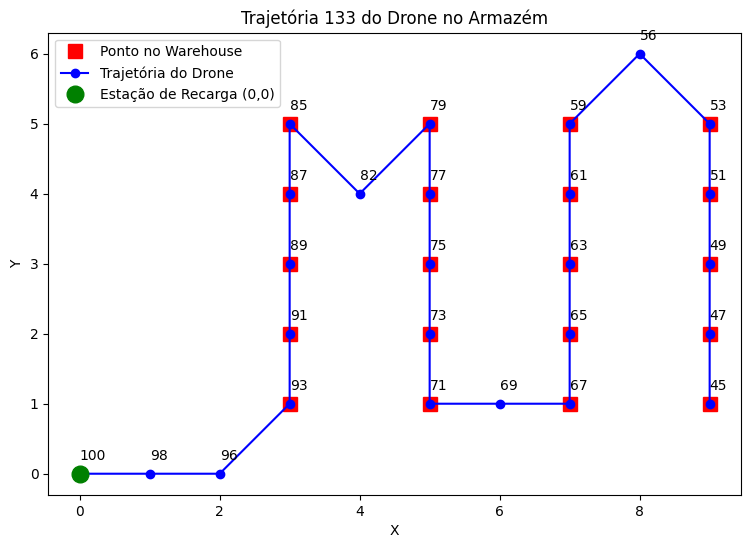


Trajetória 134:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 0), Bateria 96
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 6), Bateria 82
Passo 9: Posição (5, 5), Bateria 79
Passo 10: Posição (5, 4), Bateria 77
Passo 11: Posição (5, 3), Bateria 75
Passo 12: Posição (5, 2), Bateria 73
Passo 13: Posição (5, 1), Bateria 71
Passo 14: Posição (6, 1), Bateria 69
Passo 15: Posição (7, 1), Bateria 67
Passo 16: Posição (7, 2), Bateria 65
Passo 17: Posição (7, 3), Bateria 63
Passo 18: Posição (7, 4), Bateria 61
Passo 19: Posição (7, 5), Bateria 59
Passo 20: Posição (8, 6), Bateria 56
Passo 21: Posição (9, 5), Bateria 53
Passo 22: Posição (9, 4), Bateria 51
Passo 23: Posição (9, 3), Bateria 49
Passo 24: Posição (9, 2), Bateria 47
Passo 25: Posição (9, 1), Bateria 45


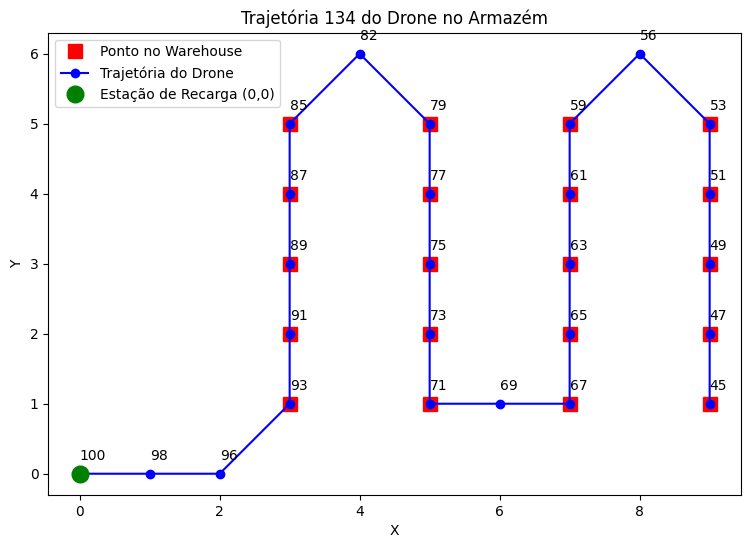


Trajetória 135:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 98
Passo 2: Posição (2, 0), Bateria 96
Passo 3: Posição (3, 1), Bateria 93
Passo 4: Posição (3, 2), Bateria 91
Passo 5: Posição (3, 3), Bateria 89
Passo 6: Posição (3, 4), Bateria 87
Passo 7: Posição (3, 5), Bateria 85
Passo 8: Posição (4, 5), Bateria 83
Passo 9: Posição (5, 5), Bateria 81
Passo 10: Posição (5, 4), Bateria 79
Passo 11: Posição (5, 3), Bateria 77
Passo 12: Posição (5, 2), Bateria 75
Passo 13: Posição (5, 1), Bateria 73
Passo 14: Posição (6, 1), Bateria 71
Passo 15: Posição (7, 1), Bateria 69
Passo 16: Posição (7, 2), Bateria 67
Passo 17: Posição (7, 3), Bateria 65
Passo 18: Posição (7, 4), Bateria 63
Passo 19: Posição (7, 5), Bateria 61
Passo 20: Posição (8, 6), Bateria 58
Passo 21: Posição (9, 5), Bateria 55
Passo 22: Posição (9, 4), Bateria 53
Passo 23: Posição (9, 3), Bateria 51
Passo 24: Posição (9, 2), Bateria 49
Passo 25: Posição (9, 1), Bateria 47


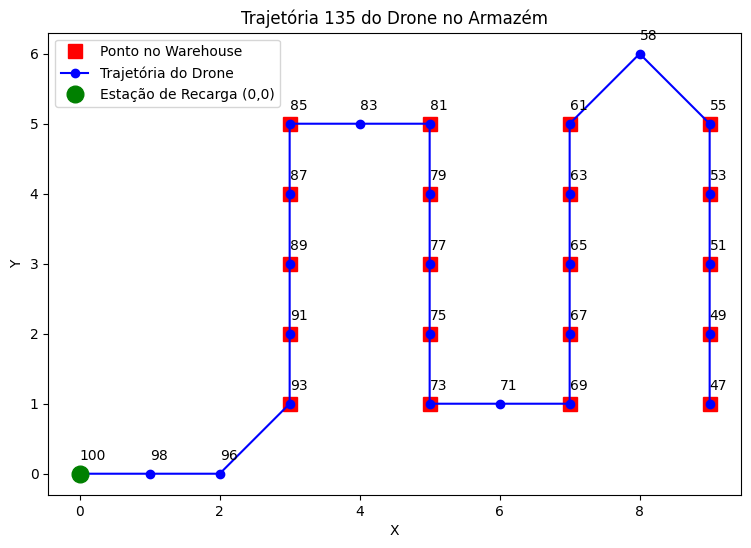

In [6]:
from z3 import *
import matplotlib.pyplot as plt

def solve_with_min_timesteps(max_timesteps, bmax, gridx, gridy, warehouse):
    for timesteps in range(1, max_timesteps + 1):
        s = Solver()

        # Declaração das variáveis para cada timestep
        PGx = [Int(f'pgx_{k}') for k in range(timesteps)]
        PGy = [Int(f'pgy_{k}') for k in range(timesteps)]
        Bat = [Int(f'bat_{k}') for k in range(timesteps)]

        # Restrições de limites para as variáveis
        for b in Bat:
            s.add(And(b >= 1, b <= bmax))
        for x in PGx:
            s.add(And(x >= 0, x <= gridx))
        for y in PGy:
            s.add(And(y >= 0, y <= gridy))

        # Condições iniciais
        s.add(PGx[0] == 0)
        s.add(PGy[0] == 0)
        s.add(Bat[0] == bmax)

        # Restrições de movimento e consumo de bateria
        for k in range(1, timesteps):
            s.add(Or(PGx[k] == PGx[k-1] + 1, PGx[k] == PGx[k-1] - 1, PGx[k] == PGx[k-1]))
            s.add(Or(PGy[k] == PGy[k-1] + 1, PGy[k] == PGy[k-1] - 1, PGy[k] == PGy[k-1]))

            s.add(If(
                Or(
                    And(PGx[k] == PGx[k-1] + 1, PGy[k] == PGy[k-1] + 1),
                    And(PGx[k] == PGx[k-1] - 1, PGy[k] == PGy[k-1] - 1),
                    And(PGx[k] == PGx[k-1] + 1, PGy[k] == PGy[k-1] - 1),
                    And(PGx[k] == PGx[k-1] - 1, PGy[k] == PGy[k-1] + 1)
                ),
                Bat[k] == Bat[k-1] - 3,
                If(
                    Or(
                        And(PGx[k] == PGx[k-1] + 1, PGy[k] == PGy[k-1]),
                        And(PGx[k] == PGx[k-1] - 1, PGy[k] == PGy[k-1]),
                        And(PGx[k] == PGx[k-1], PGy[k] == PGy[k-1] - 1),
                        And(PGx[k] == PGx[k-1], PGy[k] == PGy[k-1] + 1)
                    ),
                    Bat[k] == Bat[k-1] - 2,
                    If(
                        And(PGx[k] == PGx[k-1], PGy[k] == PGy[k-1]),
                        Bat[k] == Bat[k-1],
                        If(
                            And(PGx[k] == 0, PGy[k] == 0),
                            Bat[k] == bmax,
                            Bat[k] == Bat[k-1]
                        )
                    )
                )
            ))

        # Cada ponto no warehouse deve ser visitado em algum timestep
        for (x, y) in warehouse:
            s.add(Or([And(PGx[k] == x, PGy[k] == y) for k in range(timesteps)]))

        if s.check() == sat:
            print("Solução encontrada com", timesteps, "timesteps mínimos.")
            # Enumerando todas as trajetórias possíveis para o número mínimo de timesteps
            modelos = []
            while s.check() == sat:
                m = s.model()
                modelos.append(m)
                # Bloqueia o modelo atual para que não seja encontrada novamente
                bloqueio = []
                for var in PGx + PGy + Bat:
                    bloqueio.append(var == m[var])
                s.add(Not(And(bloqueio)))
            return modelos, timesteps, PGx, PGy, Bat

    print("Nenhuma solução encontrada até", max_timesteps, "timesteps.")
    return None, None, None, None, None

# Parâmetros do problema
max_timesteps = 100  # Limite superior para a busca de timesteps
bmax = 100
gridx = 9
gridy = 10

# Resolver o problema e obter os modelos e o número de timesteps mínimo
modelos, timesteps, PGx, PGy, Bat = solve_with_min_timesteps(max_timesteps, bmax, gridx, gridy, warehouse)

if modelos:
    print("\nNúmero de trajetórias encontradas:", len(modelos))
    for idx, model in enumerate(modelos):
        pgx_values = [model.evaluate(PGx[k]).as_long() for k in range(timesteps)]
        pgy_values = [model.evaluate(PGy[k]).as_long() for k in range(timesteps)]
        bat_values = [model.evaluate(Bat[k]).as_long() for k in range(timesteps)]
        
        print(f"\nTrajetória {idx + 1}:")
        for t in range(timesteps):
            print(f"Passo {t}: Posição ({pgx_values[t]}, {pgy_values[t]}), Bateria {bat_values[t]}")

        # Visualização da trajetória
        fig, ax = plt.subplots(figsize=(10, 6))
        # Plotando os pontos do warehouse
        for i, (x, y) in enumerate(warehouse):
            if i == 0:
                ax.plot(x, y, 'rs', markersize=10, label="Ponto no Warehouse")
            else:
                ax.plot(x, y, 'rs', markersize=10)
        # Plotando a trajetória do drone
        ax.plot(pgx_values, pgy_values, 'b-o', label="Trajetória do Drone")
        ax.plot(0, 0, 'go', markersize=12, label="Estação de Recarga (0,0)")
        # Adicionando a quantidade de bateria ao lado de cada ponto da trajetória
        for t in range(timesteps):
            ax.text(pgx_values[t], pgy_values[t] + 0.2, f'{bat_values[t]}', fontsize=10)
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.title(f"Trajetória {idx + 1} do Drone no Armazém")
        plt.legend()
        ax.set_aspect('equal')
        plt.show()
else:
    print("Nenhuma solução encontrada.")